<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">Walmart's Weekly Sales Analysis and Prediction</h1>
</div>


<img src="https://www.pngplay.com/wp-content/uploads/9/Walmart-Logo-Transparent-Background.png" alt="image name" style="max-width: 50%;">

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#time">4. Time Series Model for each store</a></li>
<li><a href="#model">5. Model Selection and Evaluation</a></li>
<li><a href="#conclusions">6. Conclusions</a></li>
<li><a href="#references">7. References</a></li>
</ul>

<div id='intro'></div>

## 1. Introduction
Sales analysis and forecasting are essential tools for businesses to understand and improve their sales performance and make informed decisions about their future sales goals (B2B International, 2018). By analyzing past sales data, businesses can identify trends and patterns that can help them understand what is driving their sales and where they may need to focus their efforts to improve (Small Business Administration, 2021). Forecasting allows businesses to project future sales based on these trends and patterns, helping them to set realistic goals and allocate resources appropriately (Business News Daily, 2021).

The importance of sales analysis and forecasting extends beyond just understanding sales performance. It is also crucial for budgeting and financial planning. By understanding their expected sales, businesses can better plan for expenses and allocate resources to meet their financial goals (Small Business Administration, 2021). Additionally, sales analysis and forecasting can help businesses identify opportunities for growth and new areas for expansion (B2B International, 2018).

In this project, we will analyze Walmart's weekly sales data across 45 different stores to gain insights into their sales performance and identify trends and patterns. We will then use this data to forecast future sales, which can assist Walmart in making informed strategic decisions. This analysis will provide Walmart with valuable information on how to optimize their sales and allocate resources effectively. Additionally, by understanding how sales vary across different stores, Walmart can identify areas for improvement and potential opportunities for growth. Overall, this project will enable Walmart to gain a deeper understanding of their sales performance and make data-driven decisions to drive future success.


### 1.1 Dataset description
The file `Walmart.csv` was obtained from [Kaggle](https://www.kaggle.com/datasets/yasserh/walmart-dataset) website. It consists of Walmart's weekly sales from 2010-02-05 to 2012-11-01. The file has the following columns:
- `Store`: the store number
- `Date`: the week of sales
- `Weekly_Sales`: sales for the given store
- `Holiday_Flag`: whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- `Temperature`: Temperature on the day of sale
- `Fuel_Price`: Cost of fuel in the region
- `CPI`: Prevailing consumer price index
- `Unemployment`: Prevailing unemployment rate in percentage

**Holiday Events** include:
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


### 1.2 Importing dependencies
The following packages are essential to running this project successfully: `numpy, pandas, matplotlib, seaborn, and sklearn`.


In [1]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings 
warnings.filterwarnings('ignore')

###  Loading the dataset

In [2]:
# load the dataset
sales = pd.read_csv('Walmart (1).csv', index_col = 'Date', parse_dates = True)
sales_saved = sales.copy()


In [3]:
sales.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

<div id='wrangling'></div>

##  Data Wrangling
In this section, we will identify and address any errors, inconsistencies, missing values, or duplicate entries in the dataset. This will ensure that the dataset is accurate, consistent, and complete, and will make it more suitable for analysis. 

Thus we will address the following questions to ensure the quality and reliability of the dataset:
1. Are there any missing values in the dataset, and if so, what is their extent and data type?
2. Are there any duplicate entries in the dataset?
3. Are there any outliers in the dataset that may impact the analysis?
4. Does the dataset require any feature engineering to better support the analysis goals?

**Are there any missing values in the dataset, and if so, what is their extent and data type?**

In [4]:
# get the concise summary of the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [5]:
# convert column names to lower case
sales.columns = [col.lower() for col in sales.columns ]

In [6]:
# check
sales.columns 

Index(['store', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'cpi', 'unemployment'],
      dtype='object')

In [7]:
sales['weekly_sales'].min()

209986.25

All column names are now in lower case.

**Are there any duplicate entries in the dataset?**

- ***Check duplicate entries***

In [8]:
# check duplicates
sales[sales.duplicated()]

Empty DataFrame
Columns: [store, weekly_sales, holiday_flag, temperature, fuel_price, cpi, unemployment]
Index: []

In [9]:
#check null values
sales.isnull().sum()

store           0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [10]:
#function to examine dataframe for illegal emntries
#input is a dataframe and a list of possible invalid 
#entries to look for 
#Returns a dataframe of illegal entries if found

def get_invalid_entries(df, invalid_data = ['?', '@', '#']):
    bad_df = pd.DataFrame(columns = ['Col_name', 'bad_entry', 'Total']).dropna()
    col_names = list(df.columns)
    inv_ent, inv_col, num = [],[],[]
    
    for j in invalid_data:
        for i, col in enumerate(col_names):
            x = df[(df[col] == j)].shape[0]
            if x> 0:
                inv_ent.append(j)
                inv_col.append(col)
                num.append(x)
    bad_df['col_name'] = inv_col
    bad_df['bad_entry'] = inv_ent
    bad_df['Total'] = num
    if bad_df.shape[0]>0:
        print('Some invalid entries were found:')
        ret_val = bad_df
    else:
        ret_val = 'No Invalid/bad entries found'
    return ret_val

In [11]:
#check for Invalid Entry

get_invalid_entries(sales, invalid_data = ['?', '@', '#'])

'No Invalid/bad entries found'

The dataset is free from duplicate entires.

**Are there any outliers in the dataset that may impact the analysis?**

Outliers, or data points that are significantly different from the rest of the data, can affect the accuracy and reliability of statistical measures such as the mean and standard deviation. To ensure that these measures accurately represent the data, it is necessary to identify and properly handle outliers. To address this issue, we will develop two functions: one to detect outliers and another to count them. These functions will help us identify and understand the impact of outliers on our data, and allow us to make informed decisions about how to handle them.

- ***Create `find_outlier_rows` function***

In [12]:
def find_outlier_rows(df, col, level='both'):
    """
    Finds the rows with outliers in a given column of a dataframe.

    This function takes a dataframe and a column as input, and returns the rows
    with outliers in the given column. Outliers are identified using the
    interquartile range (IQR) formula. The optional level parameter allows the
    caller to specify the level of outliers to return, i.e., lower, upper, or both.

    Args:
        df: The input dataframe.
        col: The name of the column to search for outliers.
        level: The level of outliers to return, i.e., 'lower', 'upper', or 'both'.
               Defaults to 'both'.

    Returns:
        A dataframe containing the rows with outliers in the given column.
    """
    # compute the interquartile range
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    # compute the upper and lower bounds for identifying outliers
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    # filter the rows based on the level of outliers to return
    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]


- ***Create `count_outliers` function***

In [13]:
def count_outliers(df):
    """
    This function takes in a DataFrame and returns a DataFrame containing the count and 
    percentage of outliers in each numeric column of the original DataFrame.

    Input:
        df: a Pandas DataFrame containing numeric columns

    Output:
        a Pandas DataFrame containing two columns:
        'outlier_counts': the number of outliers in each numeric column
        'outlier_percent': the percentage of outliers in each numeric column
    """
    # select numeric columns
    df_numeric = df.select_dtypes(include=['int', 'float'])

    # get column names
    columns = df_numeric.columns

    # find the name of all columns with outliers
    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]

    # dataframe to store the results
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    # count the outliers and compute the percentage of outliers for each column
    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        # store the results in the dataframe
        outliers_df.loc[col] = [outlier_count, outlier_percent]

    # return the resulting dataframe
    return outliers_df

- ***Count the outliers in the columns of the `sales` dataframe***

In [14]:
# count the outliers in sales dataframe
count_outliers(sales).sort_values('outlier_counts', ascending=False)

outlier_counts  outlier_percent
unemployment           481.0             7.47
holiday_flag           450.0             6.99
weekly_sales            34.0             0.53
temperature              3.0             0.05

The above dataframe shows that **`weekly_sales, holiday_flag, temperature and unemployment`** columns all have outliers with **`unemployment`** having the largest outlier percentage, 7%. Let’s examine the outliers in each column to decide on how to handle them.

*Examine the **`unemployment`** outliers*

In [15]:
find_outlier_rows(sales, 'unemployment')

store  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                     
2012-06-07      4    2224499.28             0        80.37       3.187   
2012-07-13      4    2100252.61             0        76.86       3.224   
2012-07-20      4    2175563.69             0        79.14       3.263   
2012-07-27      4    2048613.65             0        81.06       3.356   
2012-03-08      4    2174514.13             0        83.86       3.374   
...           ...           ...           ...          ...         ...   
2012-09-28     40     919595.44             0        50.98       4.018   
2012-05-10     40    1069112.00             0        57.21       4.027   
2012-12-10     40     982523.26             0        47.35       4.029   
2012-10-19     40     918170.50             0        46.33       4.000   
2012-10-26     40     921264.52             0        49.65       3.917   

                   cpi  unemployment  
Date                                  
2012-06-07  130.719633         4.077  
2012-07-13  130.683000         4.077  
2012-07-20  130.701290         4.077  
2012-07-27  130.719581         4.077  
2012-03-08  130.737871         4.077  
...                ...           ...  
2012-09-28  138.739500         4.156  
2012-05-10  138.825600         4.145  
2012-12-10  138.911700         4.145  
2012-10-19  138.833613         4.145  
2012-10-26  138.728161         4.145  

[481 rows x 7 columns]

In [16]:
# view the summary statistics of unemployment rate
find_outlier_rows(sales, 'unemployment')['unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: unemployment, dtype: float64

The minimum and maximum values of these outliers are 3.89% and 14.31% respectively. Majority, greater or equal to 75%, are more than or equal to 11.6% These values are obtainable in reality and will be left intact for the analysis. Thus, median, which rubust to outliers, will be used to measure the centre of the unemployment rate distribution.

*Examine the **`holiday_flag`** outliers*

In [17]:
find_outlier_rows(sales, 'holiday_flag')

store  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                     
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-10-09      1    1507460.69             1        78.69       2.565   
2010-11-26      1    1955624.11             1        64.52       2.735   
2010-12-31      1    1367320.01             1        48.43       2.943   
2011-11-02      1    1649614.93             1        36.39       3.022   
...           ...           ...           ...          ...         ...   
2011-09-09     45     746129.56             1        71.48       3.738   
2011-11-25     45    1170672.94             1        48.71       3.492   
2011-12-30     45     869403.63             1        37.79       3.389   
2012-10-02     45     803657.12             1        37.00       3.640   
2012-07-09     45     766512.66             1        75.70       3.911   

                   cpi  unemployment  
Date                                  
2010-12-02  211.242170         8.106  
2010-10-09  211.495190         7.787  
2010-11-26  211.748433         7.838  
2010-12-31  211.404932         7.838  
2011-11-02  212.936705         7.742  
...                ...           ...  
2011-09-09  186.673738         8.625  
2011-11-25  188.350400         8.523  
2011-12-30  189.062016         8.523  
2012-10-02  189.707605         8.424  
2012-07-09  191.577676         8.684  

[450 rows x 7 columns]

In [18]:
find_outlier_rows(sales, 'holiday_flag')['holiday_flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: holiday_flag, dtype: float64

We can see that all special holiday weeks form the outliers. This is as a result of the fact that most of the weeks, 93%, are non-special holiday weeks. This will also be left intact.

*Examine the **`weekly_sales`** outliers*

In [19]:
# find the outliers in weekly sales
find_outlier_rows(sales, 'weekly_sales')

store  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                     
2010-12-24      2    3436007.68             0        49.97       2.886   
2011-12-23      2    3224369.80             0        46.66       3.112   
2010-11-26      4    2789469.45             1        48.08       2.752   
2010-12-17      4    2740057.14             0        46.57       2.884   
2010-12-24      4    3526713.39             0        43.21       2.887   
2011-11-25      4    3004702.33             1        47.96       3.225   
2011-12-16      4    2771397.17             0        36.44       3.149   
2011-12-23      4    3676388.98             0        35.92       3.103   
2010-12-24      6    2727575.18             0        55.07       2.886   
2010-11-26     10    2939946.38             1        55.33       3.162   
2010-12-17     10    2811646.85             0        59.15       3.125   
2010-12-24     10    3749057.69             0        57.06       3.236   
2011-11-25     10    2950198.64             1        60.68       3.760   
2011-12-23     10    3487986.89             0        48.36       3.541   
2010-11-26     13    2766400.05             1        28.22       2.830   
2010-12-17     13    2771646.81             0        35.21       2.842   
2010-12-24     13    3595903.20             0        34.90       2.846   
2011-11-25     13    2864170.61             1        38.89       3.445   
2011-12-16     13    2760346.71             0        27.85       3.282   
2011-12-23     13    3556766.03             0        24.76       3.186   
2010-11-26     14    2921709.71             1        46.15       3.039   
2010-12-17     14    2762861.41             0        30.51       3.140   
2010-12-24     14    3818686.45             0        30.59       3.141   
2011-12-23     14    3369068.99             0        42.27       3.389   
2010-11-26     20    2811634.04             1        46.66       3.039   
2010-10-12     20    2752122.08             0        24.27       3.109   
2010-12-17     20    2819193.17             0        24.07       3.140   
2010-12-24     20    3766687.43             0        25.17       3.141   
2011-11-25     20    2906233.25             1        46.38       3.492   
2011-12-16     20    2762816.65             0        37.16       3.413   
2011-12-23     20    3555371.03             0        40.19       3.389   
2010-12-24     23    2734277.10             0        22.96       3.150   
2010-12-24     27    3078162.08             0        31.34       3.309   
2011-12-23     27    2739019.75             0        41.59       3.587   

                   cpi  unemployment  
Date                                  
2010-12-24  211.064660         8.163  
2011-12-23  218.999550         7.441  
2010-11-26  126.669267         7.127  
2010-12-17  126.879484         7.127  
2010-12-24  126.983581         7.127  
2011-11-25  129.836400         5.143  
2011-12-16  129.898065         5.143  
2011-12-23  129.984548         5.143  
2010-12-24  212.916508         7.007  
2010-11-26  126.669267         9.003  
2010-12-17  126.879484         9.003  
2010-12-24  126.983581         9.003  
2011-11-25  129.836400         7.874  
2011-12-23  129.984548         7.874  
2010-11-26  126.669267         7.795  
2010-12-17  126.879484         7.795  
2010-12-24  126.983581         7.795  
2011-11-25  129.836400         6.392  
2011-12-16  129.898065         6.392  
2011-12-23  129.984548         6.392  
2010-11-26  182.783277         8.724  
2010-12-17  182.517732         8.724  
2010-12-24  182.544590         8.724  
2011-12-23  188.929975         8.523  
2010-11-26  204.962100         7.484  
2010-10-12  204.687738         7.484  
2010-12-17  204.632119         7.484  
2010-12-24  204.637673         7.484  
2011-11-25  211.412076         7.082  
2011-12-16  212.068504         7.082  
2011-12-23  212.236040         7.082  
2010-12-24  132.747742         5.287  
2010-12-24  136.59727

We can note that all the weekly_sales outliers occur either in November or December with one outlier of the outliers that occur in October.

<div id='eda'></div>

## Exploratory Data Analysis

This section explores the dataset in order to extract useful information.

In [20]:
#size of data
sales.shape

(6435, 7)

In [21]:
#number of store
sales.groupby(['store'])['store'].unique().shape[0]

45

In [22]:
#List of stores
store_list = list(set(sales['store']))
print(store_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [23]:
#data types
sales.dtypes

store             int64
weekly_sales    float64
holiday_flag      int64
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
dtype: object

**What are the summary statistics of the dataset?**

In [24]:
# get the summary statisitcs of the datset
sales.describe()

store  weekly_sales  holiday_flag  temperature   fuel_price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               cpi  unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [25]:
sales.describe().T

count          mean            std         min         25%  \
store         6435.0  2.300000e+01      12.988182       1.000      12.000   
weekly_sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
holiday_flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
fuel_price    6435.0  3.358607e+00       0.459020       2.472       2.933   
cpi           6435.0  1.715784e+02      39.356712     126.064     131.735   
unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
store             23.000000  3.400000e+01  4.500000e+01  
weekly_sales  960746.040000  1.420159e+06  3.818686e+06  
holiday_flag       0.000000  0.000000e+00  1.000000e+00  
temperature       62.670000  7.494000e+01  1.001400e+02  
fuel_price         3.445000  3.735000e+00  4.468000e+00  
cpi              182.616521  2.127433e+02  2.272328e+02  
unemployment       7.874000  8.622000e+00  1.431300e+01

The weekly transactions occured over the period of three-year (2010-2012) in 45 stores. The maximum weekly sales is $3.8 million and the hottest day was 100°F. 

**check general correliniarity between the target variable (weely_sales) and other variables(the independent variable)**

In [26]:
sales.corr()

store  weekly_sales  holiday_flag  temperature  \
store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
weekly_sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
holiday_flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
fuel_price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
cpi          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              fuel_price       cpi  unemployment  
store           0.060023 -0.209492      0.223531  
weekly_sales    0.009464 -0.072634     -0.106176  
holiday_flag   -0.078347 -0.002162      0.010960  
temperature     0.144982  0.176888      0.101158  
fuel_price      1.000000 -0.170642     -0.034684  
cpi            -0.170642  1.000000     -0.302020  
unemployment   -0.034684 -0.302020      1.000000

It may be necessary to check the specific correliniarity between the target variable and other variable for each store.


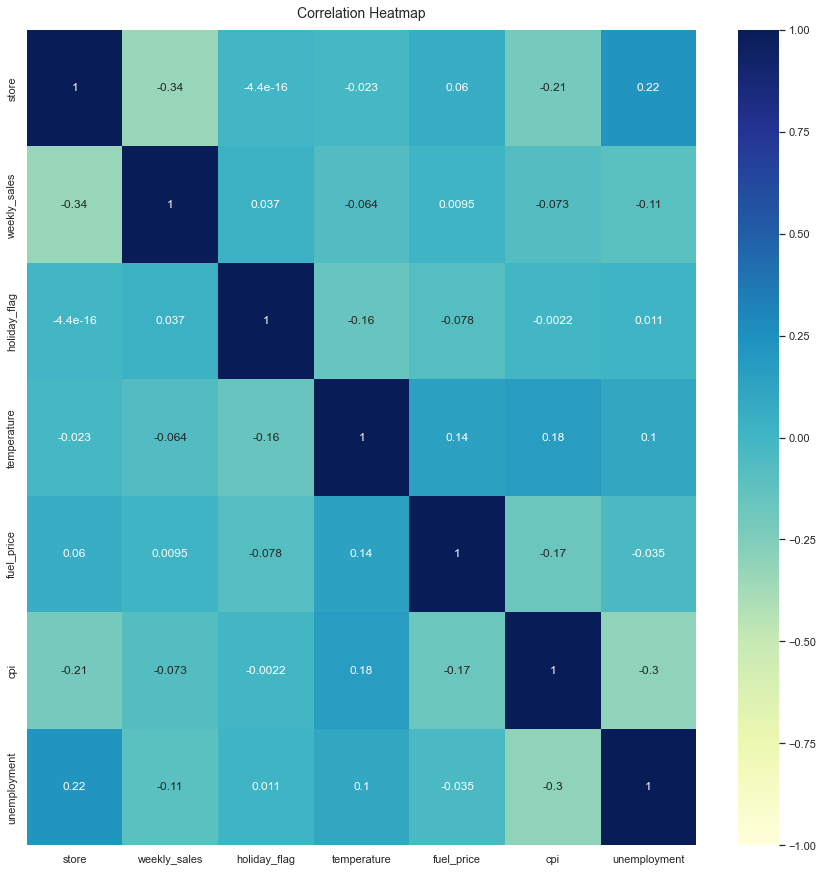

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(sales.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [28]:
#function to extract data from a dataframe given the name of the data_field name and corresponding value
def get_store_df(data, data_field, field_value):
    return (data[data[data_field] == field_value])

In [29]:
store_corr = pd.DataFrame(index = ['store', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment'])

for i in range(1, 46):
    store_df = get_store_df(sales, 'store', i)
    store_corr['store_'+str(i)] = store_df.corr()['weekly_sales'].tolist()

In [30]:
store_corr.head()

store_1   store_2   store_3   store_4   store_5   store_6  \
store              NaN       NaN       NaN       NaN       NaN       NaN   
weekly_sales  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
holiday_flag  0.194905  0.177726  0.208556  0.153388  0.302525  0.150424   
temperature  -0.222701 -0.297673 -0.377524 -0.225583 -0.175517 -0.084863   
fuel_price    0.124592 -0.196375  0.140886  0.211549  0.167352 -0.103356   

               store_7   store_8   store_9  store_10  ...  store_36  store_37  \
store              NaN       NaN       NaN       NaN  ...       NaN       NaN   
weekly_sales  1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
holiday_flag  0.248766  0.172383  0.179264  0.195119  ... -0.026605 -0.143336   
temperature   0.015077 -0.312324 -0.208343 -0.432569  ... -0.094454 -0.300493   
fuel_price    0.110356  0.029752  0.205404 -0.185058  ... -0.727462  0.208218   

              store_38  store_39  store_40  store_41  store_42  store_43  \
store              NaN       NaN       NaN       NaN       NaN       NaN   
weekly_sales  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
holiday_flag -0.027163  0.127115  0.101524  0.097854  0.061810  0.017768   
temperature   0.032993  0.064738  0.090598  0.106761 -0.151639  0.095272   
fuel_price    0.697184  0.266659  0.029627  0.305745  0.323031 -0.342037   

              store_44  store_45  
store              NaN       NaN  
weekly_sales  1.000000  1.000000  
holiday_flag -0.074599  0.106357  
temperature   0.267822 -0.201945  
fuel_price    0.607367 -0.046663  

[5 rows x 45 columns]

In [31]:
stor_corr = store_corr.dropna()
store_corrT = store_corr.T
del store_corrT['weekly_sales']
store_corrT

store  holiday_flag  temperature  fuel_price       cpi  unemployment
store_1     NaN      0.194905    -0.222701    0.124592  0.225408     -0.097955
store_2     NaN      0.177726    -0.297673   -0.196375 -0.062431      0.066325
store_3     NaN      0.208556    -0.377524    0.140886  0.317250     -0.230413
store_4     NaN      0.153388    -0.225583    0.211549  0.351157     -0.337015
store_5     NaN      0.302525    -0.175517    0.167352  0.308261     -0.207043
store_6     NaN      0.150424    -0.084863   -0.103356 -0.011357      0.044251
store_7     NaN      0.248766     0.015077    0.110356  0.289044     -0.165382
store_8     NaN      0.172383    -0.312324    0.029752  0.120255     -0.052580
store_9     NaN      0.179264    -0.208343    0.205404  0.294805     -0.191534
store_10    NaN      0.195119    -0.432569   -0.185058 -0.115374      0.131908
store_11    NaN      0.152674    -0.278503   -0.041299  0.069781     -0.020339
store_12    NaN      0.255340    -0.379416    0.015072  0.084087     -0.009286
store_13    NaN      0.113405    -0.137746    0.076500  0.163976     -0.171633
store_14    NaN      0.086305    -0.199851   -0.350340 -0.419755      0.210786
store_15    NaN      0.189688    -0.050541   -0.190398 -0.174467      0.078905
store_16    NaN      0.152345     0.182948   -0.002426  0.124285     -0.070864
store_17    NaN      0.211512     0.081012    0.311631  0.348571     -0.263600
store_18    NaN      0.131950    -0.144278   -0.275051 -0.193541      0.139179
store_19    NaN      0.189520    -0.080805   -0.190684 -0.155341      0.101464
store_20    NaN      0.140983    -0.264983   -0.013507  0.058706     -0.095341
store_21    NaN      0.150505    -0.177084   -0.136542 -0.163649      0.218367
store_22    NaN      0.096199    -0.082892   -0.074896 -0.038602      0.039043
store_23    NaN      0.080062     0.056257    0.018392  0.084248     -0.077169
store_24    NaN      0.194128     0.111833   -0.105005 -0.013684     -0.012261
store_25    NaN      0.080266    -0.031311   -0.084262 -0.010914     -0.004958
store_26    NaN      0.172268     0.211722    0.023475  0.131980     -0.066899
store_27    NaN      0.134279     0.121809   -0.227238 -0.213082     -0.014275
store_28    NaN      0.234237    -0.376506   -0.142722 -0.095908      0.136671
store_29    NaN      0.187405    -0.129144   -0.092129 -0.072530      0.084682
store_30    NaN     -0.020753    -0.330816   -0.431441 -0.298188      0.201862
store_31    NaN      0.227655    -0.262192    0.109563  0.132887     -0.064738
store_32    NaN      0.074198    -0.111681    0.118010  0.196782     -0.099455
store_33    NaN      0.031160     0.019244   -0.059887 -0.052271      0.101175
store_34    NaN      0.197760    -0.278523    0.013688  0.115437      0.017010
store_35    NaN      0.201414     0.043392   -0.498197 -0.424107      0.483865
store_36    NaN     -0.026605    -0.094454   -0.727462 -0.915095      0.833734
store_37    NaN     -0.143336    -0.300493    0.208218  0.244507     -0.221287
store_38    NaN     -0.027163     0.032993    0.697184  0.812837     -0.785290
store_39    NaN      0.127115     0.064738    0.266659  0.428043     -0.384681
store_40    NaN      0.101524     0.090598    0.029627  0.113318     -0.112528
store_41    NaN      0.097854     0.106761    0.305745  0.392293     -0.350630
store_42    NaN      0.061810    -0.151639    0.323031  0.360859     -0.356355
store_43    NaN      0.017768     0.095272   -0.342037 -0.285686     -0.201954
store_44    NaN     -0.074599     0.267822    0.607367  0.740150     -0.780076
store_45    NaN      0.106357    -0.201945   -0.046663 -0.023548     -0.004041

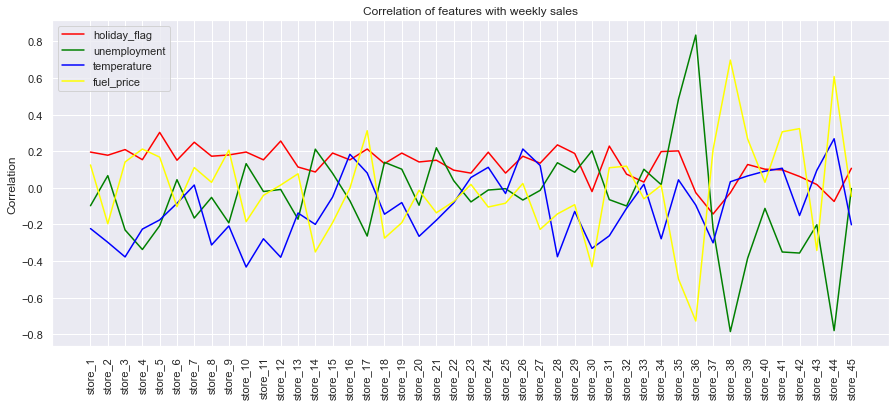

In [32]:
#Examine the correlationship of independent features with weekly_sales

fig, axes = plt.subplots(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.lineplot(x = store_corrT.index, y = store_corrT.holiday_flag, color = 'red')
sns.lineplot(x = store_corrT.index, y = store_corrT.unemployment, color = 'green')
sns.lineplot(x = store_corrT.index, y = store_corrT.temperature, color = 'blue')
sns.lineplot(x = store_corrT.index, y = store_corrT.fuel_price, color = 'yellow')
#sns.lineplot(x = store_corrT.index, y = store_corrT.employment, color = 'black')
plt.legend(['holiday_flag', 'unemployment', 'temperature', 'fuel_price', 'employment'], loc = 'best')
plt.grid(True)
plt.ylabel('Correlation')
plt.title('Correlation of features with weekly sales')
plt.show()


In [33]:
#positive unemployment correlation
pos_u_corr = store_corrT[store_corrT['unemployment']>0].sort_values(by ='unemployment')

#negative unemployment correlation
neg_u_corr = store_corrT[store_corrT['unemployment']<0].sort_values(by ='unemployment')

In [34]:
print(f"\n There are {pos_u_corr['unemployment'].shape[0]} stores whose sales will increase as unemployment increases")
pos_u_corr    


 There are 16 stores whose sales will increase as unemployment increases


store  holiday_flag  temperature  fuel_price       cpi  unemployment
store_34    NaN      0.197760    -0.278523    0.013688  0.115437      0.017010
store_22    NaN      0.096199    -0.082892   -0.074896 -0.038602      0.039043
store_6     NaN      0.150424    -0.084863   -0.103356 -0.011357      0.044251
store_2     NaN      0.177726    -0.297673   -0.196375 -0.062431      0.066325
store_15    NaN      0.189688    -0.050541   -0.190398 -0.174467      0.078905
store_29    NaN      0.187405    -0.129144   -0.092129 -0.072530      0.084682
store_33    NaN      0.031160     0.019244   -0.059887 -0.052271      0.101175
store_19    NaN      0.189520    -0.080805   -0.190684 -0.155341      0.101464
store_10    NaN      0.195119    -0.432569   -0.185058 -0.115374      0.131908
store_28    NaN      0.234237    -0.376506   -0.142722 -0.095908      0.136671
store_18    NaN      0.131950    -0.144278   -0.275051 -0.193541      0.139179
store_30    NaN     -0.020753    -0.330816   -0.431441 -0.298188      0.201862
store_14    NaN      0.086305    -0.199851   -0.350340 -0.419755      0.210786
store_21    NaN      0.150505    -0.177084   -0.136542 -0.163649      0.218367
store_35    NaN      0.201414     0.043392   -0.498197 -0.424107      0.483865
store_36    NaN     -0.026605    -0.094454   -0.727462 -0.915095      0.833734

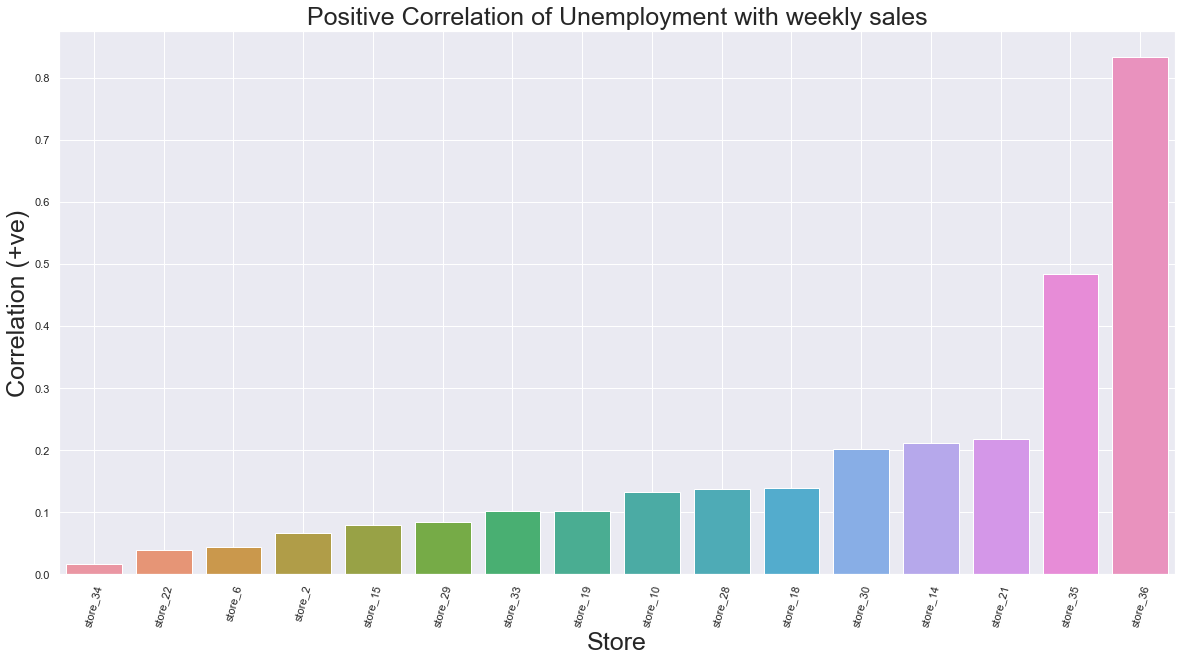

In [35]:
fig, axes = plt.subplots(figsize = (20, 10))
plt.xticks(rotation = 75)
sns.barplot(x = pos_u_corr.index, y= pos_u_corr.unemployment)
plt.xlabel('Store', fontsize = 25)
plt.ylabel('Correlation (+ve)', fontsize = 25)
plt.title('Positive Correlation of Unemployment with weekly sales', fontsize = 25)
plt.grid(True)

In [36]:
print(f"\n There are {neg_u_corr['unemployment'].shape[0]} stores whose sales will decreases as unemployment increases")
neg_u_corr


 There are 29 stores whose sales will decreases as unemployment increases


store  holiday_flag  temperature  fuel_price       cpi  unemployment
store_38    NaN     -0.027163     0.032993    0.697184  0.812837     -0.785290
store_44    NaN     -0.074599     0.267822    0.607367  0.740150     -0.780076
store_39    NaN      0.127115     0.064738    0.266659  0.428043     -0.384681
store_42    NaN      0.061810    -0.151639    0.323031  0.360859     -0.356355
store_41    NaN      0.097854     0.106761    0.305745  0.392293     -0.350630
store_4     NaN      0.153388    -0.225583    0.211549  0.351157     -0.337015
store_17    NaN      0.211512     0.081012    0.311631  0.348571     -0.263600
store_3     NaN      0.208556    -0.377524    0.140886  0.317250     -0.230413
store_37    NaN     -0.143336    -0.300493    0.208218  0.244507     -0.221287
store_5     NaN      0.302525    -0.175517    0.167352  0.308261     -0.207043
store_43    NaN      0.017768     0.095272   -0.342037 -0.285686     -0.201954
store_9     NaN      0.179264    -0.208343    0.205404  0.294805     -0.191534
store_13    NaN      0.113405    -0.137746    0.076500  0.163976     -0.171633
store_7     NaN      0.248766     0.015077    0.110356  0.289044     -0.165382
store_40    NaN      0.101524     0.090598    0.029627  0.113318     -0.112528
store_32    NaN      0.074198    -0.111681    0.118010  0.196782     -0.099455
store_1     NaN      0.194905    -0.222701    0.124592  0.225408     -0.097955
store_20    NaN      0.140983    -0.264983   -0.013507  0.058706     -0.095341
store_23    NaN      0.080062     0.056257    0.018392  0.084248     -0.077169
store_16    NaN      0.152345     0.182948   -0.002426  0.124285     -0.070864
store_26    NaN      0.172268     0.211722    0.023475  0.131980     -0.066899
store_31    NaN      0.227655    -0.262192    0.109563  0.132887     -0.064738
store_8     NaN      0.172383    -0.312324    0.029752  0.120255     -0.052580
store_11    NaN      0.152674    -0.278503   -0.041299  0.069781     -0.020339
store_27    NaN      0.134279     0.121809   -0.227238 -0.213082     -0.014275
store_24    NaN      0.194128     0.111833   -0.105005 -0.013684     -0.012261
store_12    NaN      0.255340    -0.379416    0.015072  0.084087     -0.009286
store_25    NaN      0.080266    -0.031311   -0.084262 -0.010914     -0.004958
store_45    NaN      0.106357    -0.201945   -0.046663 -0.023548     -0.004041

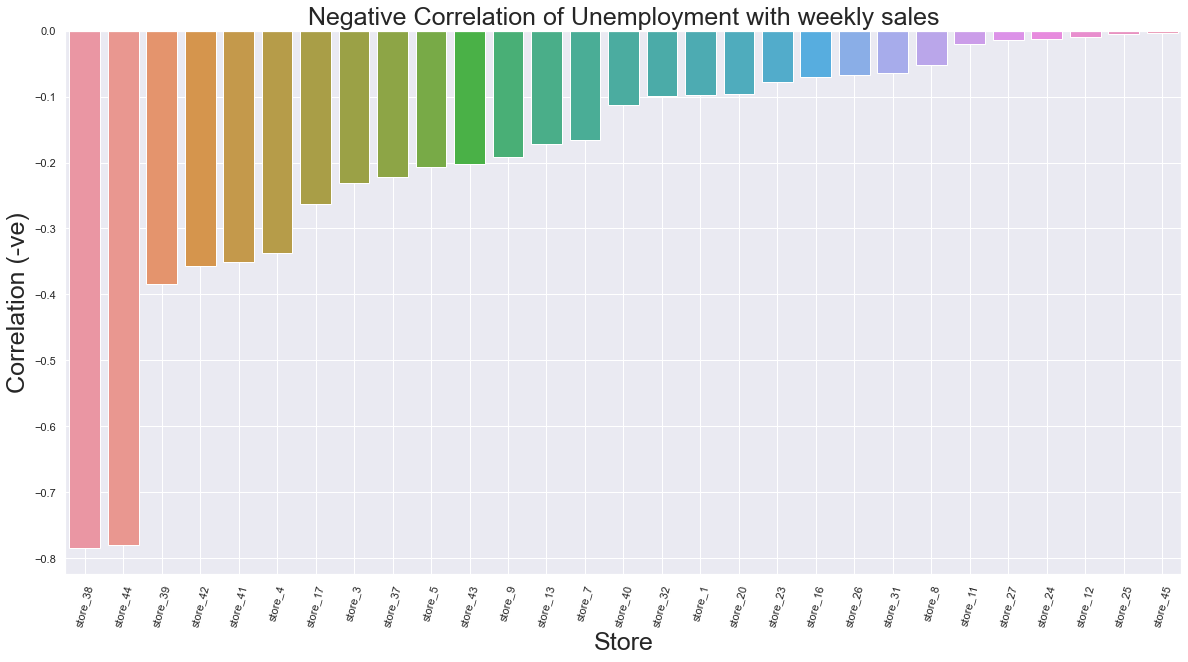

In [37]:
fig, axes = plt.subplots(figsize = (20, 10))
plt.xticks(rotation = 75)
sns.barplot(x = neg_u_corr.index, y=neg_u_corr.unemployment)
plt.xlabel('Store', fontsize = 25)
plt.ylabel('Correlation (-ve)', fontsize = 25)
plt.title('Negative Correlation of Unemployment with weekly sales', fontsize = 25)
plt.grid(True)

In [38]:
unemp_1 = pd.DataFrame(zip(pos_u_corr.index, pos_u_corr.unemployment), columns = ['store(pos)', 'corr(pos)'])
unemp_2 = pd.DataFrame(zip(neg_u_corr.index, neg_u_corr.unemployment), columns = ['store(neg)', 'corr(neg)'])
unemployment = pd.concat([unemp_2, unemp_1], axis=1, join = 'outer', ignore_index = True)
unemployment.columns = ['store(neg)', 'corr(neg)', 'store(pos)', 'corr(pos)']
unemployment

store(neg)  corr(neg) store(pos)  corr(pos)
0    store_38  -0.785290   store_34   0.017010
1    store_44  -0.780076   store_22   0.039043
2    store_39  -0.384681    store_6   0.044251
3    store_42  -0.356355    store_2   0.066325
4    store_41  -0.350630   store_15   0.078905
5     store_4  -0.337015   store_29   0.084682
6    store_17  -0.263600   store_33   0.101175
7     store_3  -0.230413   store_19   0.101464
8    store_37  -0.221287   store_10   0.131908
9     store_5  -0.207043   store_28   0.136671
10   store_43  -0.201954   store_18   0.139179
11    store_9  -0.191534   store_30   0.201862
12   store_13  -0.171633   store_14   0.210786
13    store_7  -0.165382   store_21   0.218367
14   store_40  -0.112528   store_35   0.483865
15   store_32  -0.099455   store_36   0.833734
16    store_1  -0.097955        NaN        NaN
17   store_20  -0.095341        NaN        NaN
18   store_23  -0.077169        NaN        NaN
19   store_16  -0.070864        NaN        NaN
20   store_26  -0.066899        NaN        NaN
21   store_31  -0.064738        NaN        NaN
22    store_8  -0.052580        NaN        NaN
23   store_11  -0.020339        NaN        NaN
24   store_27  -0.014275        NaN        NaN
25   store_24  -0.012261        NaN        NaN
26   store_12  -0.009286        NaN        NaN
27   store_25  -0.004958        NaN        NaN
28   store_45  -0.004041        NaN        NaN

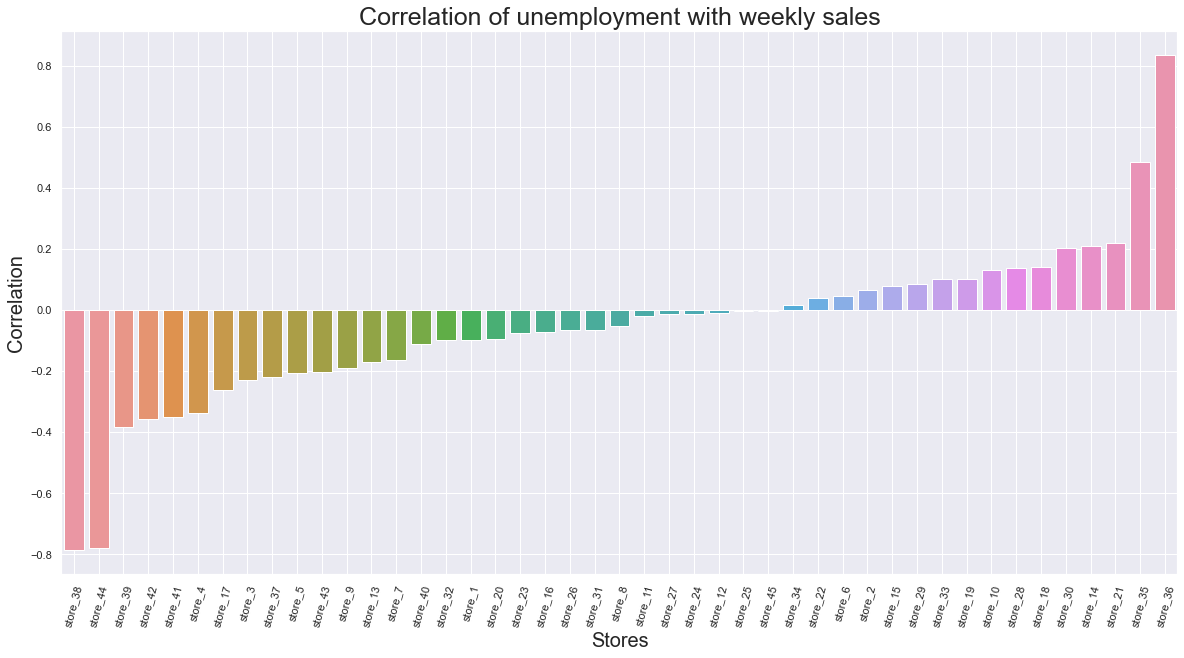

In [39]:
store_corrTT = store_corrT.sort_values(by = 'unemployment')
fig,axes = plt.subplots(figsize=(20, 10))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.unemployment)
plt.xlabel('Stores', fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Correlation of unemployment with weekly sales', fontsize = 25)
plt.grid(True)
plt.show()


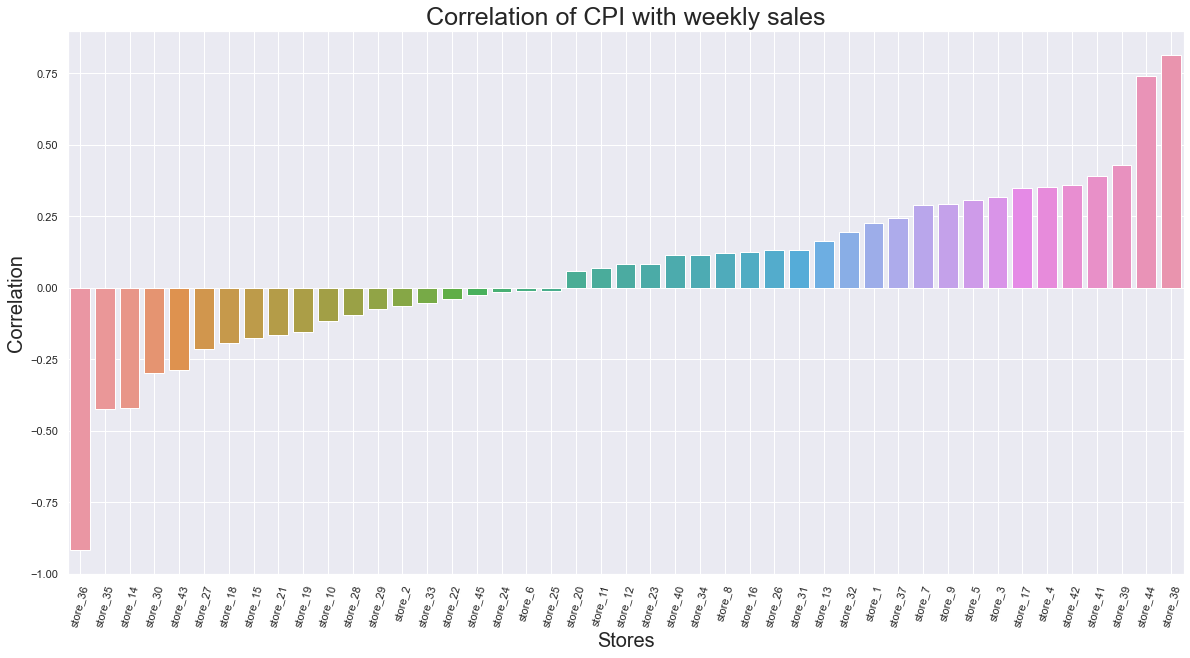

In [40]:
store_corrTT = store_corrT.sort_values(by = 'cpi')
fig,axes = plt.subplots(figsize=(20, 10))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.cpi)
plt.xlabel('Stores', fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Correlation of CPI with weekly sales', fontsize = 25)
plt.grid(True)
plt.show()

In [41]:
store_corrTT.columns

Index(['store', 'holiday_flag', 'temperature', 'fuel_price', 'cpi',
       'unemployment'],
      dtype='object')

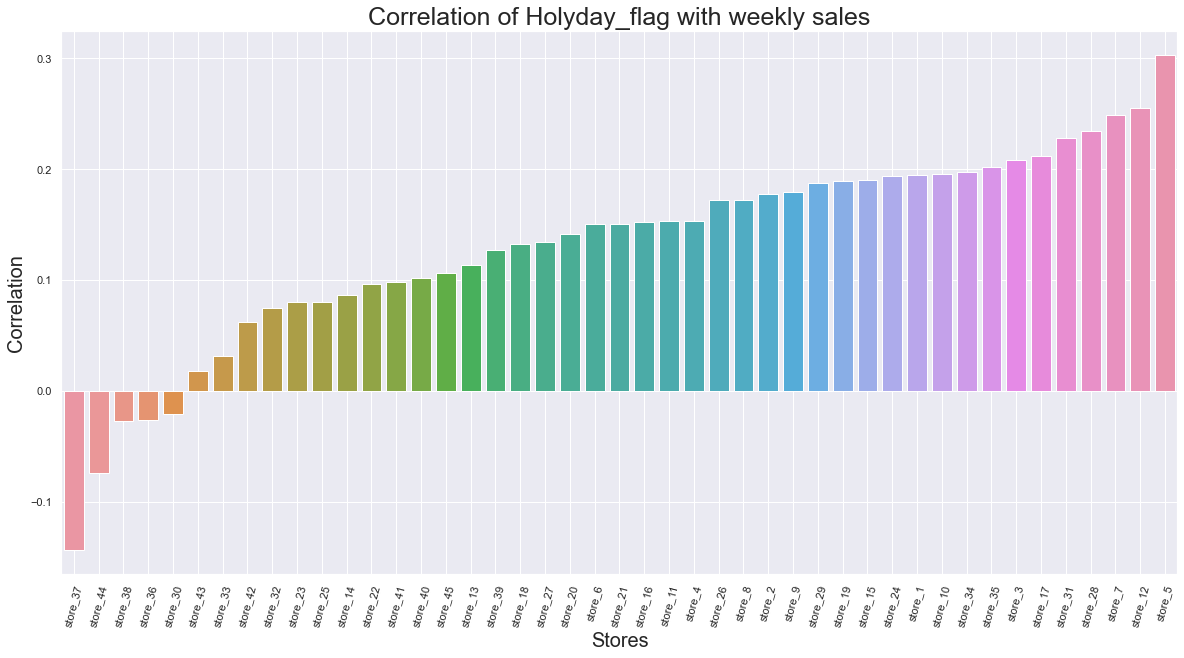

In [42]:
store_corrTT = store_corrT.sort_values(by = 'holiday_flag')
fig,axes = plt.subplots(figsize=(20, 10))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.holiday_flag)
plt.xlabel('Stores', fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Correlation of Holyday_flag with weekly sales', fontsize = 25)
plt.grid(True)
plt.show()

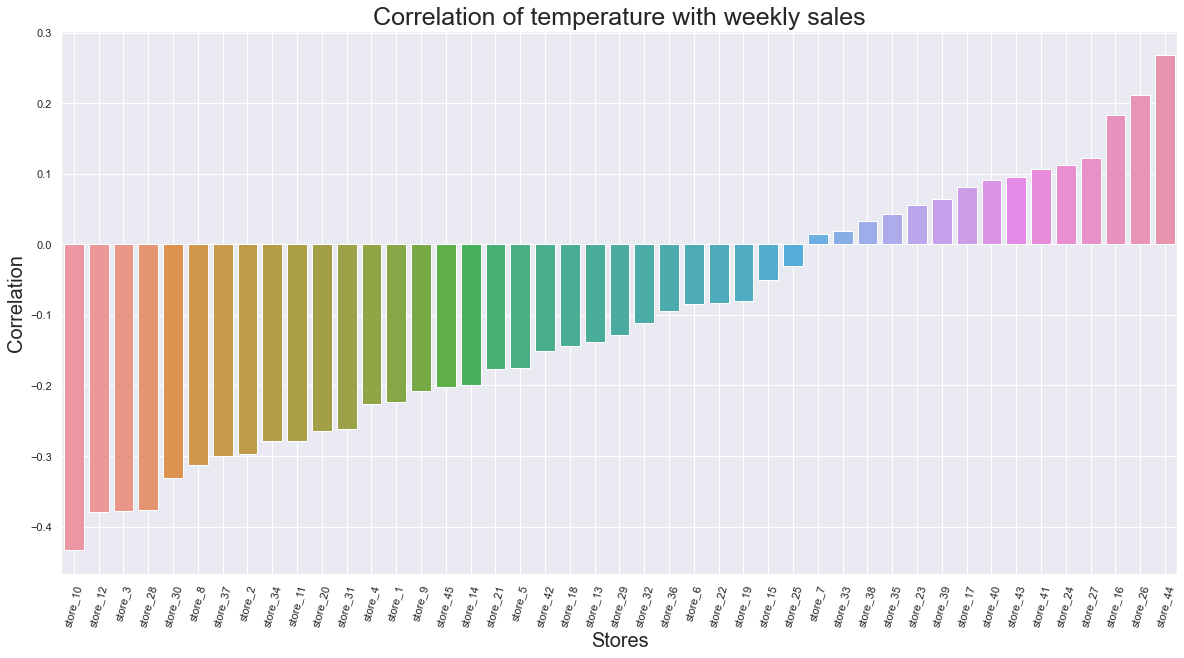

In [43]:
store_corrTT = store_corrT.sort_values(by = 'temperature')
fig,axes = plt.subplots(figsize=(20, 10))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.temperature)
plt.xlabel('Stores', fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Correlation of temperature with weekly sales', fontsize = 25)
plt.grid(True)
plt.show()

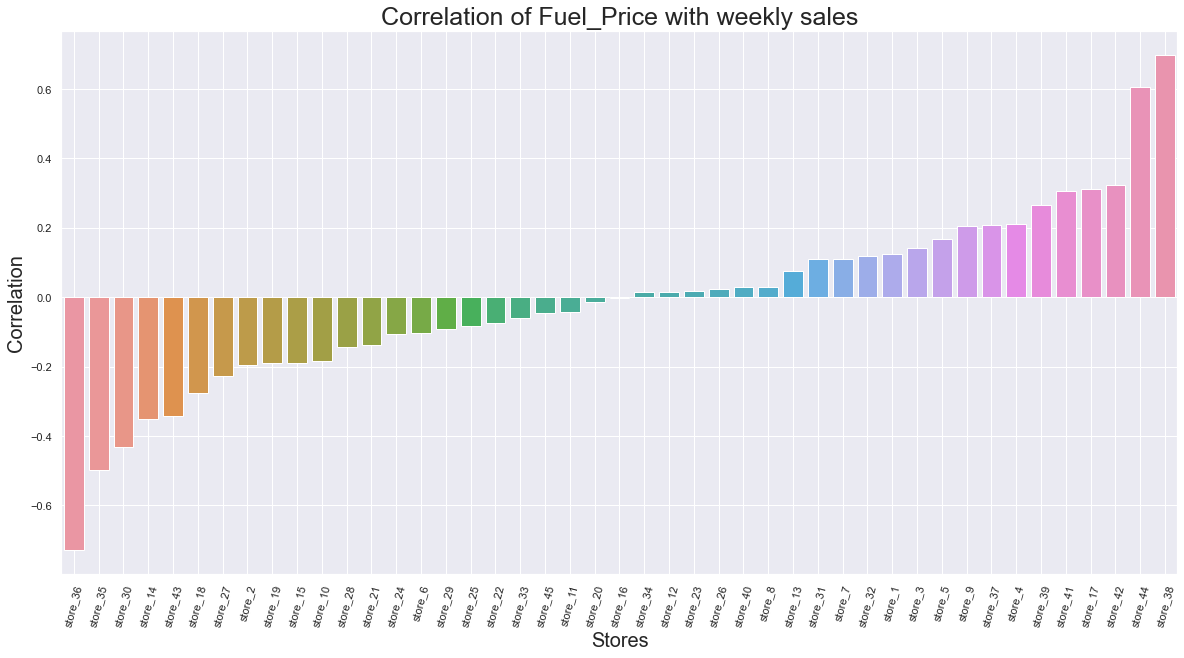

In [44]:
store_corrTT = store_corrT.sort_values(by = 'fuel_price')
fig,axes = plt.subplots(figsize=(20, 10))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.fuel_price)
plt.xlabel('Stores', fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Correlation of Fuel_Price with weekly sales', fontsize = 25)
plt.grid(True)
plt.show()

In [45]:
# Explore correlation of other features with weekly_sales
sales.corr()['weekly_sales']

store          -0.335332
weekly_sales    1.000000
holiday_flag    0.036891
temperature    -0.063810
fuel_price      0.009464
cpi            -0.072634
unemployment   -0.106176
Name: weekly_sales, dtype: float64

**Correlation shows that fuel_price has the least effect on weekly_sales and unemployment has the strongest correlation with negative correlation which implies that as unemployment goes up, the weekly_sales desrese.**

In [46]:
Highest_wkly_sales = sales.groupby(['store'])['weekly_sales'].sum().reset_index().sort_values('weekly_sales', ascending=False)
store_list = Highest_wkly_sales['store'].tolist()
highest_10 = Highest_wkly_sales['store'].head(10).tolist()

print(Highest_wkly_sales.head(10),f'\n\n The Ten stores with the highest weekly sales{highest_10}')

    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08 

 The Ten stores with the highest weekly sales[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


Text(0, 0.5, 'Weekly Sales')

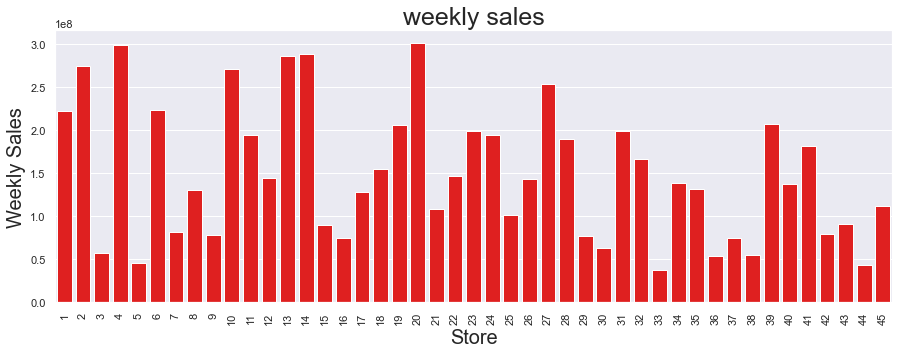

In [47]:
fig, axes = plt.subplots(figsize = (15, 5))
sns.barplot(x='store', y='weekly_sales', data = Highest_wkly_sales, color='red')
plt.xticks(rotation = 90)
plt.title('weekly sales', fontsize = 25)
plt.xlabel('Store', fontsize = 20)
plt.ylabel('Weekly Sales', fontsize = 20)

**show average weekly_sales of all the stores**

In [48]:
avg_wkly_sales = sales.groupby(['store'])['weekly_sales'].mean().reset_index().sort_values('weekly_sales', ascending = False)
avg_wkly_sales.head(10)

store  weekly_sales
19     20  2.107677e+06
3       4  2.094713e+06
13     14  2.020978e+06
12     13  2.003620e+06
1       2  1.925751e+06
9      10  1.899425e+06
26     27  1.775216e+06
5       6  1.564728e+06
0       1  1.555264e+06
38     39  1.450668e+06

Text(0, 0.5, 'Weekly Sales')

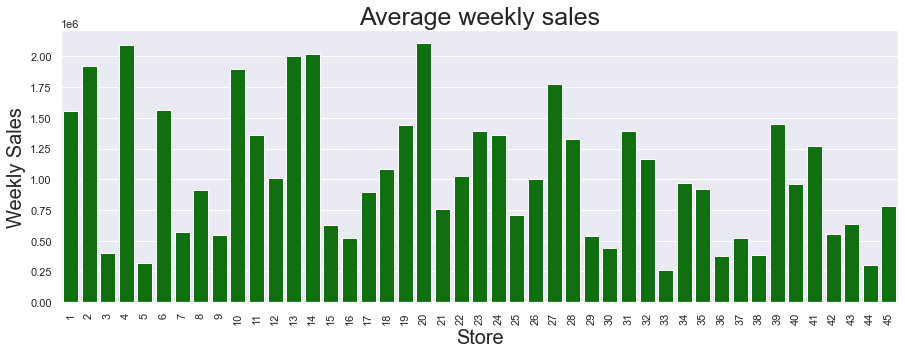

In [49]:
fig, axes = plt.subplots(figsize = (15, 5))
sns.barplot(x='store', y='weekly_sales', data = avg_wkly_sales, color='green')
plt.xticks(rotation = 90)
plt.title('Average weekly sales', fontsize = 25)
plt.xlabel('Store', fontsize = 20)
plt.ylabel('Weekly Sales', fontsize = 20)

**Number of sales records reported by each store**

In [50]:
store_count = sales['store'].value_counts().unique()
print(f'Each store reported {store_count[0]} weekly sales')

Each store reported 143 weekly sales


**Investigate the effect of weather on weakly sales of the stores**

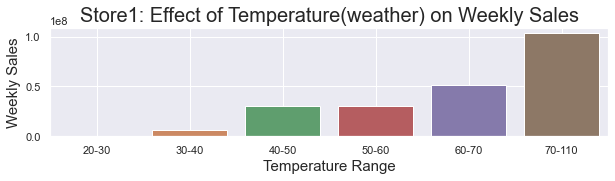

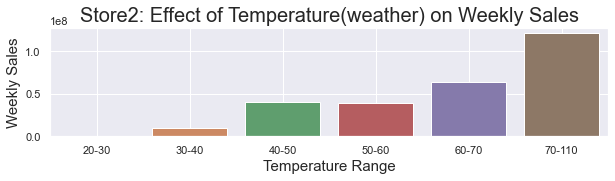

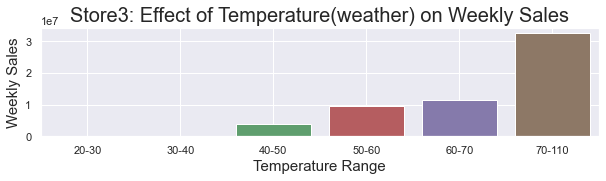

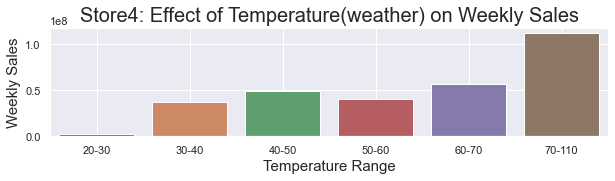

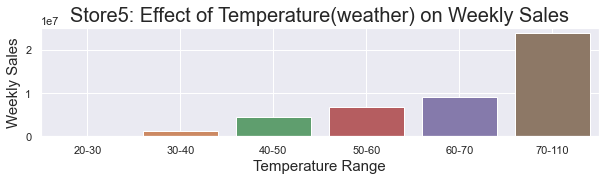

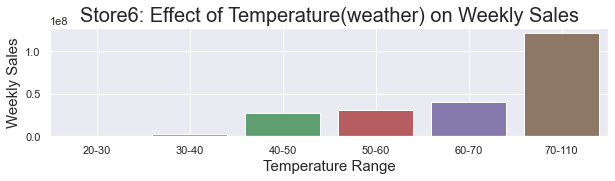

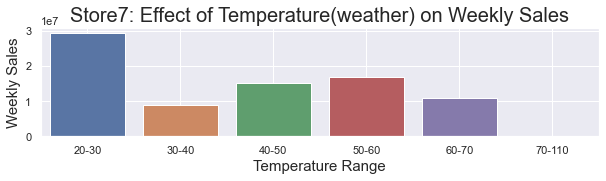

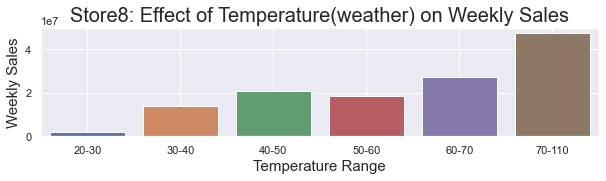

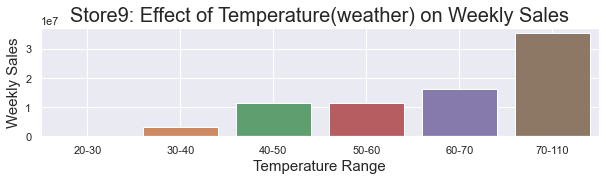

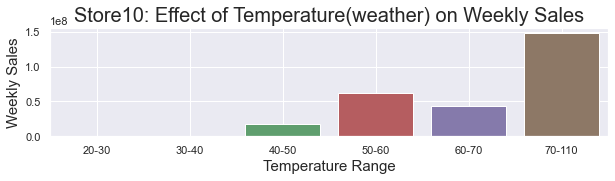

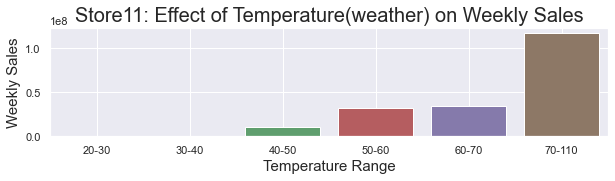

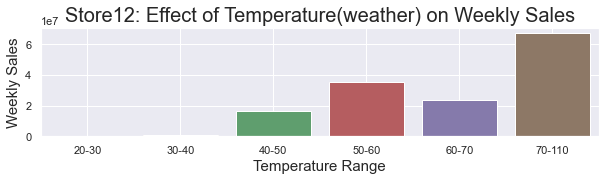

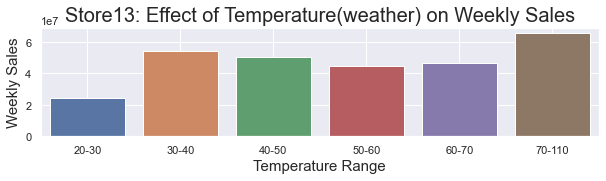

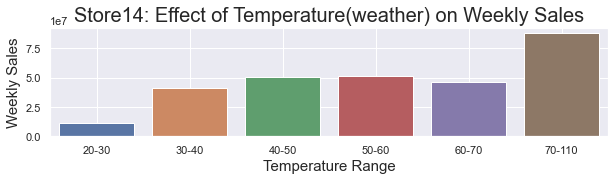

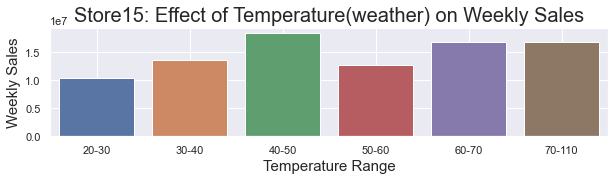

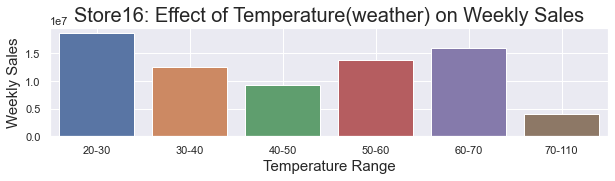

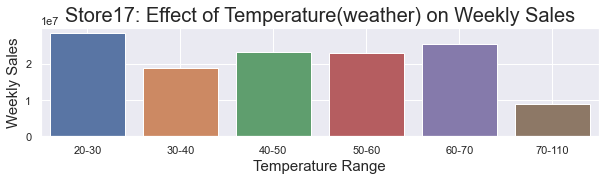

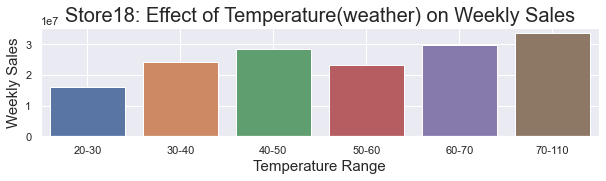

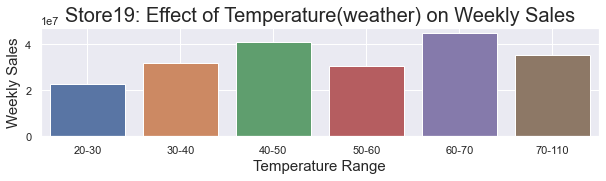

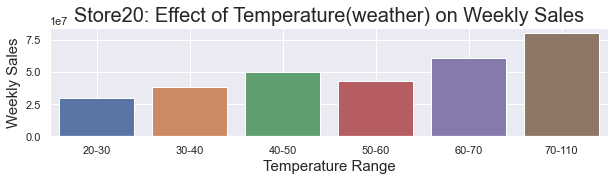

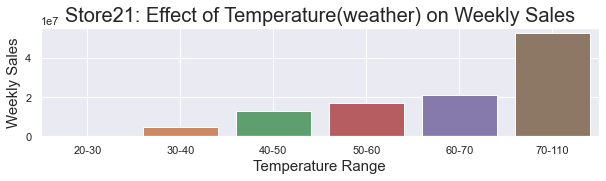

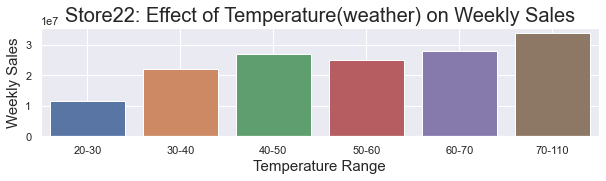

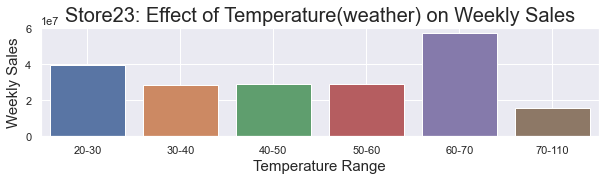

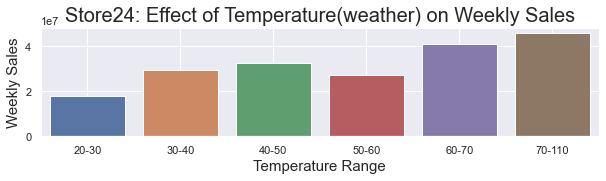

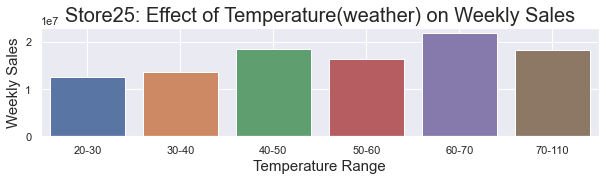

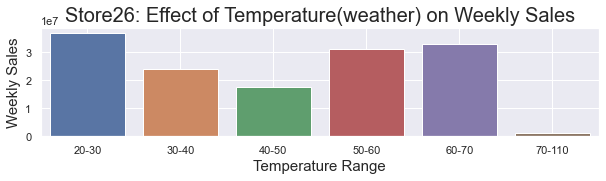

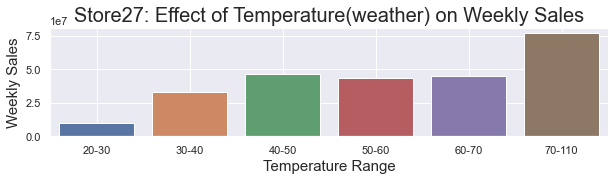

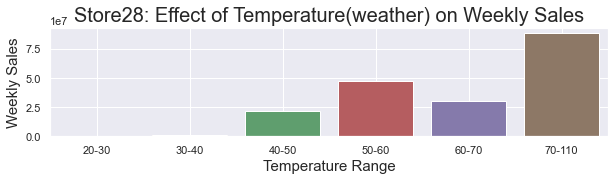

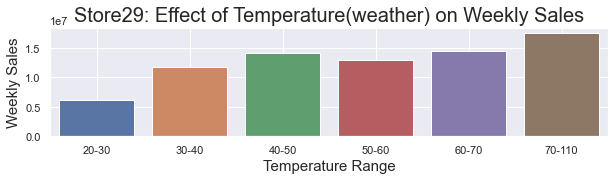

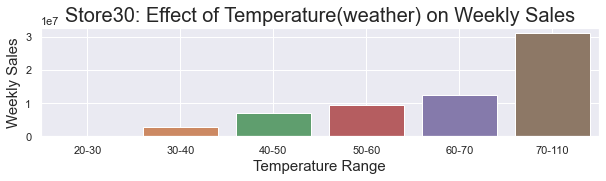

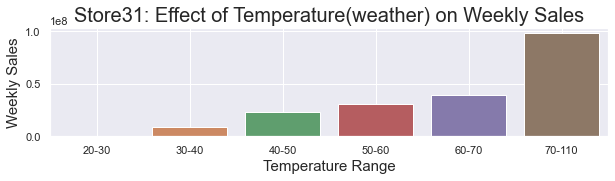

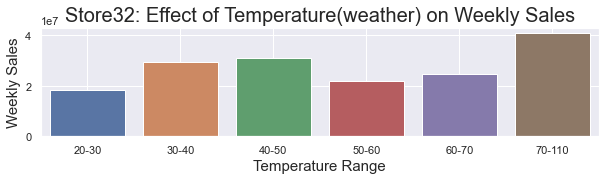

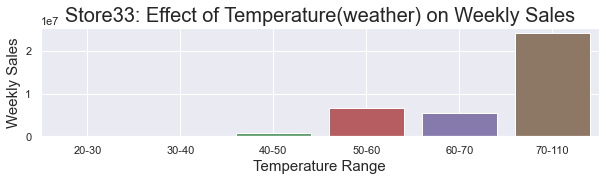

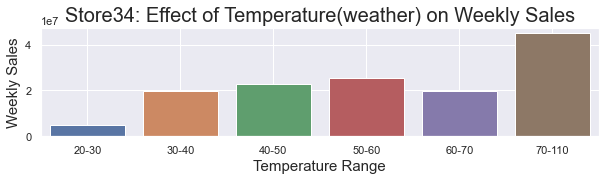

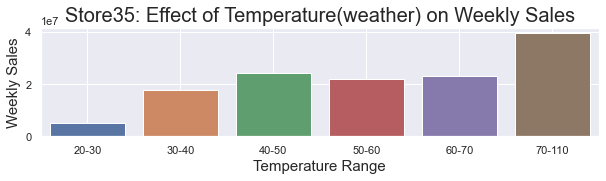

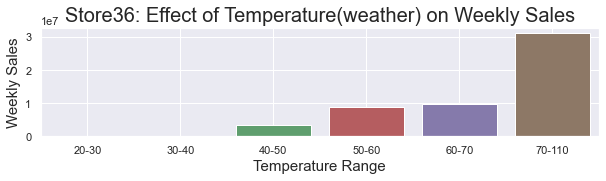

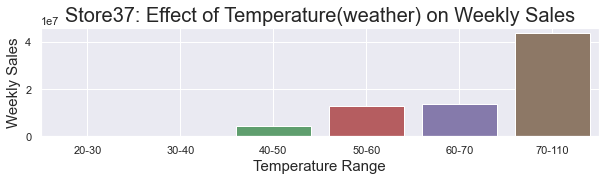

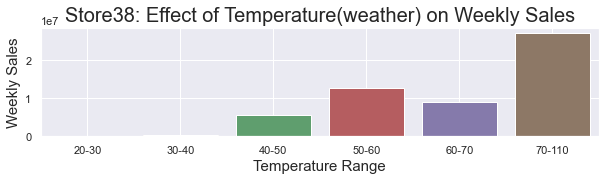

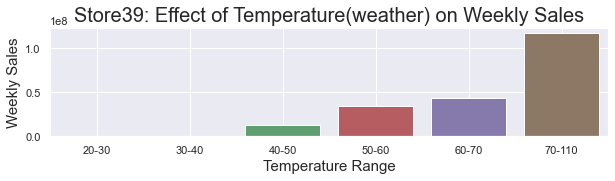

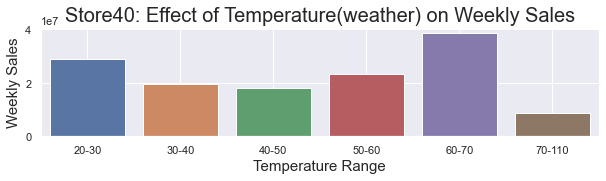

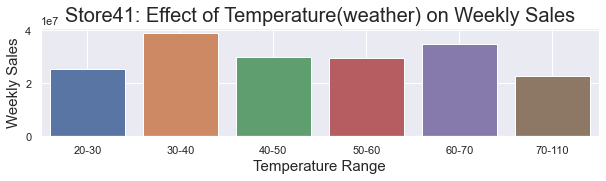

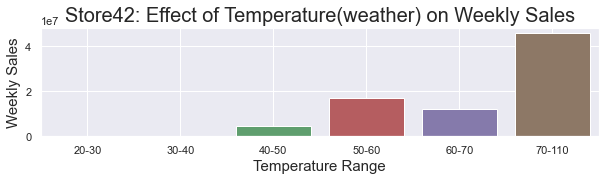

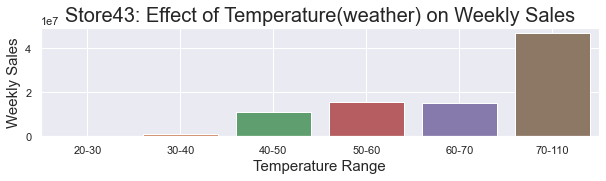

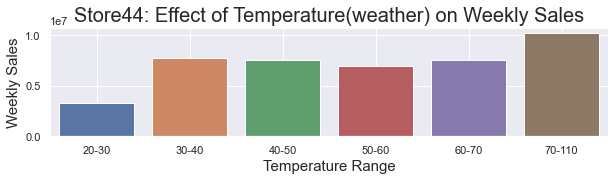

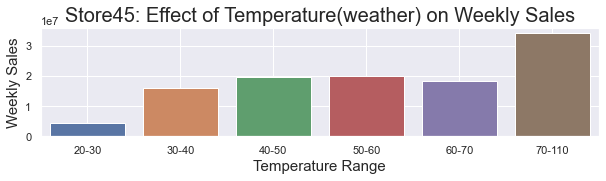

In [51]:
store_list = sales['store'].unique()

for i in store_list:
    x_store = get_store_df(sales, 'store', i)
    x_store = x_store[['store', 'temperature', 'weekly_sales']].sort_values('temperature')
    x_store['temperature'] = pd.cut(x_store['temperature'], bins = [0, 30, 40, 50, 60, 70, 110], labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-110'])
    x_store = x_store.groupby('temperature')['weekly_sales'].sum().reset_index()
    
    fig, axes = plt.subplots(figsize = (10, 2))
    sns.barplot(x= x_store.temperature, y=x_store.weekly_sales)
    #plt.xticks(rotation = 90)
    plt.title(f'Store{i}: Effect of Temperature(weather) on Weekly Sales', fontsize = 20)
    plt.xlabel('Temperature Range', fontsize = 15)
    plt.ylabel('Weekly Sales', fontsize = 15)
    plt.grid(True)
    plt.show()
                                                                           

**What is the distribution of the features of the dataset?**

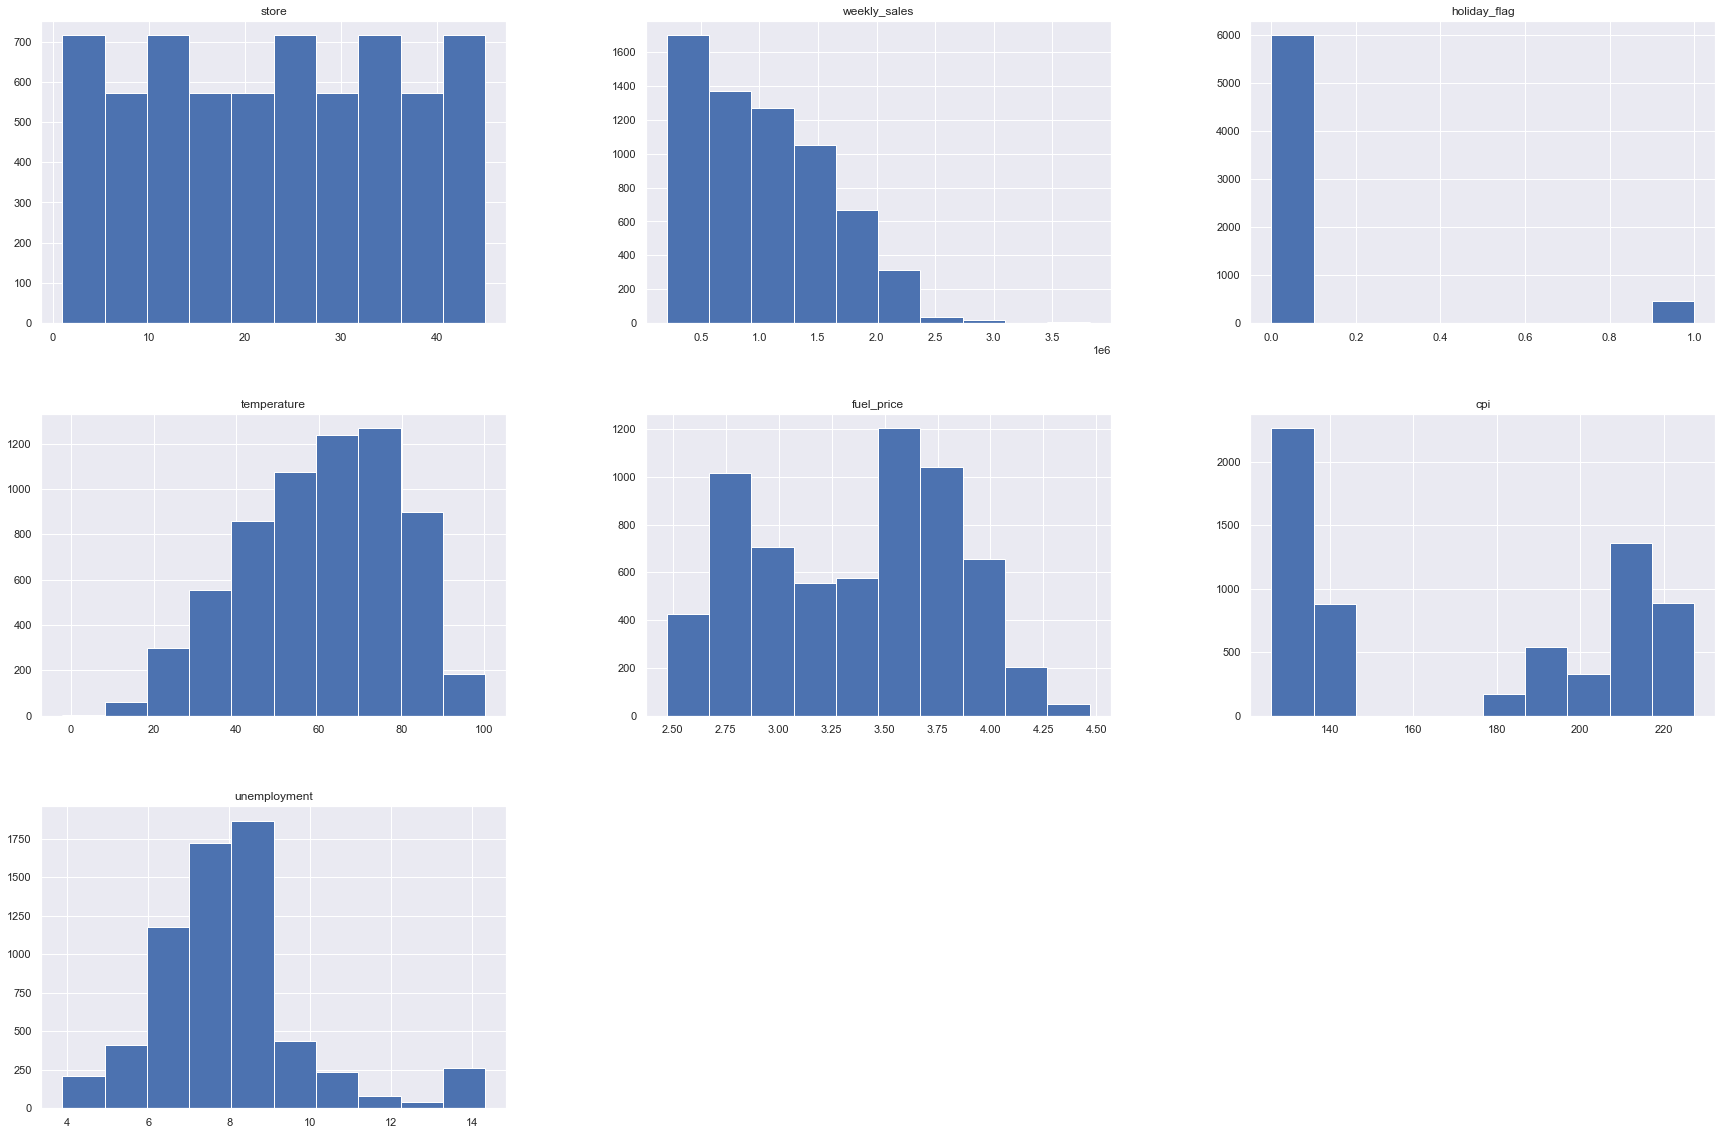

In [52]:
# histograms
sales.hist(figsize=(30,20));

From the above histograms, we can understand that: 
- the number of transactions occurred almost evenly across various stores and years.
- The distribution of `weekly_sales` right-skewed. Only a few of the weekly sales are above 2 million USD.
- The distribution of `temperature` is approximately normal.
- The distribution of `fuel_price` is bi-modal.
- `CPI` formed two clusters.
- `unemployment` rate is near normally distributed.
- Four consecutive months November-February recorded the highest sales.

In [53]:
def outliers_plot(xrange, l = 5, w = 2, wl = 20, ww = 10, hs = 1.5):
    fig, axes = plt.subplots(l, w, figsize = (wl, ww))
    plt.subplots_adjust(hspace = hs)
    j = 1
    
    for i in xrange:
        store_df = get_store_df(sales, 'store', i)
        plt.subplot(l, w, j)
        sns.boxplot(x=store_df['weekly_sales'])
        plt.title(f'store: {i}', fontsize = 15)
        j = j+1

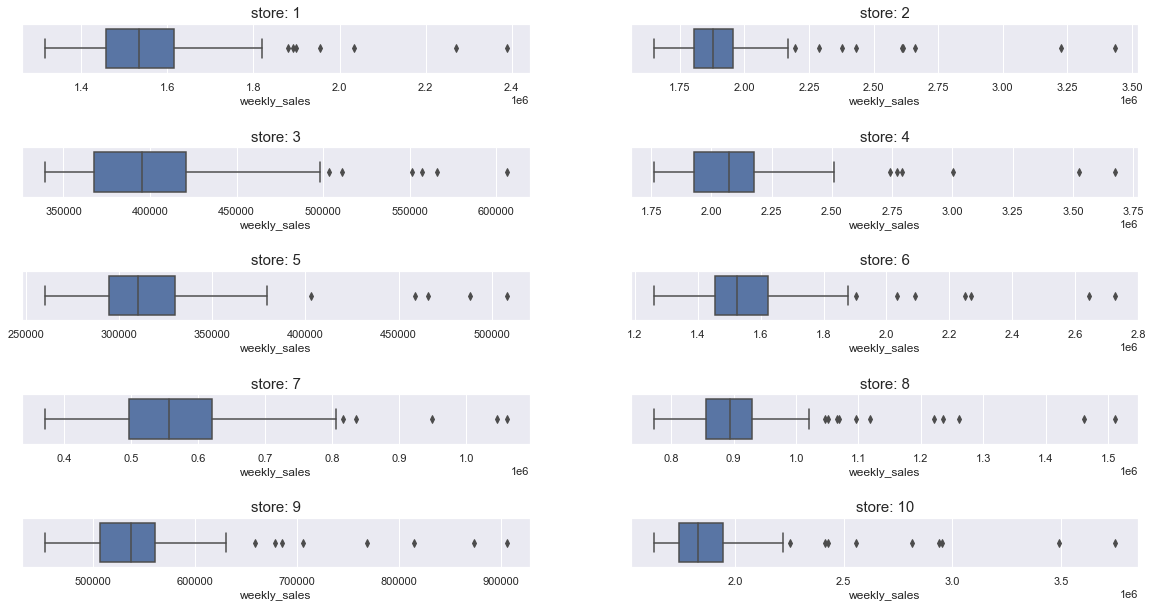

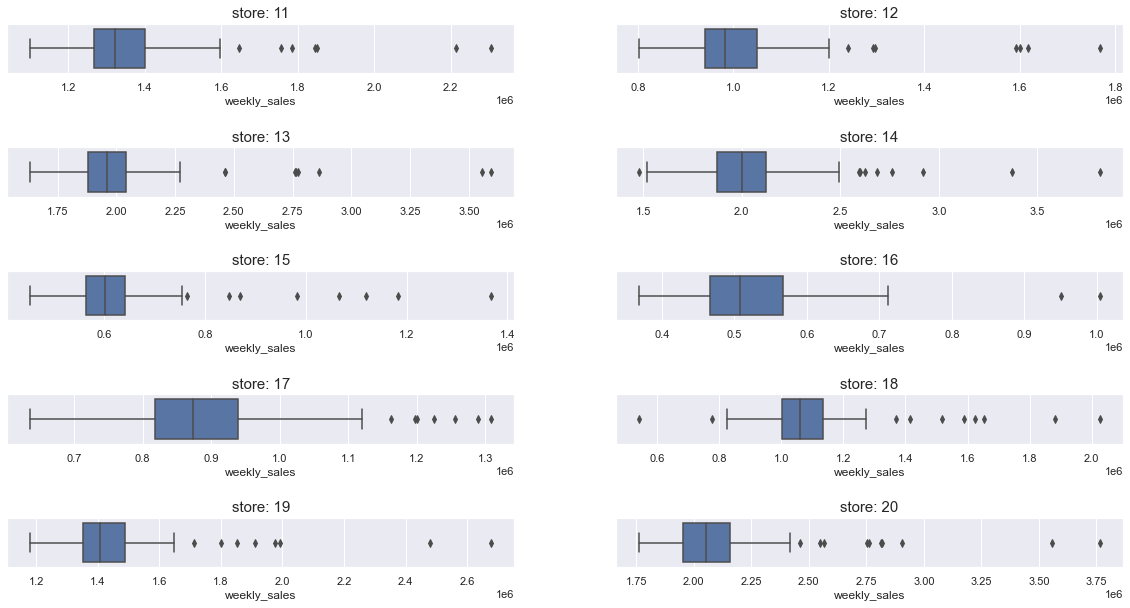

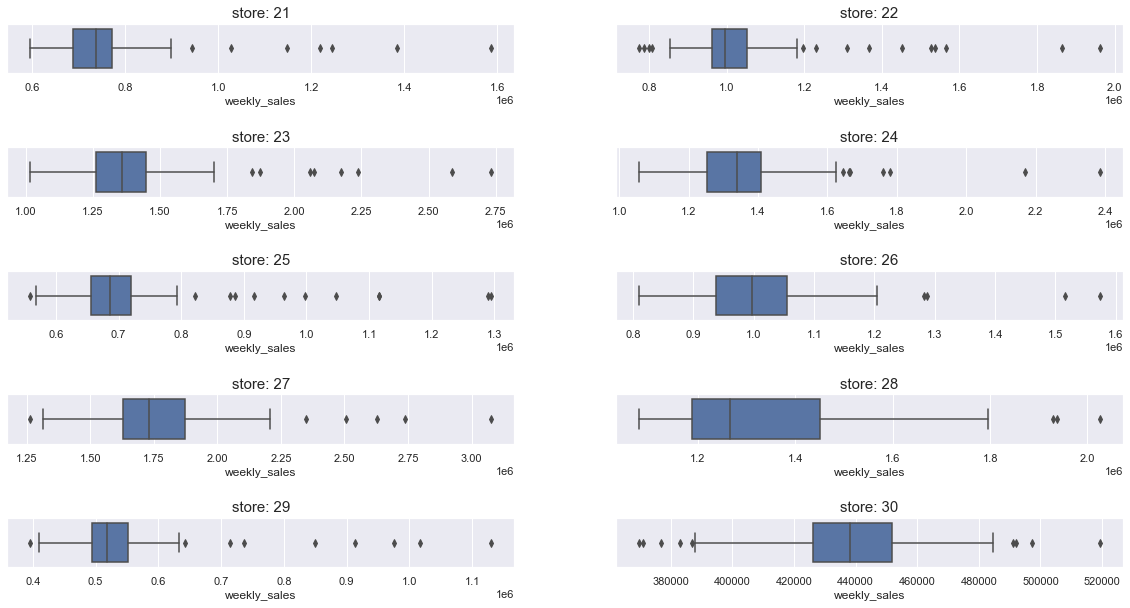

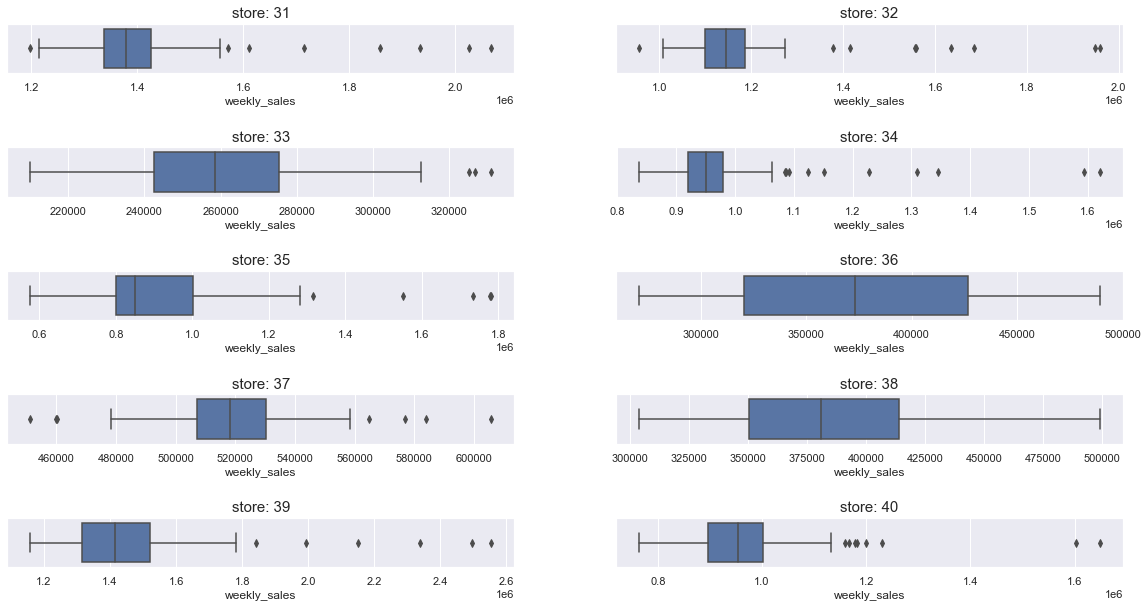

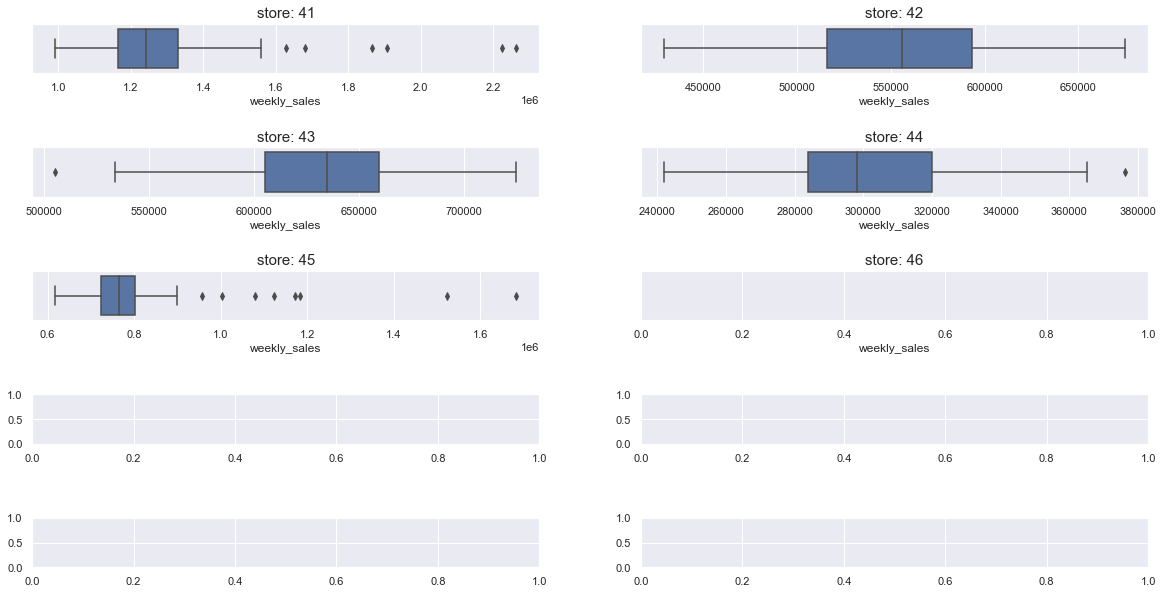

In [54]:
outliers_plot(range(1, 11))
outliers_plot(range(11, 21))
outliers_plot(range(21, 31))
outliers_plot(range(31, 41))
outliers_plot(range(41, 47))

**Which stores had the highest and lowest average revenues over the years?**

Identifying the top performing and lo performing stores or products in sales analysis can be useful for a variety of purposes. By analysing the sales data for different stores, businesses can identify opportunities for growth, understand customer preferences, optimise inventory levels, and identify potential problems or areas for improvement. Understanding the performance of different stores  can inform product development and marketing efforts, as well as help businesses allocate resources more effectively and make more informed business decisions.

We will create a function that takes a dataframe as input and generates two plots showing the top and bottom performing stores in terms of average sales.




In [55]:
def plot_top_and_bottom_stores(df, col):
    """
    Plot the top and bottom 5 stores based on their average weekly sales.
    
    Parameters:
    df (pandas DataFrame): The dataframe containing the sales data.
    col (str): The name of the column to group the data by.
    
    Returns:
    None
    """
    # Group the data by the specified column and sort it by sales in descending order
    df = df.groupby(col).mean().sort_values(by='weekly_sales', ascending=False)
    
    # Select the top 5 and bottom 5 products
    top_stores = df.head(5)
    bottom_stores = df.tail(5)
    
    # Set the color palette
    sns.set_palette("bright")
    
    # Create a bar chart of the top 5 products
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=top_stores.index, y=top_stores['weekly_sales']/1e6, order=top_stores.index)
    plt.title('Top 5 Stores by Average Sales')
    plt.ylabel('Average weekly sales (millions USD)')
    plt.show()
    
    # Create a bar chart of the bottom 5 products
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=bottom_stores.index, y=bottom_stores['weekly_sales']/1e6, order=bottom_stores.index)
    plt.title('Bottom 5 Stores by Average Sales')
    plt.ylabel('Average weekly sales (millions USD)')
    plt.show()


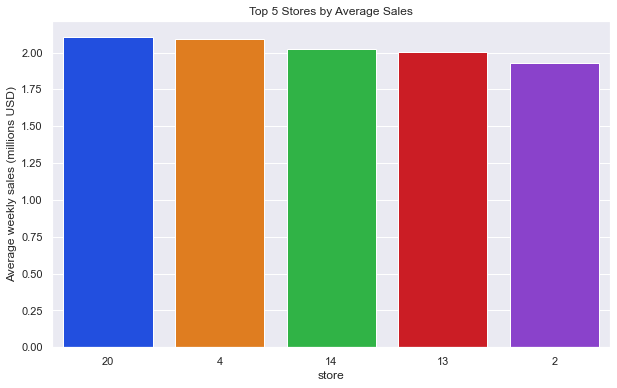

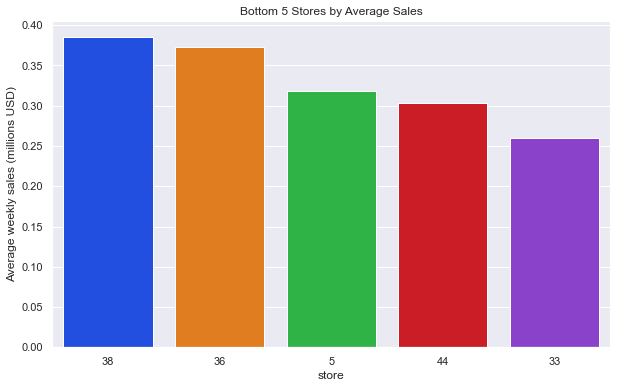

In [56]:
plot_top_and_bottom_stores(sales, 'store')

The graphs show that the top performing stores have relatively stable sales with an average of around $2 million USD. Store 20 appears to be the top performer among these stores, with relatively little variation in sales compared to the other top performers.

On the other hand, the lowest performing stores have higher variations in sales, with the highest sales at around $0.38 million USD. This suggests that there may be more variability in the sales performance of these stores.

**How does non-holiday weekly sales compared to holiday weekly sales?**

In [57]:
# filter out non-holiday and holiday weekly sales 
non_holiday_sales = sales[sales['holiday_flag'] == 0]
holiday_sales = sales[sales['holiday_flag'] == 1]


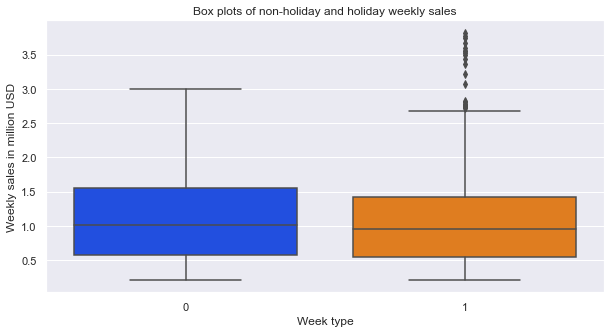

In [58]:
# plot box plots of non-holiday and holiday weekly sales 
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[holiday_sales['weekly_sales']/1e6, non_holiday_sales['weekly_sales']/1e6])
plt.ylabel('Weekly sales in million USD')
plt.xlabel('Week type')
plt.title('Box plots of non-holiday and holiday weekly sales')
plt.show()

We can see that both holiday and non-holiday weekly sales have similar spread. However, the bigger sales happen during the holiday weeks.


Of all the weaker correlations, employment is the strongest with 0.11 correlation coefficient.

<div id='time'></div>

# **Time Series Model for each store**

**check for stationarity**

-To check data stationary or not we have to do dickey-fuller test.
-check the p value from Dickey Fuller test
    -if p-value>0.05 it means data is non stationary
    -if p-value<0.05 it means data is stationary

In [59]:
print(store_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [60]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

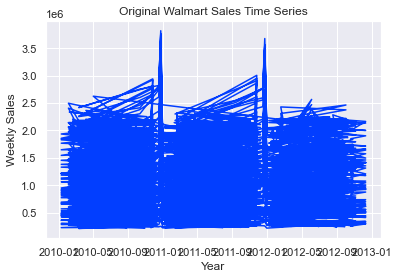

In [61]:
# Plot the original time series
plt.plot(sales['weekly_sales'])
plt.title('Original Walmart Sales Time Series')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()

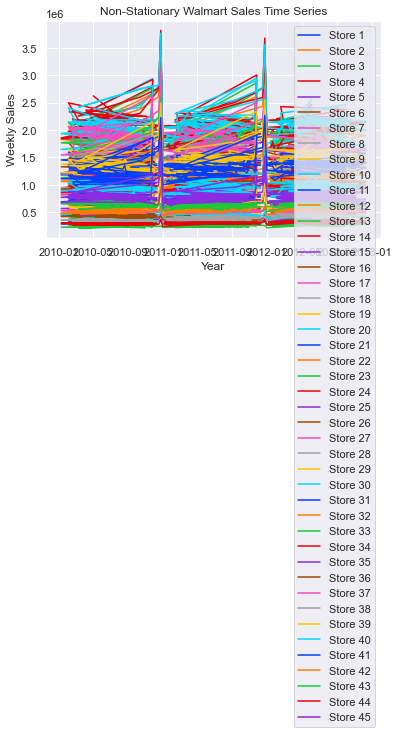

In [62]:
# Group the data by store and plot the non-stationary time series for each store
grouped = sales.groupby('store')
for store, data in grouped:
    plt.plot(data['weekly_sales'], label='Store {}'.format(store))
    
plt.title('Non-Stationary Walmart Sales Time Series')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

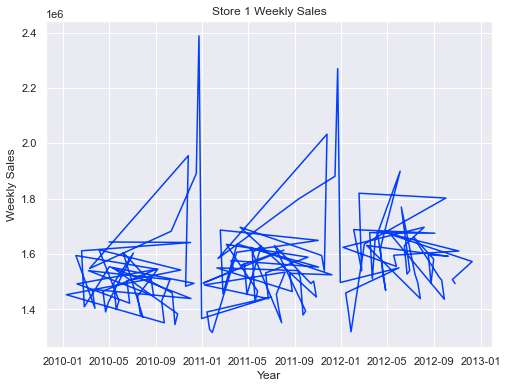

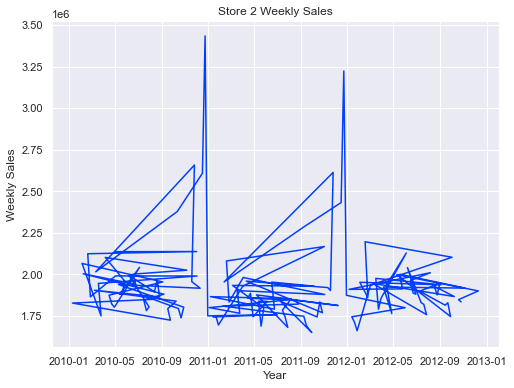

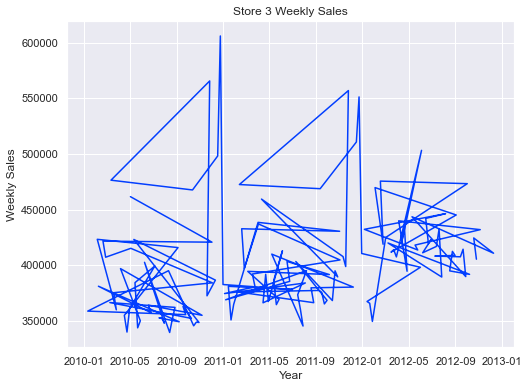

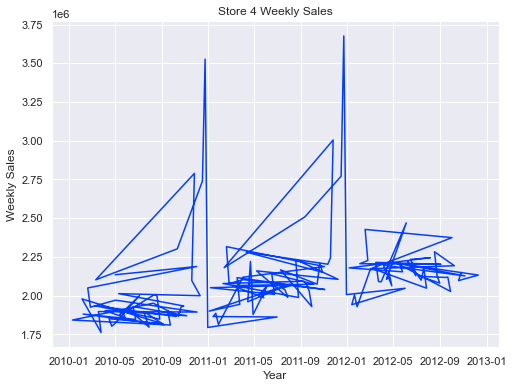

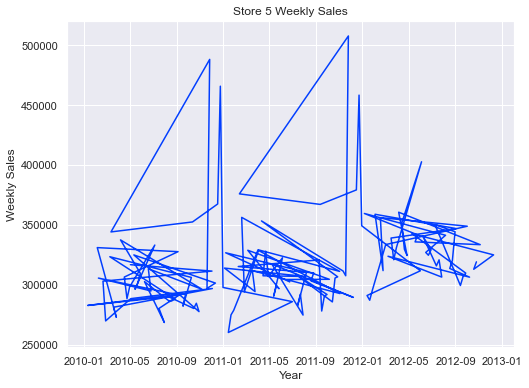

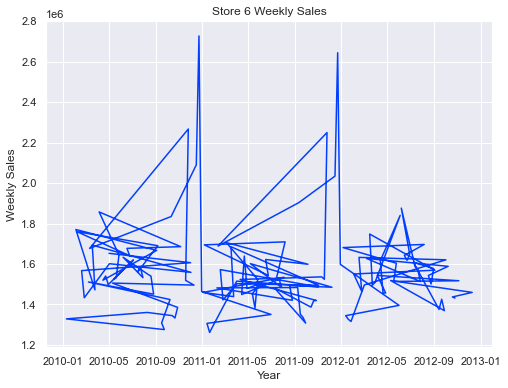

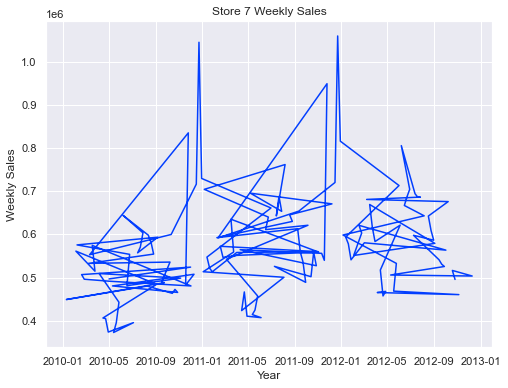

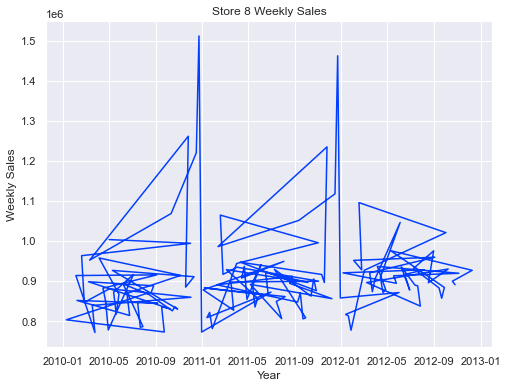

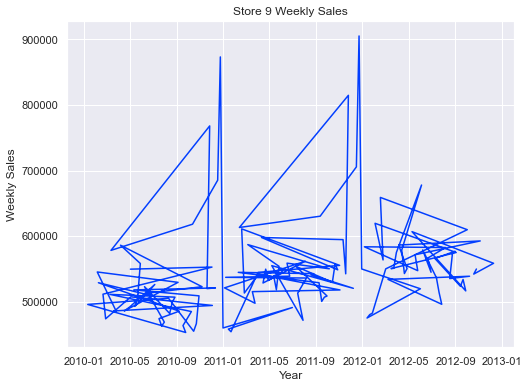

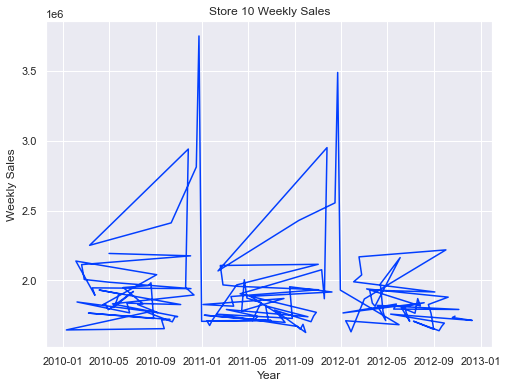

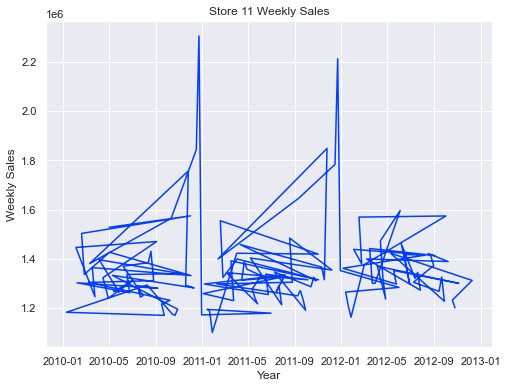

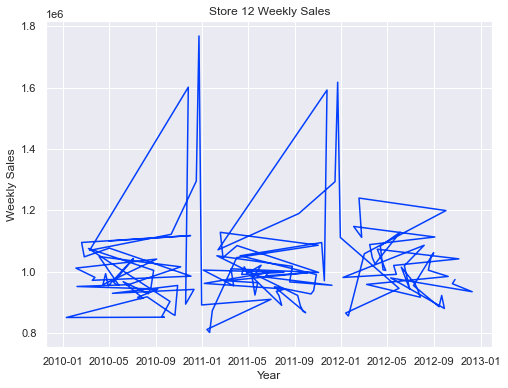

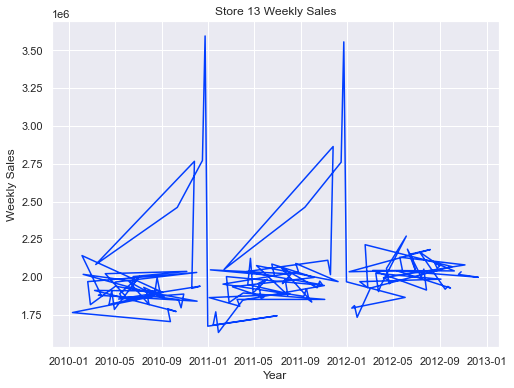

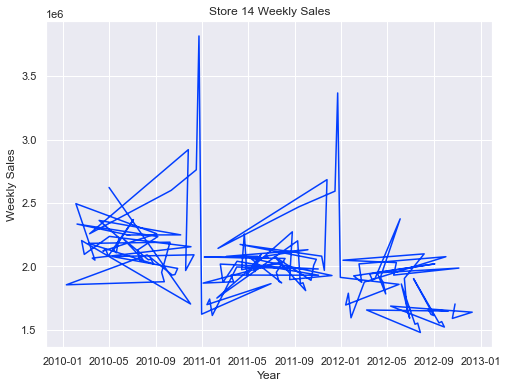

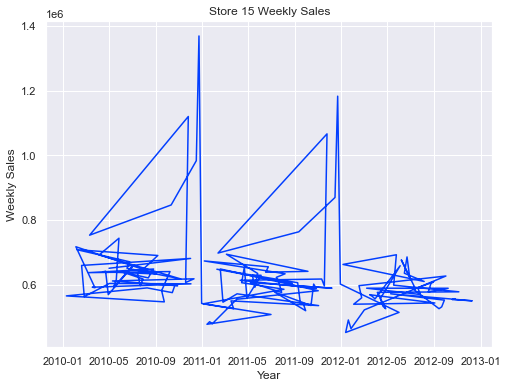

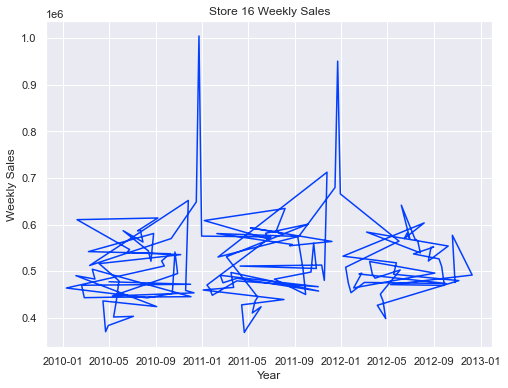

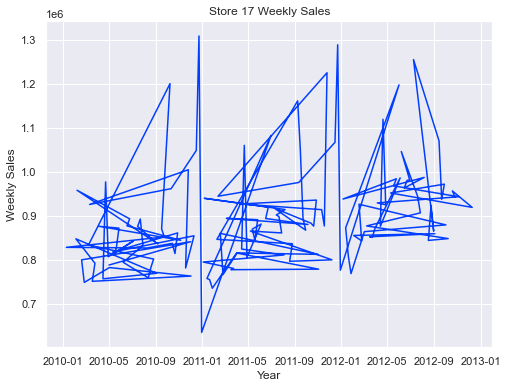

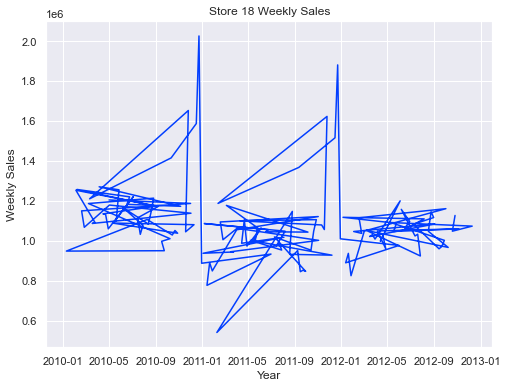

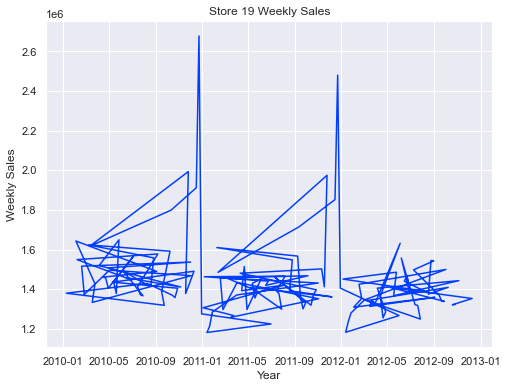

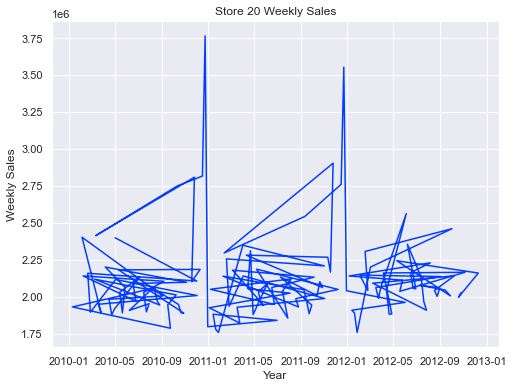

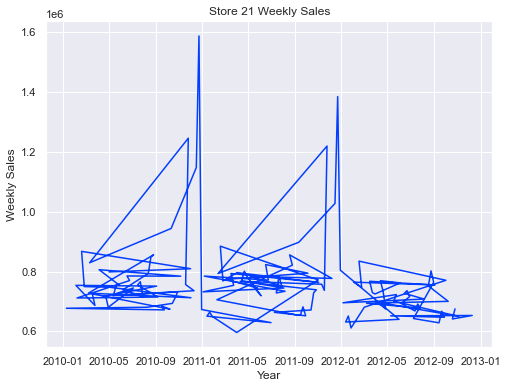

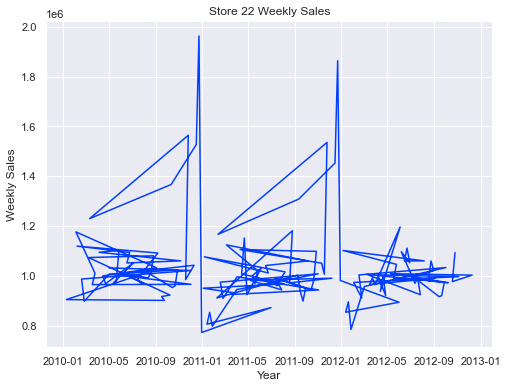

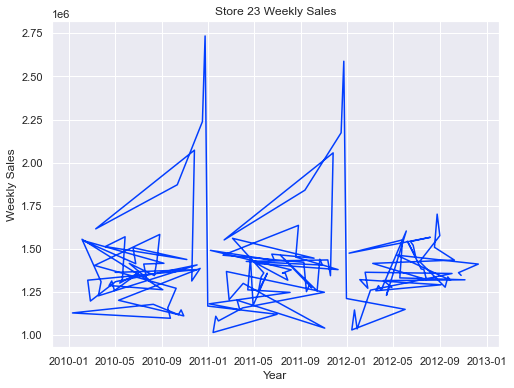

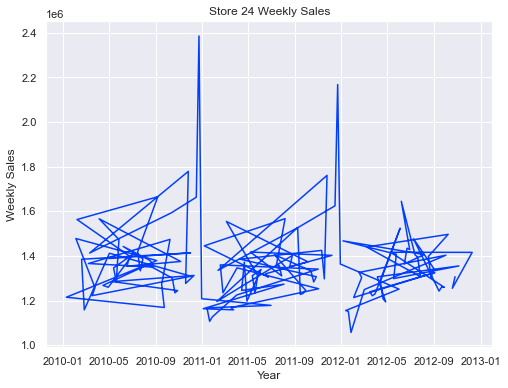

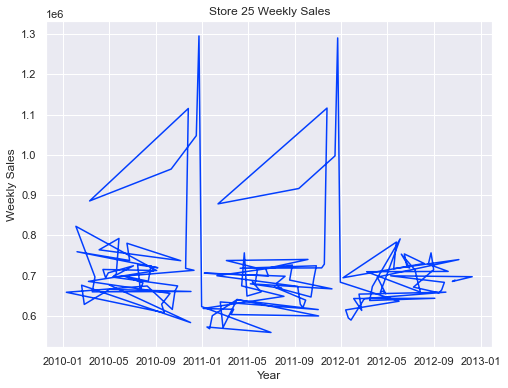

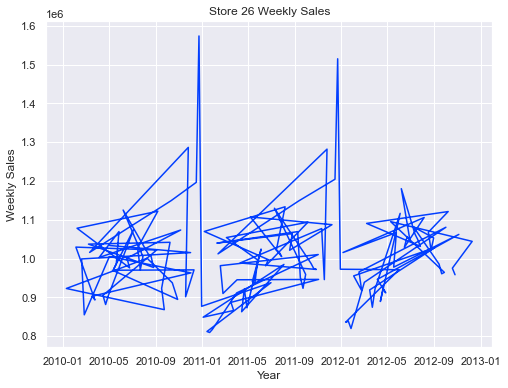

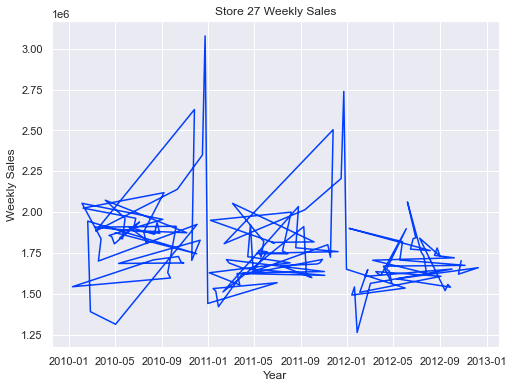

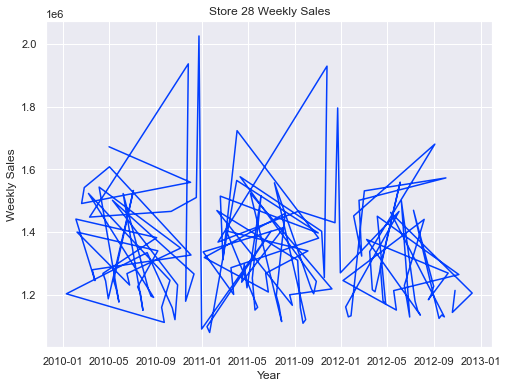

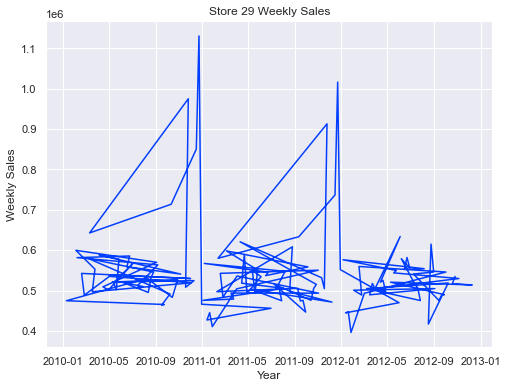

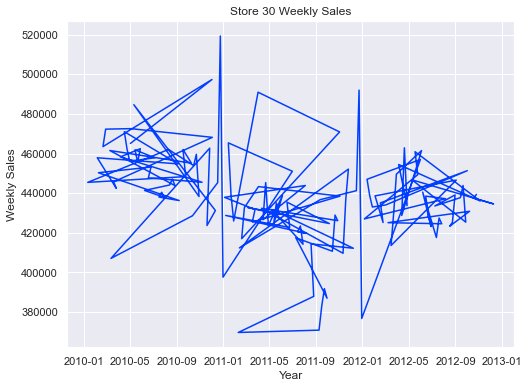

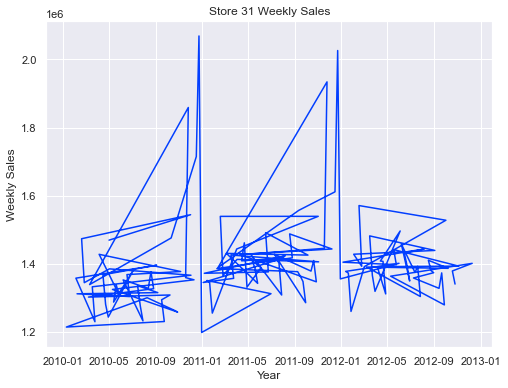

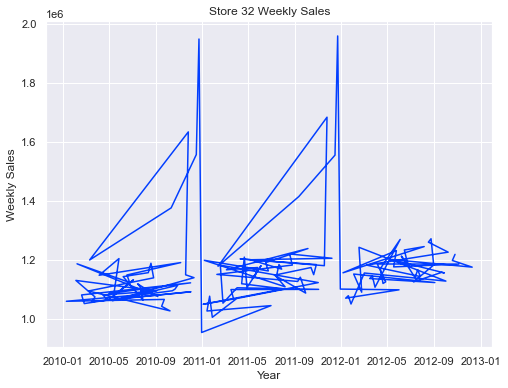

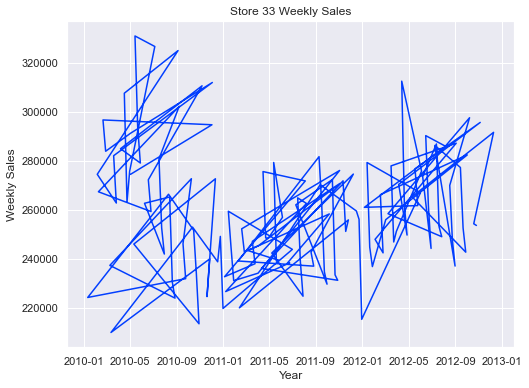

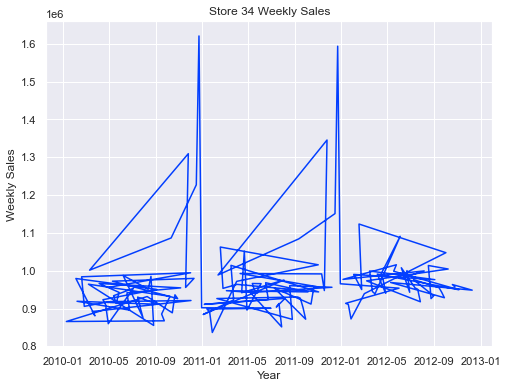

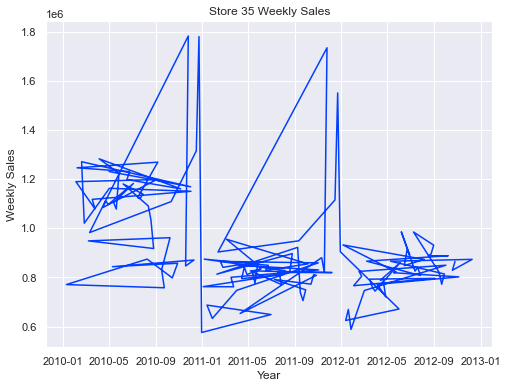

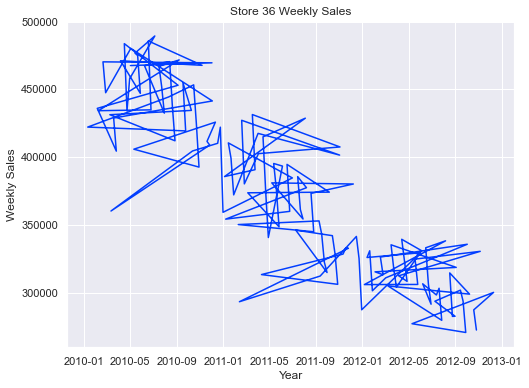

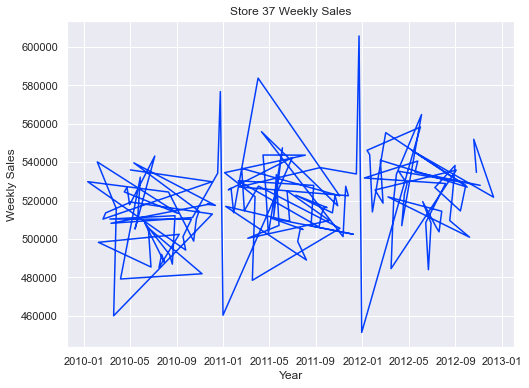

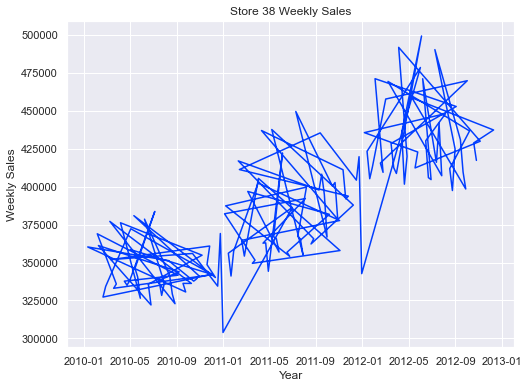

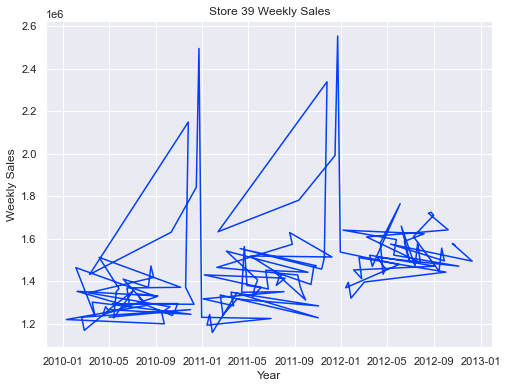

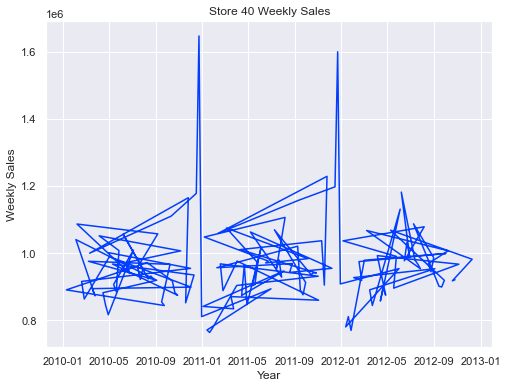

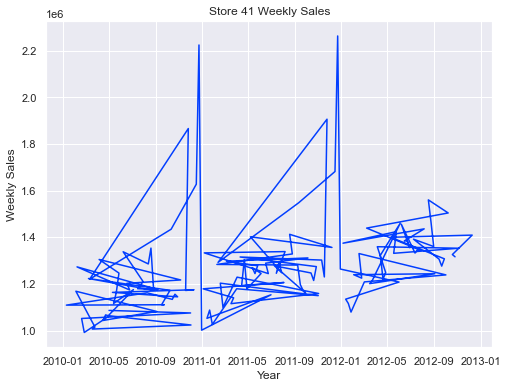

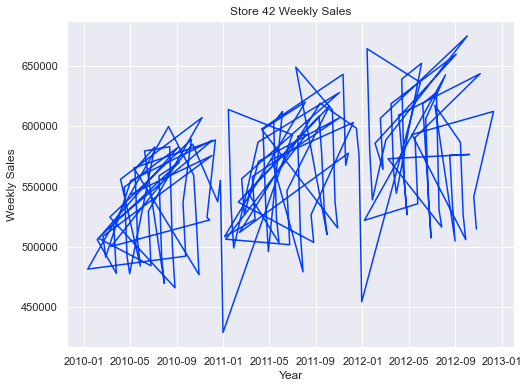

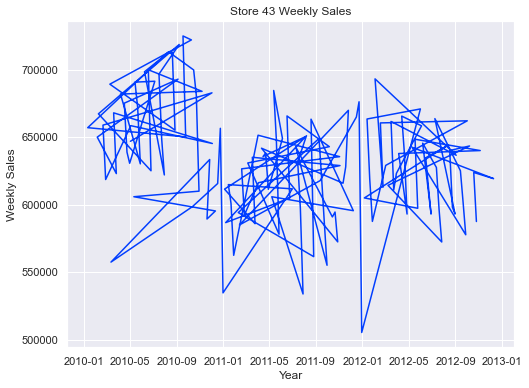

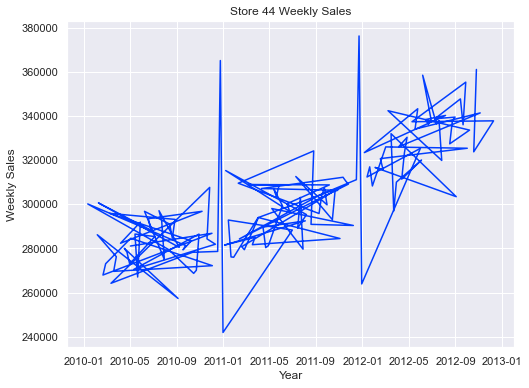

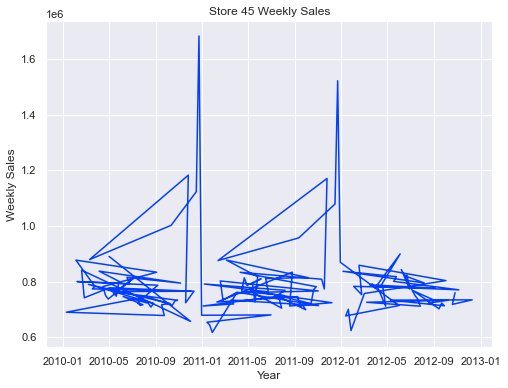

In [63]:
# Group the data by store and plot the non-stationary time series for each store
grouped = sales.groupby('store')
for store, data in grouped:
    # Create a new figure and axes for each store
    fig, axs = plt.subplots(figsize=(8, 6))
    axs.plot(data['weekly_sales'])
    axs.set_title('Store {} Weekly Sales'.format(store))
    axs.set_xlabel('Year')
    axs.set_ylabel('Weekly Sales')
    plt.show()


In [64]:
#check and isolate all stores with non-stationary TS

store_x, store_y = [], []
p_value_x, p_value_y = [], []
Test_stat_x, Test_stat_y = [], []

found_p_value = False

for i in store_list:
    store_df = get_store_df(sales, 'store', i)
    adft = adfuller(store_df['weekly_sales'], autolag = 'AIC')
    
    values = [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]
    p_value = adft[1]
    Test_stat = adft[0]
    
    if p_value > 0.05:
        found_p_value
        store_x.append(i)
        p_value_x.append(p_value)
        Test_stat_x.append(Test_stat)
    else:
        store_y.append(i)
        p_value_y.append(p_value)
        Test_stat_y.append(Test_stat)
    
    #if found_p_value:
    xstores = pd.DataFrame(zip(store_x, p_value_x, Test_stat_x), columns = ['store', 'p_value', 'Test Statistics'])
    ystores = pd.DataFrame(zip(store_y, p_value_y, Test_stat_y), columns = ['store', 'p_value', 'Test Statistics'])
    

In [65]:
print(f'\nNon stationary TS (stores): \n Dick Fuller Test Result for p_value greater than 0.05\n {xstores}')
print(f'\nNon stationary TS (stores): \n Dick Fuller Test Result for p_value less than 0.05\n {ystores}')


Non stationary TS (stores): 
 Dick Fuller Test Result for p_value greater than 0.05
    store   p_value  Test Statistics
0     14  0.067870        -2.736887
1     30  0.168364        -2.311254
2     36  0.973016         0.213632
3     38  0.916563        -0.360017
4     42  0.457285        -1.649531
5     43  0.106059        -2.539930
6     44  0.759162        -0.983703

Non stationary TS (stores): 
 Dick Fuller Test Result for p_value less than 0.05
     store       p_value  Test Statistics
0       1  1.387779e-05        -5.102186
1       2  3.990207e-03        -3.708863
2       3  3.840926e-02        -2.963868
3       4  4.779866e-02        -2.879382
4       5  4.251706e-04        -4.310974
5       6  2.159486e-06        -5.492502
6       7  2.170072e-04        -4.476254
7       8  1.002746e-06        -5.647653
8       9  2.134309e-05        -5.008564
9      10  8.763068e-06        -5.200703
10     11  3.316837e-03        -3.762354
11     12  1.045184e-06        -5.639346
12     13 

In [66]:
#As shown above, 7 store have non-stationary time series and 38 stores have stationary TS
st_TS = ystores['store'].tolist()
non_st_TS = xstores['store'].tolist()

print(f'{len(non_st_TS)} Stores: {non_st_TS} have their p_values greater than 0.05 --> non-stationary TS')

print()
#Stores with stationary TS:
print(f'{len(st_TS)} Stores: {st_TS}\n have stationary TS')
      

7 Stores: [14, 30, 36, 38, 42, 43, 44] have their p_values greater than 0.05 --> non-stationary TS

38 Stores: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 39, 40, 41, 45]
 have stationary TS


In [67]:
#select top ten stores from the list with stationary TS for analysis & general inference

highest_wkly_sales = sales.groupby('store')['weekly_sales'].sum().reset_index().sort_values('weekly_sales', ascending = False)

In [68]:
highest_wkly_sales.head(10)

store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08

In [69]:
#list of stores in ascending order of total weekly sales

stationary_stores = highest_wkly_sales['store'].tolist()
print(stationary_stores)

[20, 4, 14, 13, 2, 10, 27, 6, 1, 39, 19, 31, 23, 24, 11, 28, 41, 32, 18, 22, 12, 26, 34, 40, 35, 8, 17, 45, 21, 25, 43, 15, 7, 42, 9, 29, 16, 37, 30, 3, 38, 36, 5, 44, 33]


In [70]:
# Extract stationary list from store_list

xcount = 0
stationary_list = []

for i , store in enumerate(stationary_stores):
    if store in non_st_TS:
        continue
    elif xcount< len(stationary_stores):
        stationary_list.append(store)
        xcount += 1
print(f'The stationary stores: {stationary_list}')

The stationary stores: [20, 4, 13, 2, 10, 27, 6, 1, 39, 19, 31, 23, 24, 11, 28, 41, 32, 18, 22, 12, 26, 34, 40, 35, 8, 17, 45, 21, 25, 15, 7, 9, 29, 16, 37, 3, 5, 33]


In [71]:
highest_12, highest_10, highest_5, highest_6 = [],[],[],[]

highest_5 = stationary_list[0:5]
highest_6 = stationary_list[0:6]
highest_10 = stationary_list[0:10]
highest_12 = stationary_list[0:12]

print(f'\nHighest 5 stores: {highest_5} \nHighest 6 stores: {highest_6} \nHighest 10 stores: {highest_10}, \nHighest 12 stores: {highest_12}')


Highest 5 stores: [20, 4, 13, 2, 10] 
Highest 6 stores: [20, 4, 13, 2, 10, 27] 
Highest 10 stores: [20, 4, 13, 2, 10, 27, 6, 1, 39, 19], 
Highest 12 stores: [20, 4, 13, 2, 10, 27, 6, 1, 39, 19, 31, 23]


**Find Best ARIMA order for the selected stores**

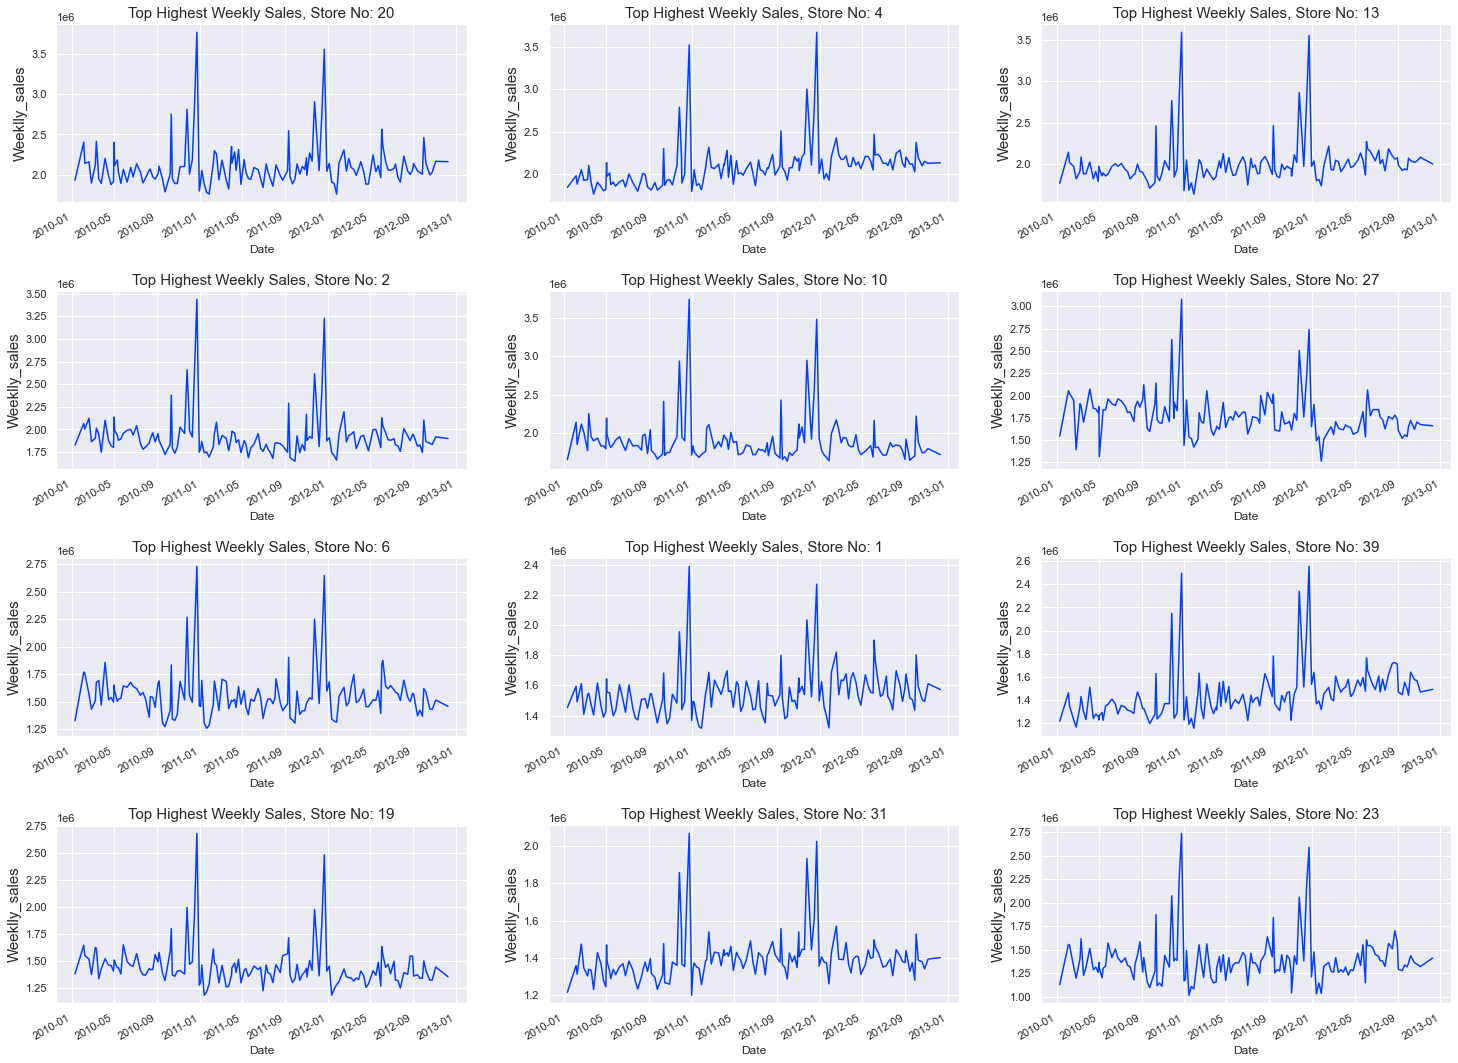

In [72]:
# series plot of the 15 stores with highest weekly_sales

fig, axes = plt.subplots(4,3, figsize = (25, 20))
plt.subplots_adjust(hspace = 0.5)

j = 1
for i in highest_12:
    store_df = get_store_df(sales, 'store', i)
    
    plt.subplot(4,3,j)
    store_df['weekly_sales'].plot()
    plt.title('Top Highest Weekly Sales, Store No: '+str(i), fontsize = 15)
    plt.ylabel('Weeklly_sales', fontsize = 15)
    j = j+1

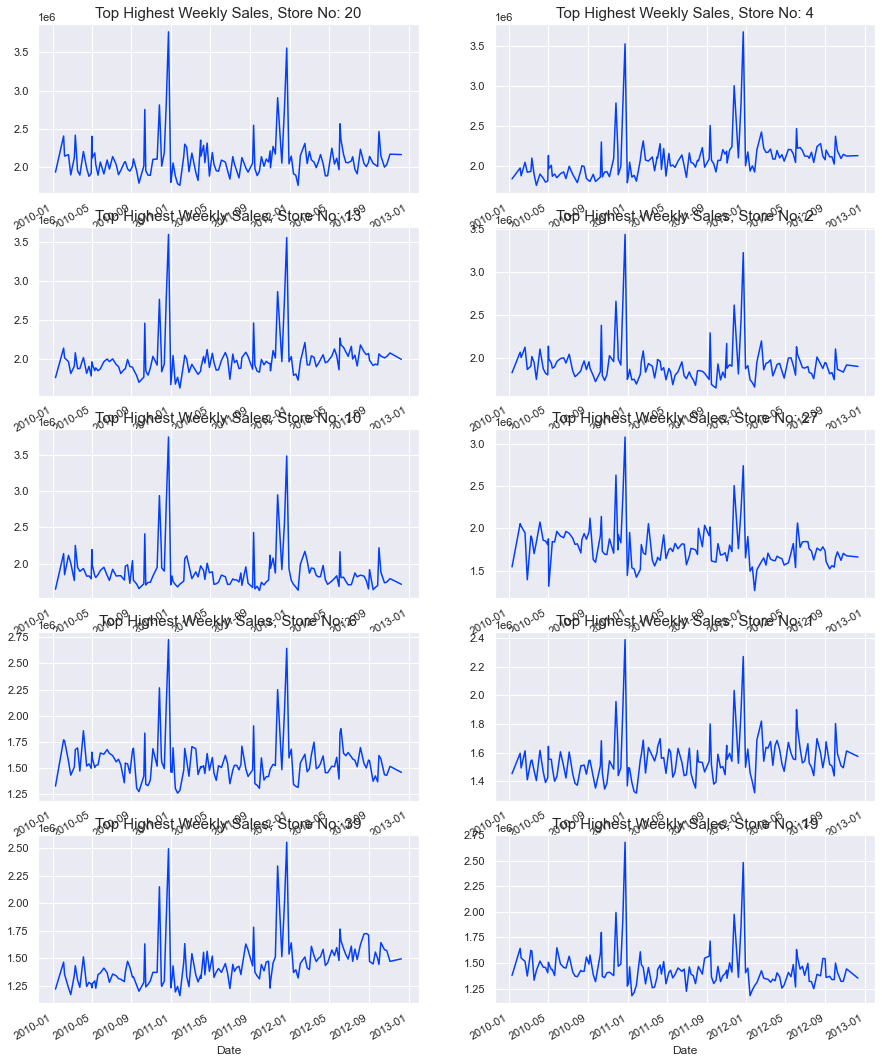

In [73]:
plt.figure(figsize=(15,20))
j = 1  # initialize subplot index
for i in highest_10:
    store_df = get_store_df(sales, 'store', i)
    plt.subplot(5, 2, j)
    store_df['weekly_sales'].plot()
    plt.title('Top Highest Weekly Sales, Store No: '+str(i), fontsize=15)
    j = j + 1  
plt.show()

**Find the best ARIMA order for the 10 highest performing stores**

In [74]:
for i in highest_10:
    print(f'Highest Weekly_Sales: Best order for ARIMA model for Store #{i}')
    store_df = get_store_df(sales, 'store', i)
    multiplemodels = auto_arima(store_df['weekly_sales'], trace = True)
    print('\n**********************************************************************')
    

Highest Weekly_Sales: Best order for ARIMA model for Store #20
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3974.854, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3991.763, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3971.424, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3977.707, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4574.703, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3972.263, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3972.813, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3974.255, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.428 seconds

**********************************************************************
Highest Weekly_Sales: Best order for ARIMA model for Store #4
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3941.121,

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3807.686, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3808.792, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3817.717, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=3809.251, Time=0.85 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=3809.475, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3818.746, Time=0.48 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3809.305, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3815.496, Time=0.44 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=3810.246, Time=1.71 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 16.398 seconds

**********************************************************************
Highest Weekly_Sales: Best order for ARIMA model for Store #39
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3866.446, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3898.647, Time=0.06 sec
 ARIMA(1,1,0)(0,0,

In [75]:
highest_10

[20, 4, 13, 2, 10, 27, 6, 1, 39, 19]

**Predictions**

In [76]:
def get_predictions(actual, predicted):
    predict_dbf = pd.DataFrame(zip(actual, predicted), columns = ['Actual', 'Predicted'])
    predict_dbf['Error(%)'] = abs(predict_dbf.Actual-predict_dbf.Predicted)*100/predict_dbf.Actual
    predict_dbf = predict_dbf.sort_values(by = ['Error(%)']).reset_index()
    
    del predict_dbf['index']
    
    print('\n-------------------Predicted Results-------------------------')
    print(predict_dbf.head(), '\n__________________________________________________')
    median = predict_dbf['Error(%)'].median()
    mean = predict_dbf['Error(%)'].mean()
    print(f'Median error: {round(median, 2)}%')
    print(f'Mean error: {round(mean, 2)}%')
    return(predict_dbf)

In [77]:
#ARIMA predictions

ARIMA_order = [[2,1,3], [1,0,0], [2,0,0],[5,1,1]]
predictions = list()
Arima_X_train, Arima_X_test = [], []
test_index_list = []
train_index_list = []

for i in highest_10:
    store_df = get_store_df(sales, 'store', i)
    # size for train, test split the data @ 80: 20
    size = int(store_df.shape[0] * 0.80) 
    train, test = store_df.iloc[:size, :], store_df.iloc[size:, :]
    
    Arima_X_train.append(train)
    Arima_X_test.append(test)
    train_index = train.index
    test_index = test.index
    Arimna_test_index = test.index
    Arima_train_index = train.index
    
    start_1 = train.shape[0]
    end_1 = (train.shape[0] + test.shape[0]) - 1
    actual_1 = test['weekly_sales']
    predict_index = actual_1.index
    actual_2 = actual_1.tolist()
    
    if i==1 or i == 4:
        arima = ARIMA_order[0]
    elif i ==2 or i ==13 or i == 20:
        arima = ARIMA_order[1]
    elif i ==10 or i ==27:
        arima = ARIMA_order[2]
    elif i == 39:
        arima = ARIMA_order[3]
        
    print(f'\nResult for Store #{i}\n Best ARIMA Order: {arima}')
    model = ARIMA(train['weekly_sales'], order = arima)
    model_fit = model.fit()
    print(model_fit.summary())
    
    predicted_1 = model_fit.predict(start = start_1, end = end_1)
    predicted_2 = pd.DataFrame()
    predicted_2['weekly_sales'] = predicted_1
    predicted_2.index = predict_index
    
    test_index_list.append(test.index)
    train_index_list.append(train.index)
    #store the prediction in the list
    predictions.append(get_predictions(actual_2, predicted_1.tolist()))
#store the prediction for later use
Arima_predict = predictions


Result for Store #20
 Best ARIMA Order: [1, 0, 0]
                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1591.241
Date:                Mon, 03 Apr 2023   AIC                           3188.483
Time:                        10:47:15   BIC                           3196.692
Sample:                             0   HQIC                          3191.814
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.115e+06   5.73e+04     36.909      0.000       2e+06    2.23e+06
ar.L1          0.3927      0.046      8.558      0.000       0.303       0.483
s

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1572.056
Date:                Mon, 03 Apr 2023   AIC                           3156.112
Time:                        10:47:16   BIC                           3172.476
Sample:                             0   HQIC                          3162.752
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7881      0.188     -4.184      0.000      -1.157      -0.419
ar.L2         -0.3304      0.199     -1.659      0.097      -0.721       0.060
ma.L1          0.3340      0.174      1.914      0.0

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\li

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1574.741
Date:                Mon, 03 Apr 2023   AIC                           3155.481
Time:                        10:47:16   BIC                           3163.690
Sample:                             0   HQIC                          3158.812
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.935e+06   5.09e+04     38.007      0.000    1.83e+06    2.03e+06
ar.L1          0.3871      0.047      8.290      0.000       0.296       0.479
sigma2      5.844e+10      0.477   1.22e+11      0.0

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\li

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1573.994
Date:                Mon, 03 Apr 2023   AIC                           3155.987
Time:                        10:47:16   BIC                           3166.932
Sample:                             0   HQIC                          3160.429
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.791e+06   5.01e+04     35.770      0.000    1.69e+06    1.89e+06
ar.L1          0.2891      0.057      5.052      0.000       0.177       0.401
ar.L2          0.1587      0.090      1.766      0.0

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\li

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1556.748
Date:                Mon, 03 Apr 2023   AIC                           3121.496
Time:                        10:47:16   BIC                           3132.440
Sample:                             0   HQIC                          3125.937
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.568e+06   4.89e+04     32.050      0.000    1.47e+06    1.66e+06
ar.L1          0.4056      0.061      6.703      0.000       0.287       0.524
ar.L2          0.0854      0.087      0.980      0.3

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\li

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1519.892
Date:                Mon, 03 Apr 2023   AIC                           3051.783
Time:                        10:47:17   BIC                           3068.147
Sample:                             0   HQIC                          3058.424
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7400      0.163     -4.539      0.000      -1.060      -0.421
ar.L2         -0.2902      0.159     -1.829      0.067      -0.601       0.021
ma.L1          0.3069      0.158      1.946      0.0

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\li

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1537.331
Date:                Mon, 03 Apr 2023   AIC                           3088.662
Time:                        10:47:18   BIC                           3107.754
Sample:                             0   HQIC                          3096.409
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4915      0.114      4.293      0.000       0.267       0.716
ar.L2          0.0580      0.086      0.676      0.499      -0.110       0.226
ar.L3          0.0031      0.085      0.037      0.9

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\li

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  114
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1540.845
Date:                Mon, 03 Apr 2023   AIC                           3095.691
Time:                        10:47:19   BIC                           3114.782
Sample:                             0   HQIC                          3103.438
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4946      0.063      7.806      0.000       0.370       0.619
ar.L2          0.0291      0.086      0.338      0.735      -0.139       0.198
ar.L3         -0.0840      0.108     -0.776      0.4

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
Arima_X_test[0].head(5)

store  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                     
2012-04-13     20    2045396.06             0        45.68       4.044   
2012-04-20     20    1884427.84             0        60.11       4.027   
2012-04-27     20    1886503.93             0        47.64       4.004   
2012-04-05     20    2163510.89             0        62.74       3.951   
2012-11-05     20    2168097.11             0        63.19       3.889   

                   cpi  unemployment  
Date                                  
2012-04-13  214.312703         7.139  
2012-04-20  214.367504         7.139  
2012-04-27  214.422306         7.139  
2012-04-05  214.477108         7.139  
2012-11-05  214.531910         7.139

**Plot Predictions**

In [79]:
def plot_predictions(predictions, name, store_no):
    
    fig, axes = plt.subplots(figsize = (20, 6))
    sns.lineplot(x = predictions.index, y = predictions['Actual'], color= 'red', legend = True)
    sns.lineplot(x=predictions.index, y = predictions['Predicted'], color = 'blue', legend = True)
    plt.title(f'Store No: {store_no} ---- {name} Predictions', fontsize = 25)
    plt.xlabel('Data ', fontsize = 15)
    plt.ylabel('Weekly Sales', fontsize = 15)
    plt.legend(['Actual', 'Predicted'], loc = 'best')
    plt.grid(True)
    plt.show()

In [80]:
def plot_ts_results(predict_df, df_index, model, l=5, w=2, wl=20, ww=10, hs=1.5):
    fig, axes = plt.subplots(l, w, figsize=(wl, ww))
    plt.subplots_adjust(hspace=hs)

    for i in range(len(predict_df)):
        store_df = predict_df[i]

        plt.subplot(l, w, i+1)
        sns.lineplot(x=store_df.index, y=store_df['Actual'])
        sns.lineplot(x=store_df.index, y=store_df['Predicted'])

        plt.title(f'{model}: Prediction Plot for Store {highest_10[i]}', fontsize=25)
        plt.xlabel('Dates ', fontsize=15)
        plt.ylabel('Predicted Weekly Sales', fontsize=15)
        plt.legend(['Actual', 'Predicted'], loc='best')
        plt.grid(True)

    plt.show()




In [81]:
#Recall list of DataFrame predictions for top 5 sales store
len(predictions)

10

In [82]:
test_index_list[0]

DatetimeIndex(['2012-04-13', '2012-04-20', '2012-04-27', '2012-04-05',
               '2012-11-05', '2012-05-18', '2012-05-25', '2012-01-06',
               '2012-08-06', '2012-06-15', '2012-06-22', '2012-06-29',
               '2012-06-07', '2012-07-13', '2012-07-20', '2012-07-27',
               '2012-03-08', '2012-10-08', '2012-08-17', '2012-08-24',
               '2012-08-31', '2012-07-09', '2012-09-14', '2012-09-21',
               '2012-09-28', '2012-05-10', '2012-12-10', '2012-10-19',
               '2012-10-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [83]:
# '''Predictions = []
# for i in range(len(predictions)):
#     Predictions[i].index = test_index_list[i]
#     Predictions.append(predictions[i][['Actual', 'Predicted', 'Error(%)']])
#  '''   
Predictions = []
for i in range(len(predictions)):
    pred = predictions[i][['Actual', 'Predicted', 'Error(%)']]
    pred.index = test_index_list[i]
    Predictions.append(pred)


In [84]:
Predictions[0].head(10)

Actual     Predicted  Error(%)
Date                                          
2012-04-13  2114989.00  2.115621e+06  0.029899
2012-04-20  2134680.12  2.114974e+06  0.923133
2012-04-27  2094515.71  2.114973e+06  0.976722
2012-04-05  2143126.59  2.115228e+06  1.301783
2012-11-05  2144245.39  2.114973e+06  1.365148
2012-05-18  2080529.06  2.114973e+06  1.655550
2012-05-25  2163510.89  2.125678e+06  1.748681
2012-01-06  2162951.36  2.114973e+06  2.218178
2012-08-06  2168097.11  2.119177e+06  2.256379
2012-06-15  2165160.29  2.115012e+06  2.316124

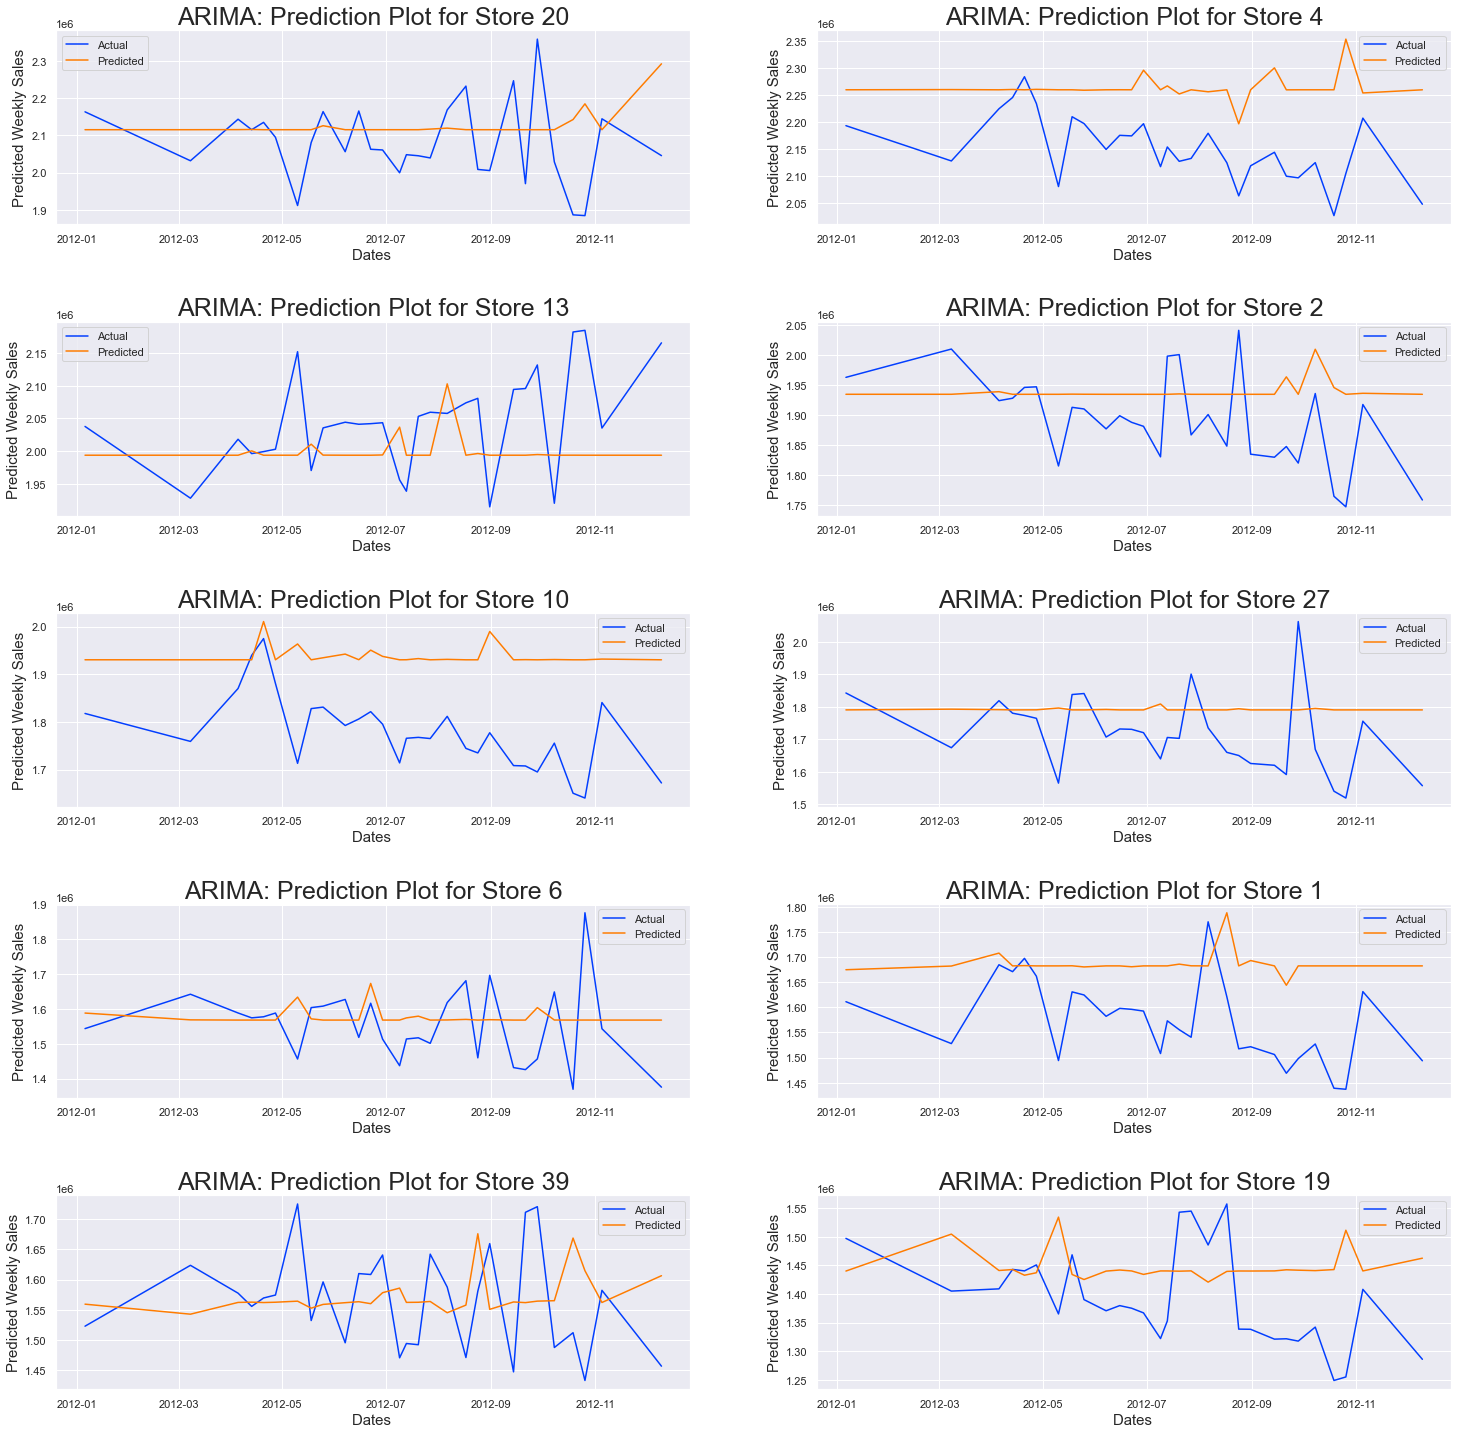

In [85]:
plot_ts_results(Predictions, test_index, 'ARIMA', 5,2,25,25,0.5)

In [86]:
#Extract the predictions for the top 5 stores
store_2_pred = Predictions[0][['Actual', 'Predicted', 'Error(%)']]
store_4_pred = Predictions[1][['Actual', 'Predicted', 'Error(%)']]
store_10_pred = Predictions[2][['Actual', 'Predicted', 'Error(%)']]
store_13_pred = Predictions[3][['Actual', 'Predicted', 'Error(%)']]
store_20_pred = Predictions[4][['Actual', 'Predicted', 'Error(%)']]

In [87]:
store_2_pred.head()

Actual     Predicted  Error(%)
Date                                          
2012-04-13  2114989.00  2.115621e+06  0.029899
2012-04-20  2134680.12  2.114974e+06  0.923133
2012-04-27  2094515.71  2.114973e+06  0.976722
2012-04-05  2143126.59  2.115228e+06  1.301783
2012-11-05  2144245.39  2.114973e+06  1.365148

In [88]:
store_4_pred.head()

Actual     Predicted  Error(%)
Date                                          
2012-04-13  2245257.18  2.260041e+06  0.658430
2012-04-20  2283540.30  2.259473e+06  1.053958
2012-04-27  2234190.93  2.260266e+06  1.167098
2012-04-05  2224499.28  2.259453e+06  1.571317
2012-11-05  2207214.81  2.253644e+06  2.103536

In [89]:
store_10_pred.head()

Actual     Predicted  Error(%)
Date                                          
2012-04-13  1995994.51  2.000205e+06  0.210972
2012-04-20  1999079.44  1.993550e+06  0.276619
2012-04-27  2002750.99  1.993550e+06  0.459408
2012-04-05  2018010.15  1.993550e+06  1.212112
2012-11-05  2035189.66  1.993550e+06  2.046004

In [90]:
store_13_pred.head()

Actual     Predicted  Error(%)
Date                                          
2012-04-13  1928016.01  1.934588e+06  0.340855
2012-04-20  1946104.64  1.934588e+06  0.591792
2012-04-27  1947083.30  1.934588e+06  0.641758
2012-04-05  1923957.09  1.938955e+06  0.779557
2012-11-05  1917520.99  1.936279e+06  0.978223

In [91]:
store_20_pred.head()

Actual     Predicted  Error(%)
Date                                          
2012-04-13  1939440.09  1.930212e+06  0.475790
2012-04-20  1974687.51  2.010422e+06  1.809644
2012-04-27  1880436.94  1.930203e+06  2.646492
2012-04-05  1869967.03  1.930257e+06  3.224104
2012-11-05  1840491.41  1.931711e+06  4.956280

**12-Weeks Forecast**

In [92]:
#Extract last date for store 2

begin_date = str(store_2_pred.tail(1).index)
begin_date

"DatetimeIndex(['2012-10-26'], dtype='datetime64[ns]', name='Date', freq=None)"

In [93]:
from datetime import datetime
from datetime import timedelta

begin_date = '2012-10-26'
Bg_date = datetime.strptime(begin_date, '%Y-%m-%d')
end_date = Bg_date + timedelta(days=84)

print(f'Begin_date: {begin_date}, \nEnd_date: {end_date}')

Begin_date: 2012-10-26, 
End_date: 2013-01-18 00:00:00


In [94]:
sales[sales['store'] == 1].index[-1]

Timestamp('2012-10-26 00:00:00')

In [95]:
#Generate date range from last date(store_1) for 12 weeks:

from datetime import datetime, timedelta
start_date = sales[sales['store'] == 1].index[-1] + timedelta(weeks = 5)
end_date = start_date + timedelta(weeks = 12)

Index = pd.date_range(start = start_date, end = end_date, freq = 'w')

print(Index)


DatetimeIndex(['2012-12-02', '2012-12-09', '2012-12-16', '2012-12-23',
               '2012-12-30', '2013-01-06', '2013-01-13', '2013-01-20',
               '2013-01-27', '2013-02-03', '2013-02-10', '2013-02-17'],
              dtype='datetime64[ns]', freq='W-SUN')


In [96]:
# set Index for Prediction

no_of_wks = len(Index)
print(f'Number of weeks = {no_of_wks}  |   {round(no_of_wks/52, 2)} -yeasrs')


Number of weeks = 12  |   0.23 -yeasrs


In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults



In [98]:
#Helper function
def remove_outliers(dbf):
    dataset = sorted(dbf.weekly_sales)
    q1, q3 = np.percentile(dataset, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    return(dbf[dbf.weekly_sales < upper_fence])

In [99]:
#Forecast without detrending
#SERIMA Forecast without detrending

j = 1
ARIMA_order = [[2.,1,3],[1,0,0],[2,0,0],[5,1,1]]
season_order = [[2,1,3,7],[1,0,0,7],[2,0,0,7],[5,1,1,7]]
Forecast_1 = pd.DataFrame()
forecast_1 = list()
current_df, predicted_list = [],[]
train_index_list, test_index_list = [],[]
predictions, forecast_list = [],[]

for i in highest_10:
    store_df = get_store_df(sales, 'store', i)
    store_index = store_df.index
    store_df = pd.DataFrame(store_df['weekly_sales'], columns=['weekly_sales'], index=store_index)
    #remove outliers
    store_df = remove_outliers(store_df)
    
    size = int(store_df.shape[0]*0.75) #size for train, test split the data @75:25
    train, test = store_df.iloc[:size, :], store_df.iloc[size:,:]
    
    start_1 = train.shape[0]
    end_1 = (train.shape[0] + test.shape[0])-1
    
    train_index = train.index
    test_index = test.index
    
    if i==1 or i == 4:
        arima_order = ARIMA_order[0]
        Season_order = season_order[0]
        
    elif i ==2 or i ==13 or i == 20:
        arima_order = ARIMA_order[1]
        Season_order = season_order[1]
    elif i ==10 or i ==27:
        arima_order = ARIMA_order[2]
        Season_order = season_order[2]
    elif i == 39:
        arima_order = ARIMA_order[3]
        Season_order = season_order[3]
        
    model = SARIMAX(train, order = arima_order, seasonal_order = Season_order, initialization='approximate_diffuse')
    #model fit
    model = model.fit()
    
    forecast = model.forecast(steps = no_of_wks).tolist() # 12-weeks forecast
    forecast_1.append(forecast)
    forecast_list.append(forecast)
    
    #Forecast
    
    forecast = pd.DataFrame(forecast, columns = ['weekly_sales'], index = Index)
    current_df.append(train)
    train_index_list.append(train.index)
    test_index_list.append(test.index)
    
    #Predictions
    predicted_ = model.predict(start = start_1, end = end_1, dynamic = True)
    predicted_list.append(predicted_)
    
    print()
    print(f'Weekly Sales Predictions for store{i}')
    predictions.append(get_predictions(test.values.flatten(), predicted_))#store the predictions in a list

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-


Weekly Sales Predictions for store20

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1992436.96  2.020578e+06  1.412373
1  2064991.71  2.022683e+06  2.048877
2  1886503.93  1.958391e+06  3.810599
3  2045396.06  1.961838e+06  4.085183
4  1911559.10  1.832827e+06  4.118738 
__________________________________________________
Median error: 10.73%
Mean error: 10.5%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\


Weekly Sales Predictions for store4

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  2245257.18  2.247268e+06  0.089542
1  2214967.44  2.224247e+06  0.418948
2  2202450.81  2.230372e+06  1.267720
3  2206319.90  2.164232e+06  1.907615
4  2234190.93  2.287337e+06  2.378761 
__________________________________________________
Median error: 8.44%
Mean error: 8.54%

Weekly Sales Predictions for store13

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  2271614.76  2.271490e+06  0.005512
1  2037663.71  2.030724e+06  0.340589
2  1970121.65  1.980965e+06  0.550403
3  2131900.55  2.151976e+06  0.941658
4  1938379.66  1.963726e+06  1.307606 
__________________________________________________
Median error: 3.91%
Mean error: 5.22%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-


Weekly Sales Predictions for store2

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1829415.67  1.823354e+06  0.331335
1  1881046.12  1.871577e+06  0.503405
2  1887733.21  1.875635e+06  0.640862
3  1814806.63  1.827319e+06  0.689464
4  1937628.26  1.951467e+06  0.714216 
__________________________________________________
Median error: 2.84%
Mean error: 3.56%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\


Weekly Sales Predictions for store10

-------------------Predicted Results-------------------------
       Actual     Predicted   Error(%)
0  1917483.10  2.038811e+06   6.327472
1  2163384.17  2.304117e+06   6.505194
2  1974687.51  2.118396e+06   7.277553
3  1930814.66  2.097468e+06   8.631258
4  1837457.69  2.119809e+06  15.366400 
__________________________________________________
Median error: 34.13%
Mean error: 37.69%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\


Weekly Sales Predictions for store27

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1731935.43  1.734186e+06  0.129946
1  1639999.47  1.632207e+06  0.475156
2  1705810.84  1.716805e+06  0.644540
3  1650405.21  1.639194e+06  0.679320
4  1730913.66  1.701061e+06  1.724663 
__________________________________________________
Median error: 6.11%
Mean error: 7.37%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\


Weekly Sales Predictions for store6

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1569304.40  1.574498e+06  0.330936
1  1681121.38  1.670144e+06  0.652962
2  1696619.52  1.719971e+06  1.376358
3  1616394.45  1.581179e+06  2.178649
4  1543461.12  1.596939e+06  3.464782 
__________________________________________________
Median error: 13.75%
Mean error: 17.99%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\


Weekly Sales Predictions for store1

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1769854.16  1.767672e+06  0.123297
1  1670785.97  1.677246e+06  0.386626
2  1630607.00  1.671606e+06  2.514368
3  1697230.96  1.643425e+06  3.170225
4  1597868.05  1.654470e+06  3.542328 
__________________________________________________
Median error: 10.88%
Mean error: 11.45%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\


Weekly Sales Predictions for store39

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1499727.02  1.467144e+06  2.172591
1  1470792.41  1.429067e+06  2.836952
2  1469593.37  1.419522e+06  3.407166
3  1522978.54  1.449523e+06  4.823180
4  1471261.76  1.375524e+06  6.507177 
__________________________________________________
Median error: 14.86%
Mean error: 13.64%

Weekly Sales Predictions for store19

-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1321741.35  1.317993e+06  0.283560
1  1352809.50  1.345745e+06  0.522176
2  1285897.24  1.298443e+06  0.975678
3  1248915.43  1.222576e+06  2.108990
4  1366937.10  1.396207e+06  2.141256 
__________________________________________________
Median error: 8.63%
Mean error: 8.01%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [100]:
Predictions = []
for i in range(len(predictions)):
    pred = predictions[i][['Actual', 'Predicted', 'Error(%)']]
    pred.index = test_index_list[i]
    Predictions.append(pred)

In [101]:
Predictions[0].head(10)

Actual     Predicted  Error(%)
Date                                          
2012-02-03  1992436.96  2.020578e+06  1.412373
2012-09-03  2064991.71  2.022683e+06  2.048877
2012-03-16  1886503.93  1.958391e+06  3.810599
2012-03-23  2045396.06  1.961838e+06  4.085183
2012-03-30  1911559.10  1.832827e+06  4.118738
2012-04-13  1884427.84  1.968759e+06  4.475152
2012-04-20  2074721.74  1.979823e+06  4.574067
2012-04-27  2139265.40  2.032462e+06  4.992529
2012-04-05  2148822.76  2.039976e+06  5.065431
2012-11-05  2039222.26  1.927739e+06  5.466972

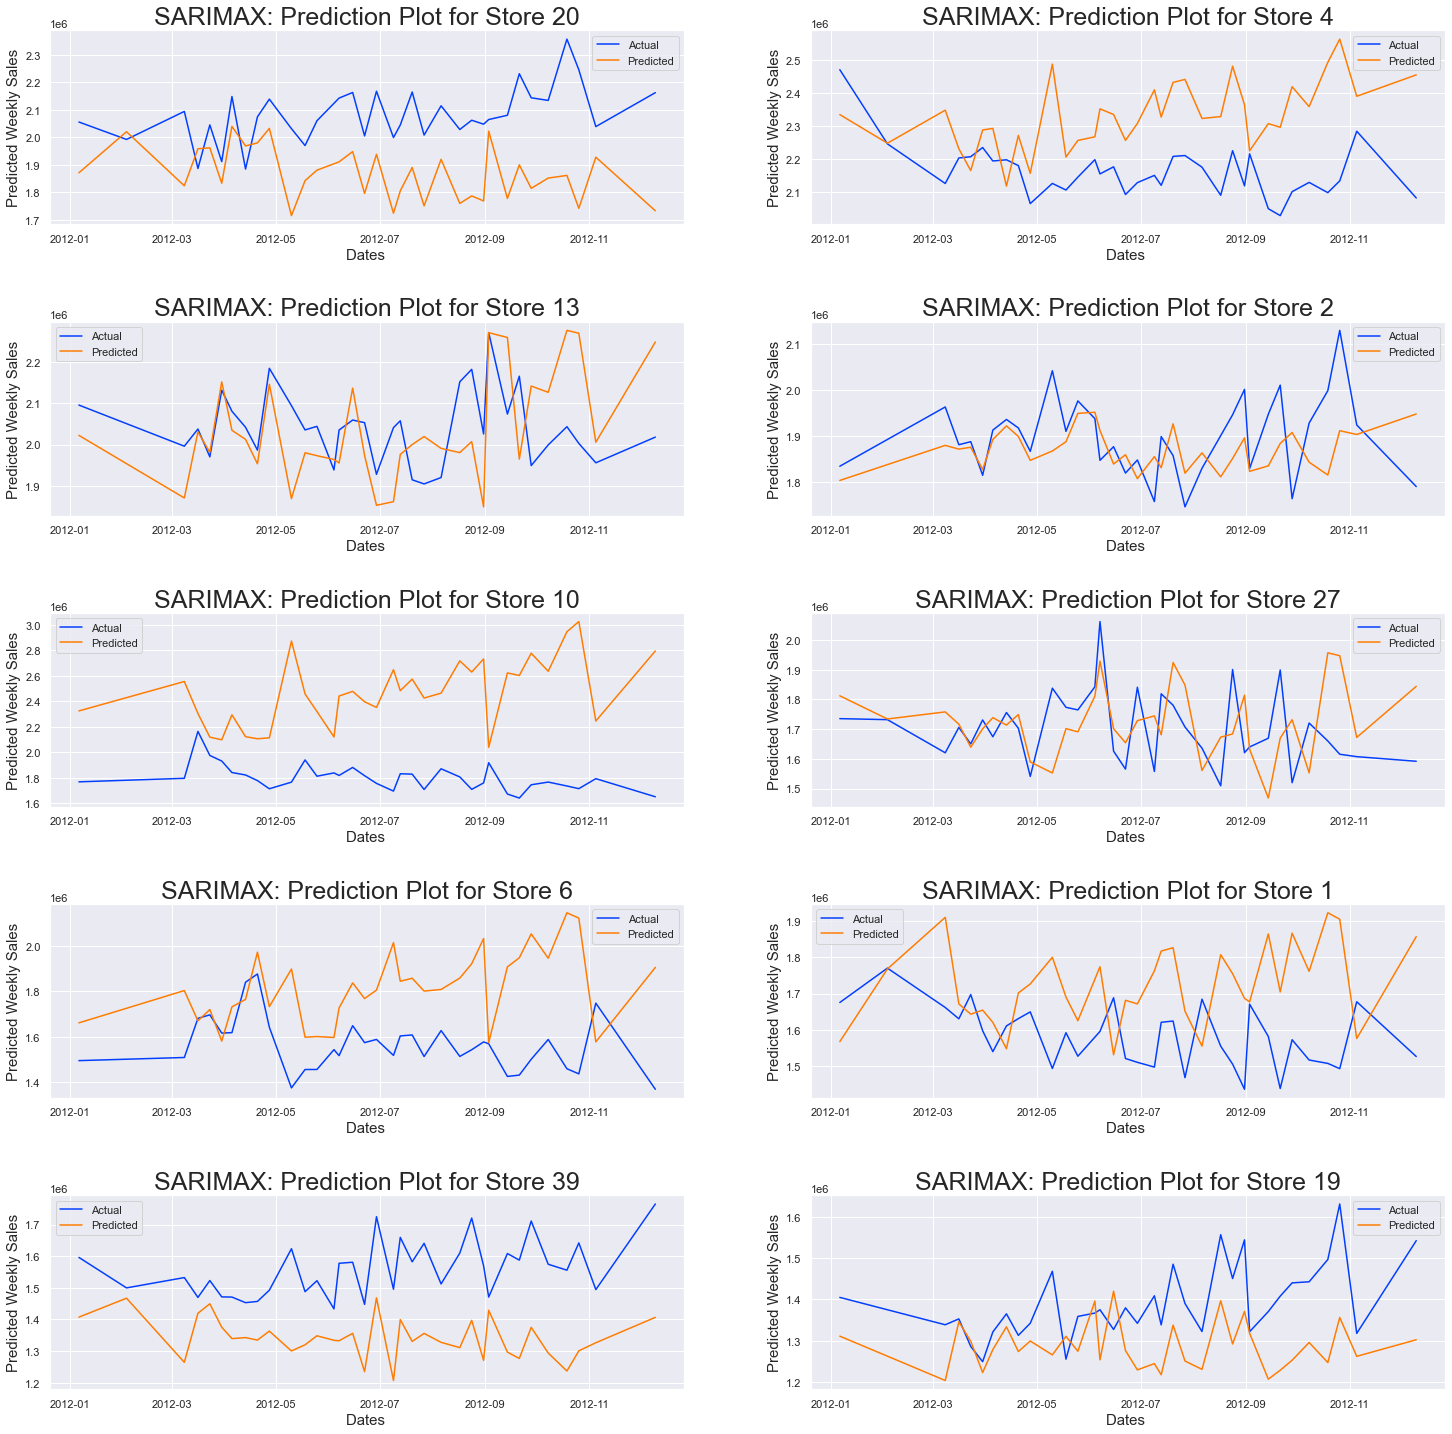

In [102]:
#Plot Predictions

plot_ts_results(Predictions, test_index, 'SARIMAX', 5, 2, wl = 25, ww = 25, hs = 0.5)

In [103]:
def plot_ts_forecast(forecast_, Index, Train_df, l = 5, w = 2, wl = 20, ww = 10, hs = 1.5, plot_current = 0):
    fig, axes = plt.subplots(l, w, figsize = (wl, ww))
    plt.subplots_adjust(hspace = hs)
    j = 1
    
    for i, store_no in enumerate(highest_10):
        
        forecast_df = pd.DataFrame(forecast_[i], columns = ['Forecast'], index = Index)
        train_df = pd.DataFrame(Train_df[i], columns = ['weekly_sales'], index = train.index)
        
        plt.subplot(l, w, j)
        sns.lineplot(x=forecast_df.index, y=forecast_df.Forecast)
        if plot_current == 1:
            sns.lineplot(x = train_df.index, y = train_df.Weekly_sales)
            
        plt.title(f'{no_of_wks} Weeks forecast plot for store {store_no}', fontsize = 25)
        plt.xlabel('Dates', fontsize = 15)
        plt.ylabel('Forecast Weekly Sales', fontsize = 9)
        plt.grid(True)
        
        j = j+1
        

In [104]:
forecast_list[0]

[2039975.6211533505,
 2032461.9509537173,
 2022682.5719410619,
 2020577.5989150596,
 1979822.5814063463,
 1961837.8942480562,
 1968758.8453604558,
 1958391.0316965522,
 1948189.5351384059,
 1938195.4568366045,
 1927738.5425781312,
 1919940.833408558]

In [105]:
# show forecasts for selected stores
Forecast = pd.DataFrame(index= Index)
for i in range(len(highest_10)):
    Forecast['store_'+str([highest_10[i]])] = forecast_1[i]
    
Forecast.head()

store_[20]     store_[4]    store_[13]     store_[2]  \
2012-12-02  2.039976e+06  2.164232e+06  1.953197e+06  1.951467e+06   
2012-12-09  2.032462e+06  2.230372e+06  1.848819e+06  1.949037e+06   
2012-12-16  2.022683e+06  2.224247e+06  2.019406e+06  1.947725e+06   
2012-12-23  2.020578e+06  2.255786e+06  2.141969e+06  1.926301e+06   
2012-12-30  1.979823e+06  2.328083e+06  2.271490e+06  1.911468e+06   

              store_[10]    store_[27]     store_[6]     store_[1]  \
2012-12-02  2.038811e+06  1.673007e+06  1.574498e+06  1.531791e+06   
2012-12-09  2.097468e+06  1.672111e+06  1.577691e+06  1.567940e+06   
2012-12-16  2.119809e+06  1.560755e+06  1.661316e+06  1.576526e+06   
2012-12-23  2.396238e+06  1.814356e+06  1.803470e+06  1.671548e+06   
2012-12-30  2.304117e+06  1.947270e+06  1.764669e+06  1.726408e+06   

              store_[39]    store_[19]  
2012-12-02  1.342645e+06  1.274214e+06  
2012-12-09  1.339461e+06  1.273605e+06  
2012-12-16  1.348457e+06  1.299107e+06  
2012-12-23  1.419522e+06  1.419943e+06  
2012-12-30  1.467144e+06  1.356138e+06

In [106]:
Forecast.shape

(12, 10)

**Forecast Plot(summary) - non Detrended TS**

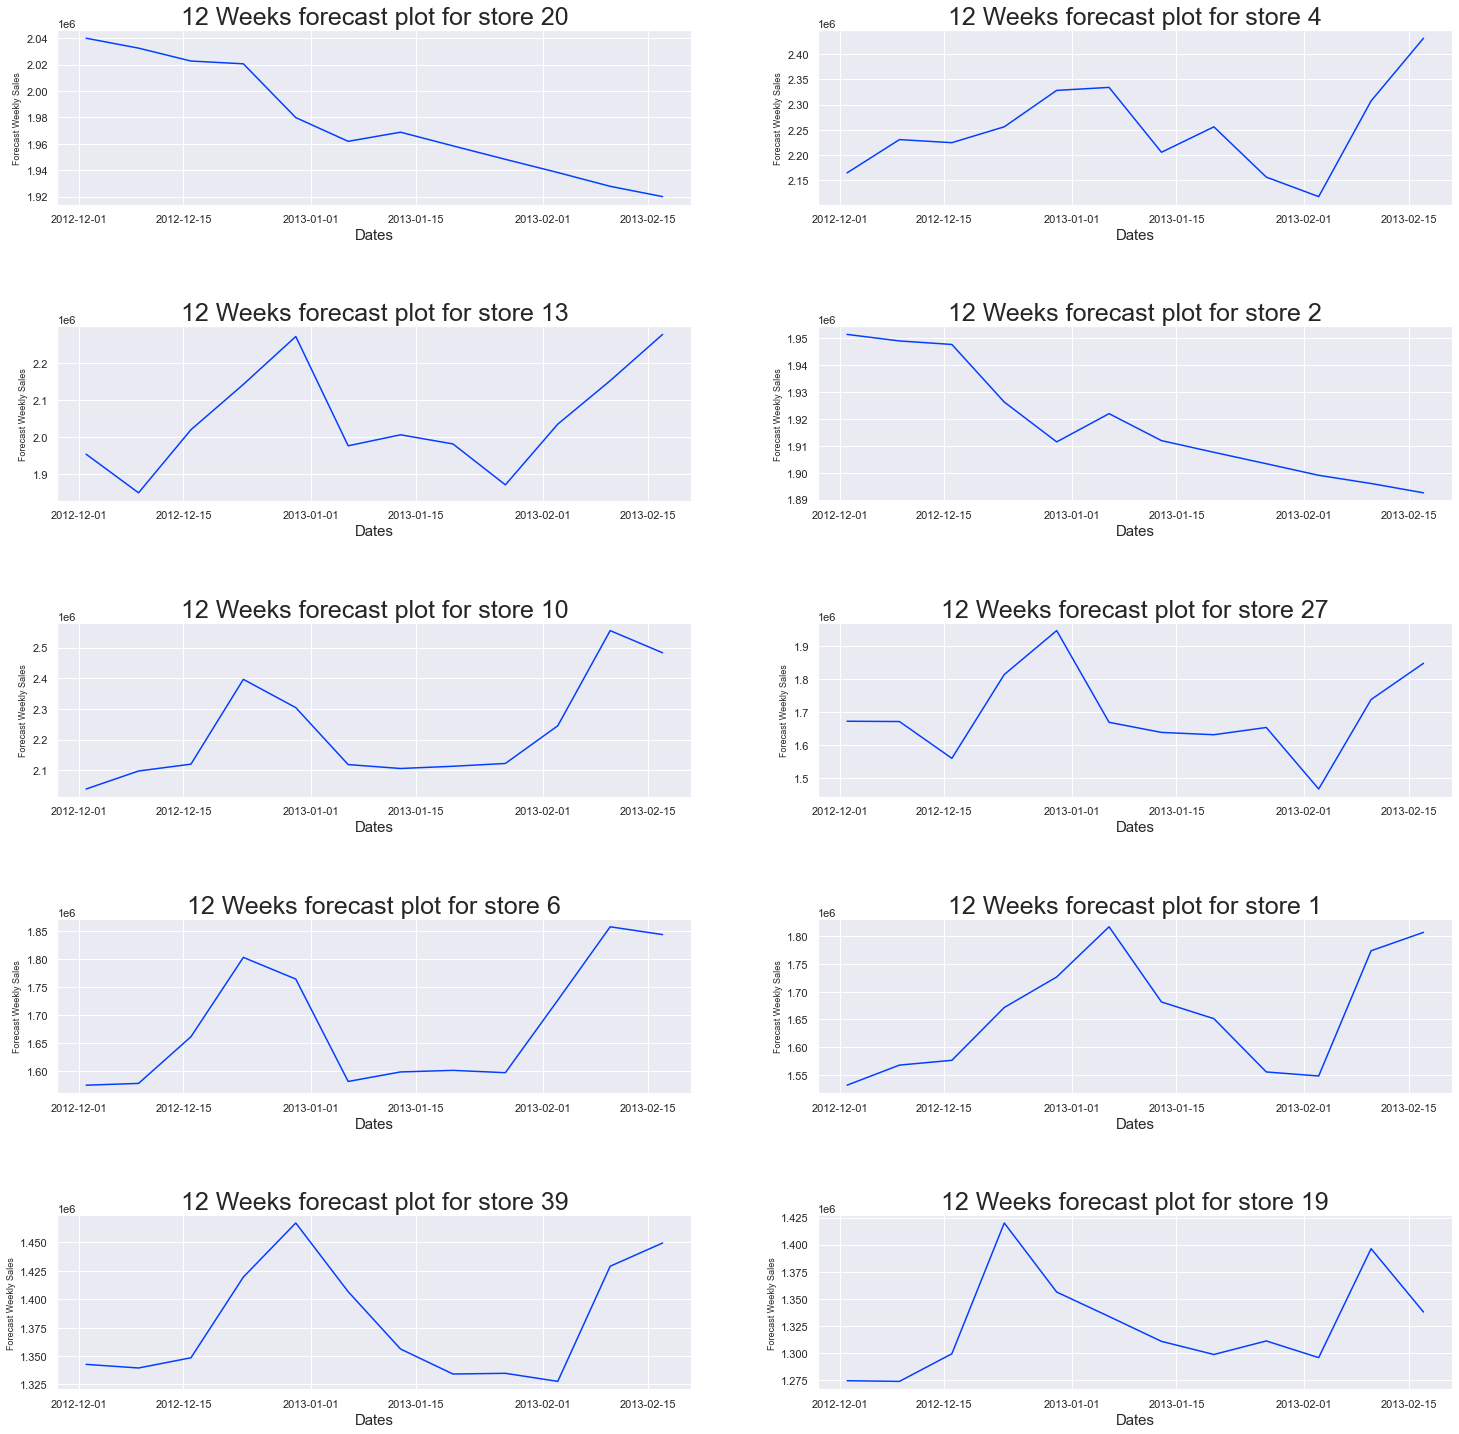

In [107]:
plot_ts_forecast(forecast_1, Index, current_df, 5, 2, 25, 25, 0.7, 0)

**Observations**
1. The result of the forecast is highly affected by the size of the training/testing dataset
2. Downward sales forecast for stores: 20, 13, 2, and 27
3. Stores: [1, 4, 6, 10, 19, 39] have similar trends in the forecast

In [108]:
# Reforecast for stores for the subset of stores with similar forecast trends 
# stores: [1, 4, 6, 10, 19, 39]
df_new = sales[((sales['store'] == 1) | (sales['store'] == 4) | ((sales['store'] == 6) | (sales['store'] == 10)) | ((sales['store'] == 19) | (sales['store'] == 39)))]

In [109]:
df_new.head()

store  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   cpi  unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [110]:
df_new.shape

(858, 7)

In [111]:
#confirm the stores in df_new

new_store_list = df_new['store'].unique()
new_store_list

array([ 1,  4,  6, 10, 19, 39], dtype=int64)

In [112]:
def plot_new_forecasts(store_df, dbf = forecast):
    fig, axes = plt.subplots(figsize = (15, 4))
    
    sns.lineplot(x = dbf.index, y = dbf.weekly_sales, color = 'red')
    sns.lineplot(x = store_df.index, y = store_df.weekly_sales, color = 'green')
    plt.title(f'{len(Index)} Weeks forecast plot for store {new_store_list}', fontsize = 25)
    plt.xlabel('Dates', fontsize = 15)
    plt.ylabel('Weekly Sales', fontsize = 9)
    plt.grid(True)
    plt.show()

<AxesSubplot:xlabel='weekly_sales'>

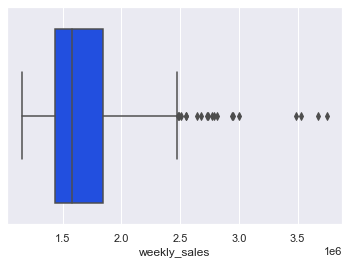

In [113]:
#check outliers on the weekly sales

store_df = df_new.copy()
sns.boxplot(store_df['weekly_sales'])

In [114]:
# Remove outliers
print(f'shape before {store_df.shape[0]} Outlier removal')
store_df = remove_outliers(store_df)
print(f'shape after {store_df.shape[0]} Outlier removal')

shape before 858 Outlier removal
shape after 839 Outlier removal


<AxesSubplot:xlabel='weekly_sales'>

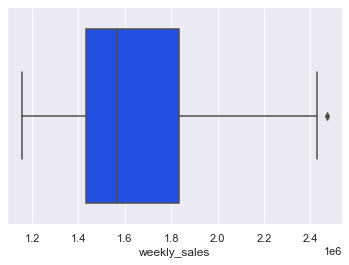

In [115]:
#Boxplot to recheck for outliers on weekly sales

sns.boxplot(store_df['weekly_sales'])

In [116]:
#obtain best Arima for store_df

multiplemodels = auto_arima(store_df['weekly_sales'], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22308.071, Time=2.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22480.350, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22390.393, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22355.817, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22478.351, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22306.353, Time=1.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22338.770, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22311.058, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22307.099, Time=1.69 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=22322.777, Time=1.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22306.489, Time=1.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22309.421, Time=1.55 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=22304.465, Time=1.88 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=22336.814, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0

In [117]:
#forecast for thr new_df
#SARIMA forecast without detrending

arima_order = [1, 1, 2]
season_order = [1, 1, 2, 7]

store_index = store_df.index
store_df = pd.DataFrame(store_df['weekly_sales'], columns = ['weekly_sales'], index = store_index)

size = int(store_df.shape[0] * 0.75) #size for triain , test split the data @ 75:25
train, test = store_df.iloc[:size, :], store_df.iloc[size:, :]

start_1 = train.shape[0]
end_1 = (train.shape[0] + test.shape[0])-1

train_index = train.index
test_index = test.index

model = SARIMAX(train, order = arima_order, seasonal_order = season_order, initialization = 'approximate_diffuse')
model = model.fit()

forecast = model.forecast(steps = no_of_wks).tolist()
forecast = pd.DataFrame(forecast, columns = ['weekly_sales'], index = Index)

current_df = train

predicted_ = model.predict(start = start_1, end = end_1, dynamic = True)

predicted = get_predictions(test.values.flatten(), predicted_)

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



-------------------Predicted Results-------------------------
       Actual     Predicted  Error(%)
0  1390122.11  1.391865e+06  0.125364
1  1405168.06  1.401957e+06  0.228553
2  1352547.70  1.348910e+06  0.268969
3  1375101.26  1.371315e+06  0.275361
4  1343773.94  1.347711e+06  0.292995 
__________________________________________________
Median error: 8.03%
Mean error: 9.92%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [118]:
forecast

weekly_sales
2012-12-02  1.446929e+06
2012-12-09  1.448364e+06
2012-12-16  1.435044e+06
2012-12-23  1.431366e+06
2012-12-30  1.449266e+06
2013-01-06  1.456549e+06
2013-01-13  1.433680e+06
2013-01-20  1.475263e+06
2013-01-27  1.481314e+06
2013-02-03  1.412610e+06
2013-02-10  1.393390e+06
2013-02-17  1.413266e+06

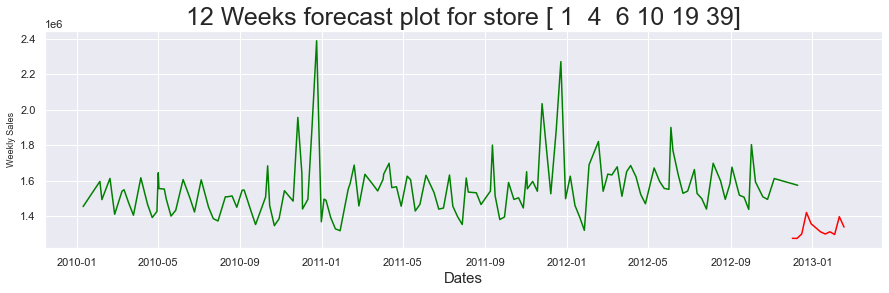

In [119]:
plot_new_forecasts(df_new[df_new['store'] == 1])

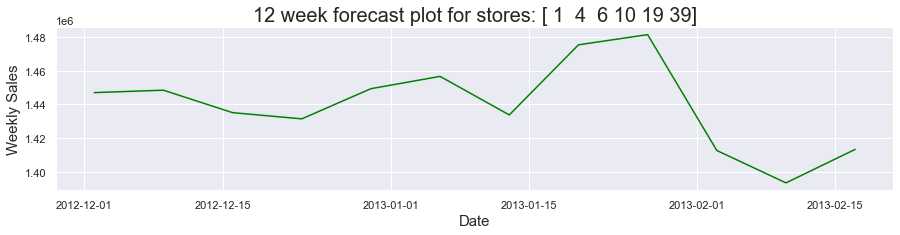

In [120]:
# expand the sales forecast plot

fig, axes = plt.subplots(figsize = (15, 3))
sns.lineplot(x = forecast.index , y = forecast.weekly_sales, color = 'green')
plt.title(f'{len(Index)} week forecast plot for stores: {new_store_list}', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)
plt.grid(True)
plt.show()

In [121]:
def format_number(number):
    return('{:,}'.format(number))

In [122]:
Max = format_number(round(forecast.weekly_sales.max(), 2))
Min = format_number(round(forecast.weekly_sales.min(), 2))
Mean = format_number(round(forecast.weekly_sales.mean(), 2))
Summary = pd.DataFrame([Max, Min, Mean], columns = ['Summary_Matrics'], index = ['Max', 'Min', 'Mean'])
Summary

Summary_Matrics
Max      1,481,313.7
Min      1,393,390.0
Mean    1,439,753.38

In [123]:
#Extract the max, min, mean sales forecast for the stores

summary_1 = pd.DataFrame(index = ['Max', 'Min', 'Mean'])

for store_no in new_store_list:
    store_df = get_store_df(sales, 'store', store_no)
    max_sales = format_number(round(store_df.weekly_sales.max(), 2))
    min_sales = format_number(round(store_df.weekly_sales.min(), 2))
    mean_sales = format_number(round(store_df.weekly_sales.mean(), 2))
    matrics = [max_sales, min_sales, mean_sales]
    
    summary_1['store_'+str(store_no)] = matrics
summary_1

store_1       store_4       store_6      store_10      store_19  \
Max    2,387,950.2  3,676,388.98  2,727,575.18  3,749,057.69  2,678,206.42   
Min   1,316,899.31   1,762,539.3  1,261,253.18  1,627,707.31  1,181,204.53   
Mean   1,555,264.4  2,094,712.96  1,564,728.19  1,899,424.57  1,444,999.04   

          store_39  
Max   2,554,482.84  
Min   1,158,698.44  
Mean  1,450,668.13

In [124]:
summary_1['Summary_Matrics'] = Summary['Summary_Matrics']

In [125]:
summary_1 = summary_1[['Summary_Matrics', 'store_1', 'store_4', 'store_6', 'store_10', 'store_19', 'store_39']]

In [126]:
summary_1.T

Max           Min          Mean
Summary_Matrics   1,481,313.7   1,393,390.0  1,439,753.38
store_1           2,387,950.2  1,316,899.31   1,555,264.4
store_4          3,676,388.98   1,762,539.3  2,094,712.96
store_6          2,727,575.18  1,261,253.18  1,564,728.19
store_10         3,749,057.69  1,627,707.31  1,899,424.57
store_19         2,678,206.42  1,181,204.53  1,444,999.04
store_39         2,554,482.84  1,158,698.44  1,450,668.13

**Insights from the forecast results**

1. There is lower sales forecast for all stores for the next 12-weeks
2. All the stores under review will perform better than their mean sales return.


In [127]:
#show predicted df

predicted

Actual     Predicted   Error(%)
0    1390122.11  1.391865e+06   0.125364
1    1405168.06  1.401957e+06   0.228553
2    1352547.70  1.348910e+06   0.268969
3    1375101.26  1.371315e+06   0.275361
4    1343773.94  1.347711e+06   0.292995
..          ...           ...        ...
205  1720221.91  1.210900e+06  29.607948
206  1781528.77  1.246429e+06  30.036000
207  1991824.05  1.265521e+06  36.464224
208  2149355.20  1.328046e+06  38.211894
209  2338832.40  1.302804e+06  44.296824

[210 rows x 3 columns]

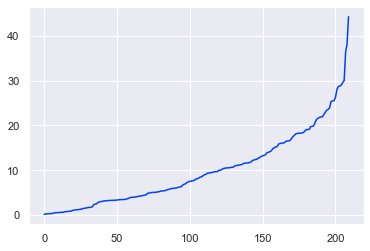

In [128]:
#prediction Error is exponentially grow
#show error plot

plt.plot(predicted['Error(%)'])
plt.show()

In [129]:
#Summary

max_error = predicted['Error(%)'].max()
min_error = predicted['Error(%)'].min()
mean_error = predicted['Error(%)'].mean()
Summary_2 = pd.DataFrame([max_error, min_error, mean_error], columns = ['New_Matrics'], index = ['Max', 'Min', 'Mean'])
Summary_2

New_Matrics
Max     44.296824
Min      0.125364
Mean     9.919338

In [130]:
#Recall the summary matrix from previuos analysis

summary_1

Summary_Matrics       store_1       store_4       store_6      store_10  \
Max      1,481,313.7   2,387,950.2  3,676,388.98  2,727,575.18  3,749,057.69   
Min      1,393,390.0  1,316,899.31   1,762,539.3  1,261,253.18  1,627,707.31   
Mean    1,439,753.38   1,555,264.4  2,094,712.96  1,564,728.19  1,899,424.57   

          store_19      store_39  
Max   2,678,206.42  2,554,482.84  
Min   1,181,204.53  1,158,698.44  
Mean  1,444,999.04  1,450,668.13

In [131]:
summary_1['New_Matrics'] = Summary_2['New_Matrics']
summary_1 = summary_1[['Summary_Matrics', 'New_Matrics', 'store_1', 'store_4', 'store_6', 'store_10', 'store_19', 'store_39']]

In [132]:
summary_1

Summary_Matrics  New_Matrics       store_1       store_4       store_6  \
Max      1,481,313.7    44.296824   2,387,950.2  3,676,388.98  2,727,575.18   
Min      1,393,390.0     0.125364  1,316,899.31   1,762,539.3  1,261,253.18   
Mean    1,439,753.38     9.919338   1,555,264.4  2,094,712.96  1,564,728.19   

          store_10      store_19      store_39  
Max   3,749,057.69  2,678,206.42  2,554,482.84  
Min   1,627,707.31  1,181,204.53  1,158,698.44  
Mean  1,899,424.57  1,444,999.04  1,450,668.13

In [133]:
#Summary_Matrics --> matrics obtained when the stores were handled separately
#New_Matrics --> matrics obtained when the store with like trends were combined

summary_1.T

Max           Min          Mean
Summary_Matrics   1,481,313.7   1,393,390.0  1,439,753.38
New_Matrics         44.296824      0.125364      9.919338
store_1           2,387,950.2  1,316,899.31   1,555,264.4
store_4          3,676,388.98   1,762,539.3  2,094,712.96
store_6          2,727,575.18  1,261,253.18  1,564,728.19
store_10         3,749,057.69  1,627,707.31  1,899,424.57
store_19         2,678,206.42  1,181,204.53  1,444,999.04
store_39         2,554,482.84  1,158,698.44  1,450,668.13

**Conslusion: Forecast with the stores grouped together is worse than was obtained when each store was handled separately**
Given that none of the above results is satisfactory, The top 10 weekly_sales store data was detrended and a new forecast was made

In [134]:
#List of stores with Stationary Ts

print(f'{len(store_list)} stores with Stationary Ts\n {store_list}')

45 stores with Stationary Ts
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [135]:
#Remove trends from the time series

df = pd.DataFrame(sales['weekly_sales'])

rolling_means = df.rolling(window = 7).mean()
rolling_mean_detrended = df - rolling_means

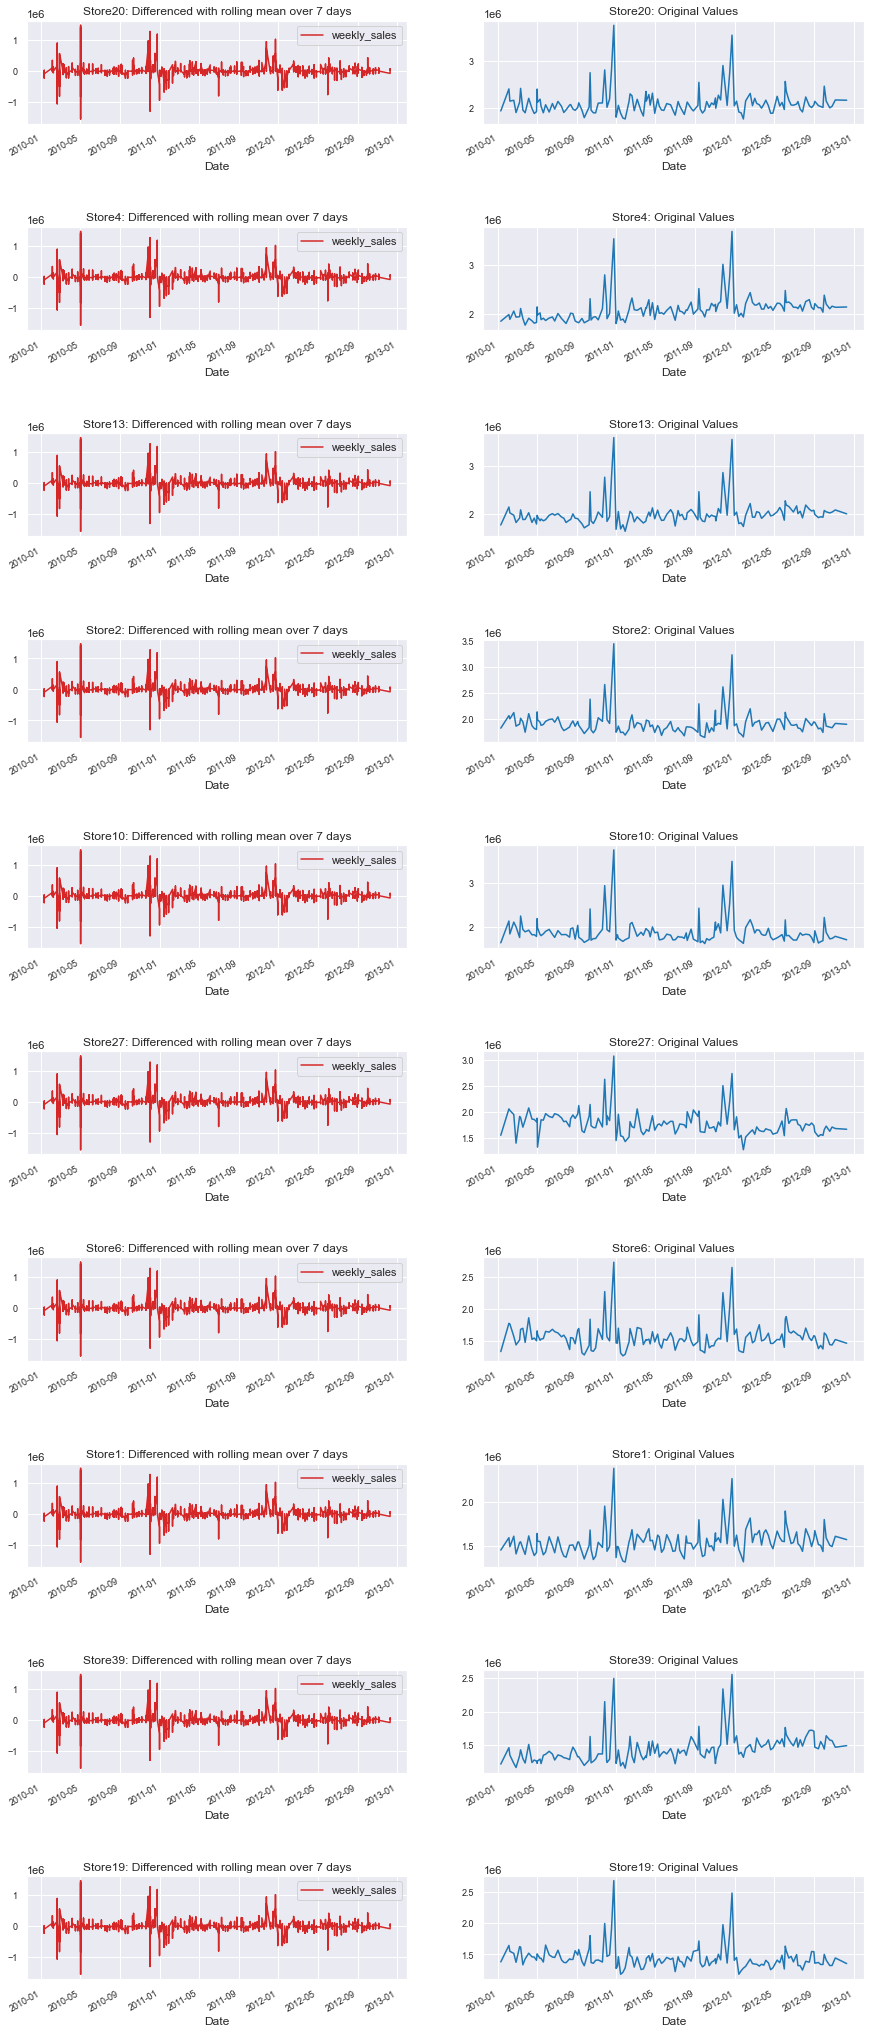

In [136]:
fig, axes = plt.subplots(10, 2, figsize=(15, 40))
plt.subplots_adjust(hspace = 1.0)

m, n, = 0, 0 
for i, j in enumerate(highest_10):
    store_df = get_store_df(sales, 'store', j)
    
    m = n+1
    n = m+1
    
    a1 = plt.subplot(10, 2, m)
    a2 = plt.subplot(10, 2, n)
    m = i + 1
    
    rolling_mean_detrended.plot(color = 'tab:red', title = f'Store{j}: Differenced with rolling mean over 7 days', ax = a1, fontsize = 9)
    store_df['weekly_sales'].plot(color = 'tab:blue', title = f'Store{j}: Original Values', ax= a2, fontsize = 9)
    

In [137]:
#Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

In [138]:
rolling_mean_detrended['store'] = sales['store']
rolling_mean_detrended.head()

weekly_sales  store
Date                           
2010-05-02           NaN      1
2010-12-02           NaN      1
2010-02-19           NaN      1
2010-02-26           NaN      1
2010-05-03           NaN      1

In [139]:
data = rolling_mean_detrended.dropna()
data.head()

weekly_sales  store
Date                            
2010-03-19  -66656.804286      1
2010-03-26 -100562.534286      1
2010-02-04   96688.562857      1
2010-09-04   56645.904286      1
2010-04-16  -30761.587143      1

<Figure size 432x288 with 0 Axes>

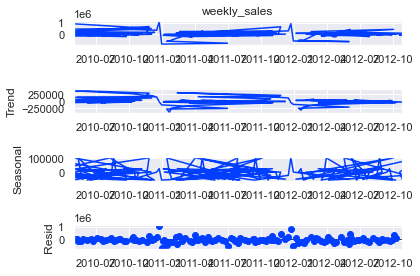

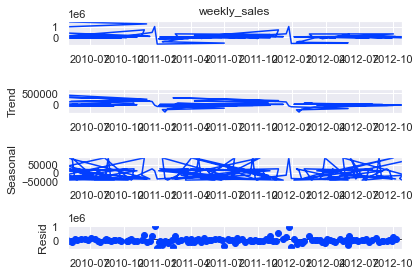

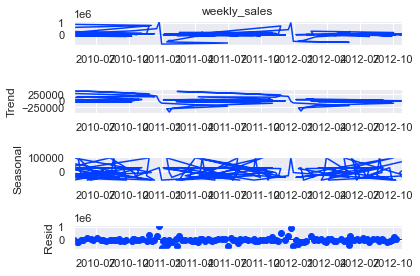

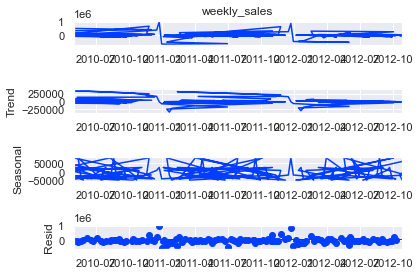

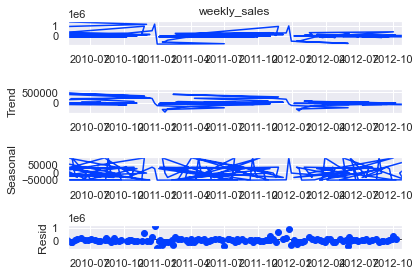

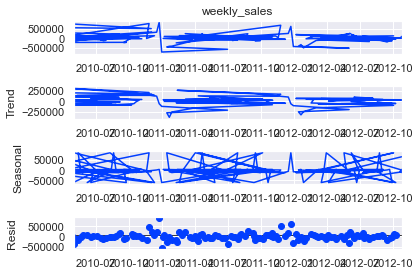

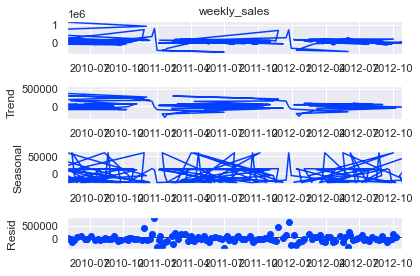

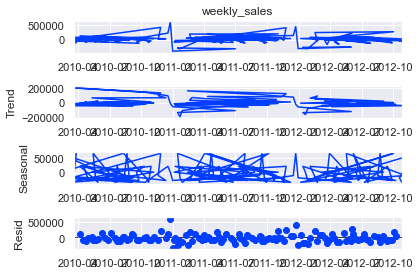

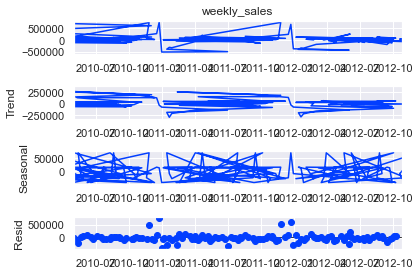

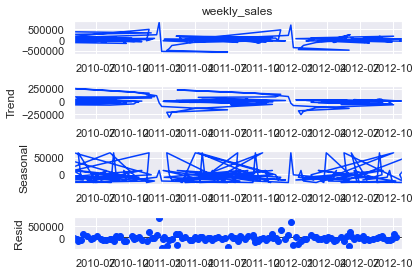

In [140]:
#series, model = 'additive', period =  1
#fig, axes = plt.subplots(10, 2, figsize = (15, 40))

plt.subplots_adjust(hspace = 1.0)

for i in highest_10:
    store_df = get_store_df(data, 'store', i)
    store_df = pd.DataFrame(store_df)
    d_res = seasonal_decompose(store_df['weekly_sales'], period = 7)
    
    d_res.plot()

In [141]:
rolling_mean_detrended.shape

(6435, 2)

In [142]:
#Remove Seasonality from the TS

r_m_d = rolling_mean_detrended.copy()
r_m_d1 = rolling_mean_detrended.copy()

r_m_d = pd.DataFrame(r_m_d)
r_m_d.head()

weekly_sales  store
Date                           
2010-05-02           NaN      1
2010-12-02           NaN      1
2010-02-19           NaN      1
2010-02-26           NaN      1
2010-05-03           NaN      1

In [143]:
r_m_d = r_m_d.dropna()
r_m_d.head()

weekly_sales  store
Date                            
2010-03-19  -66656.804286      1
2010-03-26 -100562.534286      1
2010-02-04   96688.562857      1
2010-09-04   56645.904286      1
2010-04-16  -30761.587143      1

In [144]:
r_m_d.shape

(6429, 2)

In [145]:
# from pandas.core.window import rolling
# remove seasonality
#shift() - it just shift index by desired number of periods with an optimal time frequency
r_m_d_1 = pd.DataFrame((r_m_d['weekly_sales'] - r_m_d['weekly_sales'].shift()))
r_m_d_1.head()

weekly_sales
Date                     
2010-03-19            NaN
2010-03-26  -33905.730000
2010-02-04  197251.097143
2010-09-04  -40042.658571
2010-04-16  -87407.491429

In [146]:
r_m_d_1['store'] = r_m_d['store']
r_m_d_1.head(10)

weekly_sales  store
Date                            
2010-03-19            NaN      1
2010-03-26  -33905.730000      1
2010-02-04  197251.097143      1
2010-09-04  -40042.658571      1
2010-04-16  -87407.491429      1
2010-04-23  -51437.794286      1
2010-04-30   35907.572857      1
2010-07-05  160077.362857      1
2010-05-14 -122535.274286      1
2010-05-21  -66688.542857      1

In [147]:
r_m_d_1.shape

(6429, 2)

In [148]:
r_m_d_1 = r_m_d_1.dropna()

In [149]:
r_m_d_1.shape

(6428, 2)

In [150]:
highest_5

[20, 4, 13, 2, 10]

In [151]:
highest_6

[20, 4, 13, 2, 10, 27]

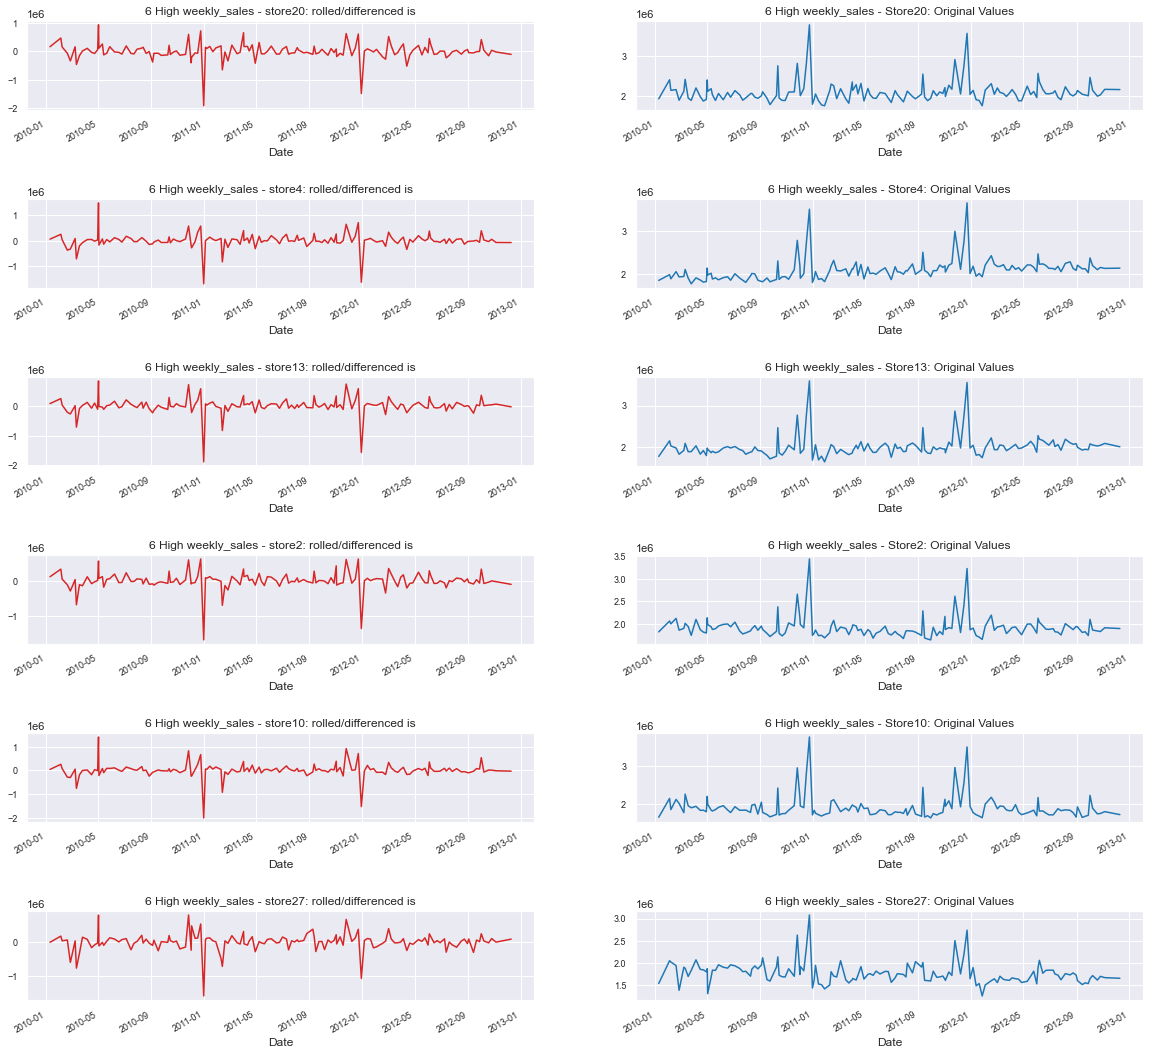

In [152]:
# plot the new TS after detrended and removing Seasonality

fig, axes = plt.subplots(6, 2, figsize=(20, 20))
plt.subplots_adjust(hspace = 1.0)

m, n, = 0, 0 
for i, j in enumerate(highest_6):
    #detrended TS
    store_r_m_d = get_store_df(r_m_d_1, 'store', j)
    #original TS
    store_df = get_store_df(sales, 'store', j)
    
    m = n+1
    n = m+1
    
    a1 = plt.subplot(6, 2, m)
    a2 = plt.subplot(6, 2, n)
    m = i + 1
    
    store_r_m_d['weekly_sales'].plot(color = 'tab:red', title = f'{len(highest_6)} High weekly_sales - store{j}: rolled/differenced is', ax = a1, fontsize = 9)
    store_df['weekly_sales'].plot(color = 'tab:blue', title = f'{len(highest_6)} High weekly_sales - Store{j}: Original Values', ax= a2, fontsize = 9)
    

In [153]:
highest_10

[20, 4, 13, 2, 10, 27, 6, 1, 39, 19]

In [154]:
#Find Best ARIMA ORDER FOR THE ROLLED & DIFFERENCED TS

for i in highest_10:
    print(f'Highest Weekly_Sales: Best order for ARIMA model for Store #{i}')
    store_df = get_store_df(r_m_d_1, 'store', i)
    multiplemodels = auto_arima(store_df['weekly_sales'], trace = True)
    print('\n**********************************************************************')
    

Highest Weekly_Sales: Best order for ARIMA model for Store #20
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3976.481, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4019.190, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4005.459, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3994.115, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4017.190, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3978.810, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3985.794, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3974.057, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3986.029, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3980.361, Time=0.40 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3971.353, Time=0.54 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3970.355, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3971.269, Time=0.21 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3936.184, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3943.031, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3944.922, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3927.345, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3927.442, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3927.556, Time=0.33 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3924.684, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=3925.254, Time=0.85 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=392

In [155]:
# Forecast with the Rolled & Differenced TS
# SERIMA forecast

predictedList = list()
Forecast = pd.DataFrame()
s_ARIMA_order = [[2,0,3], [1,0,3],[5,0,1],[1,0,4],[5,0,2],[0,0,5]]
s_season_order = [[2,0,3,7], [1,0,3,7],[5,0,1,7],[1,0,4,7],[5,0,2,7],[0,0,5,7]]
forecasst_list, train_list = [], []
Forecast_df = list()

for i in highest_10:
    store_r_m_d = get_store_df(r_m_d_1, 'store', j)
    store_index = store_df.index
    store_df = pd.DataFrame(store_df['weekly_sales'], columns = ['weekly_sales'], index = store_index)
    store_df = remove_outliers(store_df)
    size = int(store_df.shape[0]*0.75)
    train, test = store_df.iloc[:size, :], store_df.iloc[size:,:]
    
    start_1 = train.shape[0]
    end_1 = (train.shape[0] + test.shape[0]) - 1
    
    train_index = train.index
    test_index = test.index
    
    if i == 10 or i == 13 or i == 20 or i == 27:
        arima_order = s_ARIMA_order[0]
        season_order = s_season_order[0]
    elif i == 4 or i == 6:
        arima_order = s_ARIMA_order[1]
        season_order = s_season_order[1]
    elif i == 39:
        arima_order = s_ARIMA_order[2]
        season_order = s_season_order[2]
    elif i == 2:
        arima_order = s_ARIMA_order[3]
        season_order = s_season_order[3]
    elif i == 1:
        arima_order = s_ARIMA_order[4]
        season_order = s_season_order[4]
    elif i == 19:
        arima_order = s_ARIMA_order[5]
        season_order = s_season_order[5]
    
    #forecast with serima
    model = SARIMAX(train, order = arima_order, seasonal_order = season_order, initialization = 'approximate_diffuse')
    model = model.fit()
    forecast = model.forecast(steps = no_of_wks).tolist()
    forecast_df = pd.DataFrame(forecast, columns = ['weekly_sales'], index=Index)
    Forecast_df.append(forecast_df)
    forecast_list.append(forecast)
    train_list.append(train)
    
    predicted_ = model.predict(start = start_1, end = end_1, dynamic = True)
    predicted_list.append(predicted_)
    
    print(f'Weekly Sales Predictions for store{i}')
    #store the predictions in a list
    predictions.append(get_predictions(test.values.flatten(), predicted_))
        
    

C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-

Weekly Sales Predictions for store20

-------------------Predicted Results-------------------------
         Actual     Predicted      Error(%)
0    -47.504286  24765.195014 -52232.548973
1 -33156.431429  38966.481683   -217.523147
2 -50713.908571  34979.455061   -168.974086
3 -79666.200000  44236.672617   -155.527529
4 -27800.332857  14548.295946   -152.331373 
__________________________________________________
Median error: 2.6%
Mean error: -1475.25%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\

Weekly Sales Predictions for store4

-------------------Predicted Results-------------------------
          Actual     Predicted      Error(%)
0     -47.504286   7079.099713 -15002.023274
1  -61604.232857  70151.918905   -213.875160
2  -27800.332857  17009.259007   -161.183652
3 -268443.272857  80758.203857   -130.083899
4  -33501.860000   9062.134210   -127.049645 
__________________________________________________
Median error: 47.27%
Mean error: -381.46%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\

Weekly Sales Predictions for store13

-------------------Predicted Results-------------------------
          Actual     Predicted      Error(%)
0     -47.504286 -10707.977796 -22441.077368
1  -61604.232857  23747.363500   -138.548266
2 -268443.272857  22784.952670   -108.487809
3 -102312.658571   3927.671935   -103.838891
4  -81621.512857  -1084.584740    -98.671202 
__________________________________________________
Median error: 43.34%
Mean error: -595.01%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\stats

Weekly Sales Predictions for store2

-------------------Predicted Results-------------------------
         Actual      Predicted       Error(%)
0    -47.504286  -71832.354348 -151112.365933
1 -61604.232857  163682.808825    -365.700588
2 -27800.332857   42122.823448    -251.519133
3 -47040.537143   42178.203093    -189.663524
4 -33501.860000  -75798.458320    -126.251493 
__________________________________________________
Median error: 78.74%
Mean error: -4258.76%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\

Weekly Sales Predictions for store10

-------------------Predicted Results-------------------------
          Actual     Predicted      Error(%)
0     -47.504286 -10707.977796 -22441.077368
1  -61604.232857  23747.363500   -138.548266
2 -268443.272857  22784.952670   -108.487809
3 -102312.658571   3927.671935   -103.838891
4  -81621.512857  -1084.584740    -98.671202 
__________________________________________________
Median error: 43.34%
Mean error: -595.01%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\

Weekly Sales Predictions for store27

-------------------Predicted Results-------------------------
          Actual     Predicted      Error(%)
0     -47.504286 -10707.977796 -22441.077368
1  -61604.232857  23747.363500   -138.548266
2 -268443.272857  22784.952670   -108.487809
3 -102312.658571   3927.671935   -103.838891
4  -81621.512857  -1084.584740    -98.671202 
__________________________________________________
Median error: 43.34%
Mean error: -595.01%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\

Weekly Sales Predictions for store6

-------------------Predicted Results-------------------------
          Actual     Predicted      Error(%)
0     -47.504286   7079.099713 -15002.023274
1  -61604.232857  70151.918905   -213.875160
2  -27800.332857  17009.259007   -161.183652
3 -268443.272857  80758.203857   -130.083899
4  -33501.860000   9062.134210   -127.049645 
__________________________________________________
Median error: 47.27%
Mean error: -381.46%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\stats

Weekly Sales Predictions for store1

-------------------Predicted Results-------------------------
         Actual     Predicted       Error(%)
0    -47.504286 -84333.723566 -177428.663568
1 -61604.232857  67868.532425    -210.168619
2 -33501.860000  20058.124053    -159.871673
3 -47040.537143  26562.763725    -156.467816
4 -33156.431429 -82329.456909    -148.306146 
__________________________________________________
Median error: 8.8%
Mean error: -5032.62%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yogit\anaconda3\lib\site-packages\stats

Weekly Sales Predictions for store39

-------------------Predicted Results-------------------------
         Actual      Predicted       Error(%)
0    -47.504286  -62428.834404 -131317.267864
1 -61604.232857  155936.958710    -353.127020
2 -27800.332857   51063.134211    -283.678140
3 -47040.537143   74100.373815    -257.524506
4 -71274.750000 -166060.865233    -132.986949 
__________________________________________________
Median error: 77.46%
Mean error: -3665.9%
Weekly Sales Predictions for store19

-------------------Predicted Results-------------------------
          Actual     Predicted      Error(%)
0     -47.504286  -8198.174934 -17157.758560
1  -27800.332857  21268.574182   -176.504747
2  -47040.537143  34025.375576   -172.332030
3  -61604.232857  24813.380203   -140.278694
4 -268443.272857  85653.591897   -131.907520 
__________________________________________________
Median error: 30.67%
Mean error: -443.58%


C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yogit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [156]:
test.shape

(35, 1)

In [157]:
train.head(10)

weekly_sales
Date                     
2010-12-02  -51824.834286
2010-02-19  -93876.684286
2010-02-26 -182858.231429
2010-05-03   62322.285714
2010-12-03  -87838.577143
2010-03-19 -164295.150000
2010-03-26  105599.345714
2010-02-04  200743.917143
2010-09-04 -149590.837143
2010-04-16  -41699.308571

In [158]:
# show the new forecast results

Forecast = pd.DataFrame(index = Index)
for i in range(len(highest_10)):
    Forecast['store_'+str(highest_10[i])] = forecast_list[i]
Forecast

store_20       store_4      store_13       store_2  \
2012-12-02  2.039976e+06  2.164232e+06  1.953197e+06  1.951467e+06   
2012-12-09  2.032462e+06  2.230372e+06  1.848819e+06  1.949037e+06   
2012-12-16  2.022683e+06  2.224247e+06  2.019406e+06  1.947725e+06   
2012-12-23  2.020578e+06  2.255786e+06  2.141969e+06  1.926301e+06   
2012-12-30  1.979823e+06  2.328083e+06  2.271490e+06  1.911468e+06   
2013-01-06  1.961838e+06  2.334017e+06  1.975937e+06  1.921979e+06   
2013-01-13  1.968759e+06  2.205211e+06  2.005666e+06  1.911944e+06   
2013-01-20  1.958391e+06  2.255693e+06  1.980965e+06  1.907601e+06   
2013-01-27  1.948190e+06  2.155885e+06  1.870353e+06  1.903350e+06   
2013-02-03  1.938195e+06  2.117130e+06  2.034559e+06  1.899040e+06   
2013-02-10  1.927739e+06  2.307157e+06  2.151976e+06  1.895983e+06   
2013-02-17  1.919941e+06  2.431694e+06  2.277134e+06  1.892529e+06   

                store_10      store_27       store_6       store_1  \
2012-12-02  2.038811e+06  1.673007e+06  1.574498e+06  1.531791e+06   
2012-12-09  2.097468e+06  1.672111e+06  1.577691e+06  1.567940e+06   
2012-12-16  2.119809e+06  1.560755e+06  1.661316e+06  1.576526e+06   
2012-12-23  2.396238e+06  1.814356e+06  1.803470e+06  1.671548e+06   
2012-12-30  2.304117e+06  1.947270e+06  1.764669e+06  1.726408e+06   
2013-01-06  2.118396e+06  1.669743e+06  1.581179e+06  1.816712e+06   
2013-01-13  2.105651e+06  1.639194e+06  1.598251e+06  1.681493e+06   
2013-01-20  2.112915e+06  1.632207e+06  1.601022e+06  1.651435e+06   
2013-01-27  2.122071e+06  1.654118e+06  1.596939e+06  1.555593e+06   
2013-02-03  2.244992e+06  1.467981e+06  1.726819e+06  1.548335e+06   
2013-02-10  2.555187e+06  1.738663e+06  1.858312e+06  1.773605e+06   
2013-02-17  2.482885e+06  1.848347e+06  1.844349e+06  1.806725e+06   

                store_39      store_19  
2012-12-02  1.342645e+06  1.274214e+06  
2012-12-09  1.339461e+06  1.273605e+06  
2012-12-16  1.348457e+06  1.299107e+06  
2012-12-23  1.419522e+06  1.419943e+06  
2012-12-30  1.467144e+06  1.356138e+06  
2013-01-06  1.406654e+06  1.333533e+06  
2013-01-13  1.356148e+06  1.310576e+06  
2013-01-20  1.334153e+06  1.298443e+06  
2013-01-27  1.334773e+06  1.310954e+06  
2013-02-03  1.327669e+06  1.295542e+06  
2013-02-10  1.429067e+06  1.396207e+06  
2013-02-17  1.449523e+06  1.337701e+06

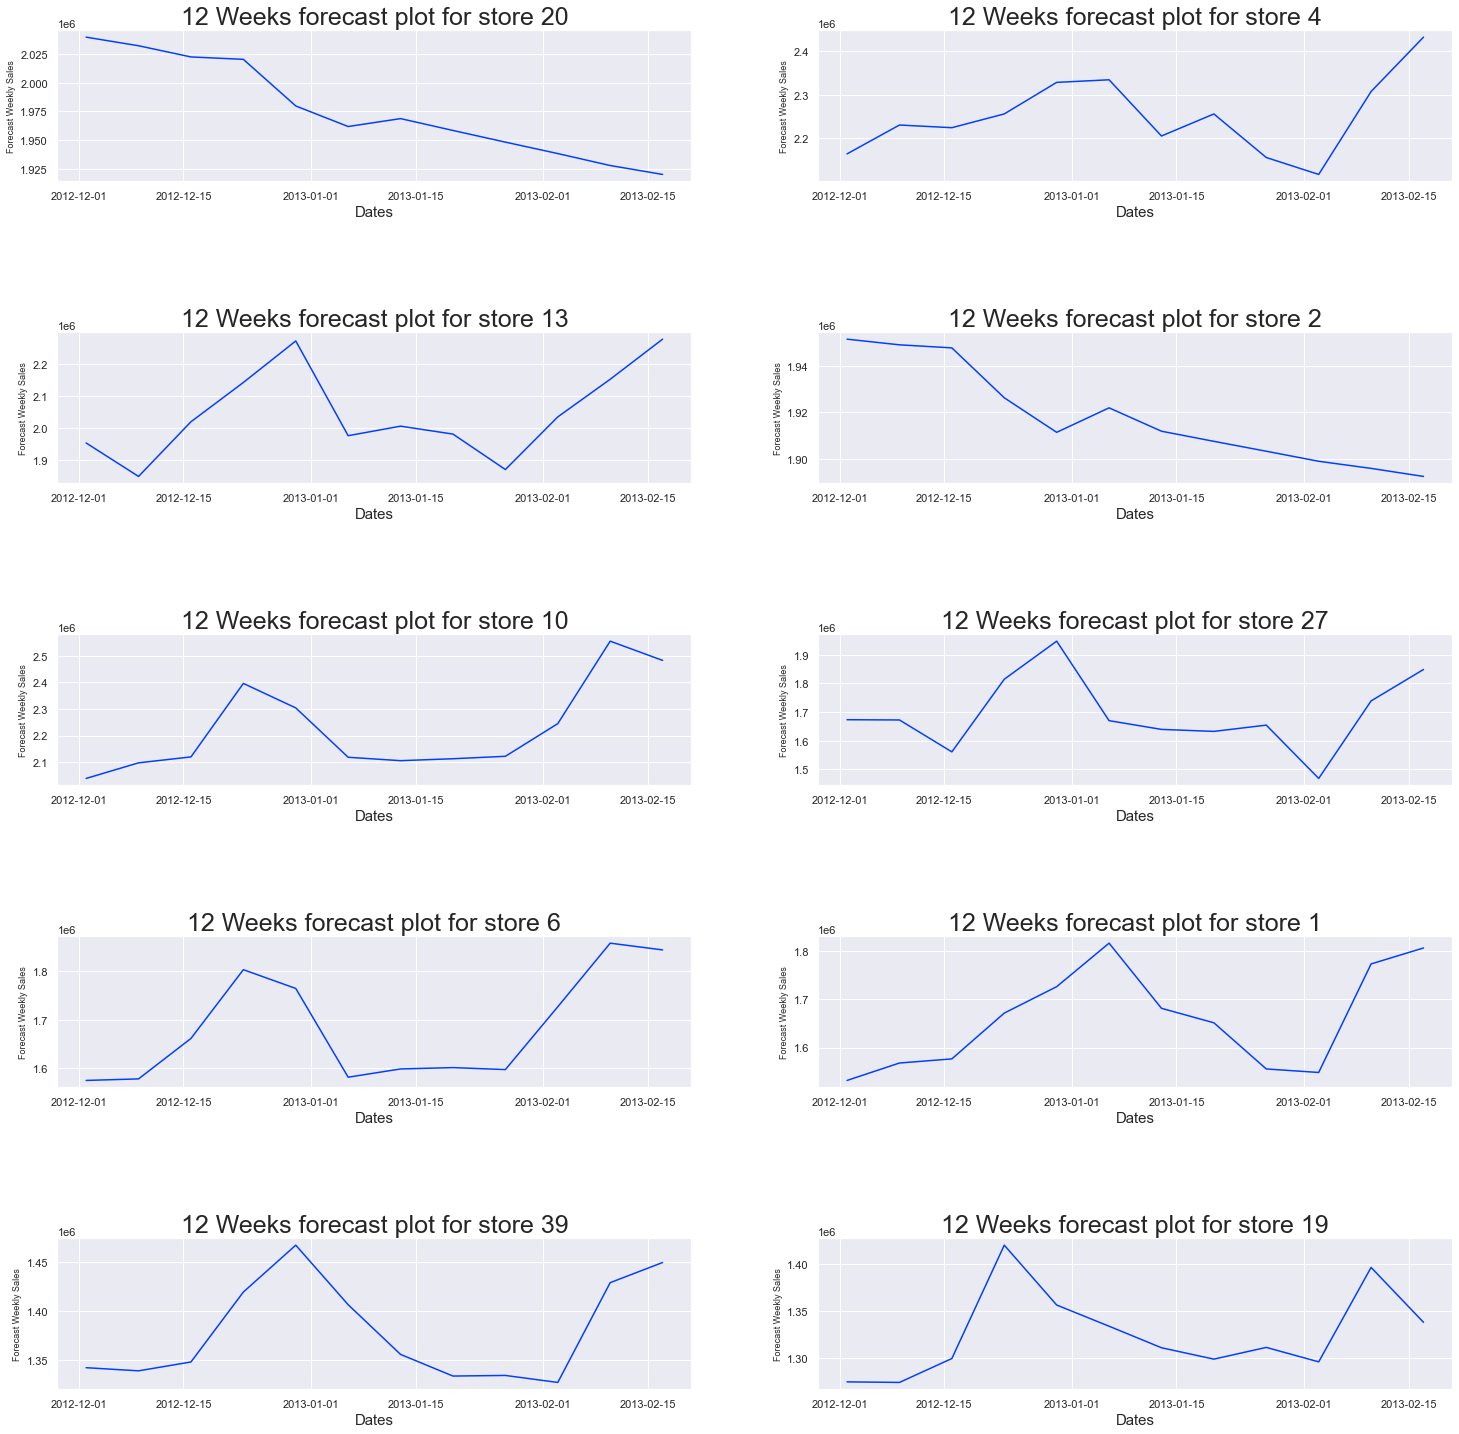

In [159]:
plot_ts_forecast(forecast_list, Index, train_list, 5, 2, wl = 25, ww = 25, hs = 1.0)

In [160]:
train_list[0].head(10)

weekly_sales
Date                     
2010-05-02  301955.052857
2010-12-02  -51824.834286
2010-02-19  -93876.684286
2010-02-26 -182858.231429
2010-05-03   62322.285714
2010-12-03  -87838.577143
2010-03-19 -164295.150000
2010-03-26  105599.345714
2010-02-04  200743.917143
2010-09-04 -149590.837143

In [161]:
pd.DataFrame(forecast_list[0]).mean()

0    1.976548e+06
dtype: float64

In [162]:
#show weekly_sales forecast summary for the selected stores

Summary_detrend = pd.DataFrame()

for i, store_no in enumerate(highest_10):
    Max = pd.DataFrame(forecast_list[i]).max()
    Min = pd.DataFrame(forecast_list[i]).min()
    Mean = pd.DataFrame(forecast_list[i]).mean()
    
    Summary_detrend['store_'+str(store_no)] = pd.DataFrame([Max, Min, Mean], index = ['Max_Forecast', 'Min_Forecast', 'Mean_Forecast'])
Summary_detrend.T
    

Max_Forecast  Min_Forecast  Mean_Forecast
store_20  2.039976e+06  1.919941e+06   1.976548e+06
store_4   2.431694e+06  2.117130e+06   2.250792e+06
store_13  2.277134e+06  1.848819e+06   2.044289e+06
store_2   1.951467e+06  1.892529e+06   1.918202e+06
store_10  2.555187e+06  2.038811e+06   2.224878e+06
store_27  1.947270e+06  1.467981e+06   1.693146e+06
store_6   1.858312e+06  1.574498e+06   1.682376e+06
store_1   1.816712e+06  1.531791e+06   1.659009e+06
store_39  1.467144e+06  1.327669e+06   1.379601e+06
store_19  1.419943e+06  1.273605e+06   1.325497e+06

<div id='model'></div>

## Model Selection and Evaluation
In this section, we will evaluate the performance of several different regressors on our data. We will use root mean squared error (RMSE) as our evaluation metric. RMSE is a measure of the difference between the predicted values and the true values. It is calculated as the square root of the mean squared error (MSE), where MSE is the average of the squared differences between the predicted and true values. Lower values of RMSE indicate better performance.

We will fit and evaluate the following regressors:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Regressor, etc.

We will fit each of these regressors to our training data and make predictions on the test set. Then, we will calculate the RMSE of the predictions and compare the results to choose the best regressor.

To ensure that the original dataset is not modified during the modeling process and to facilitate debugging if needed, we will create a copy of the preprocessed dataset before fitting our various models. This will help to preserve the integrity of the original data and allow us to refer to it if any issues arise during the modeling process.


In [163]:
# make a copy of the dataset
sales_copy = sales.copy()

In [164]:
sales_copy

store  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-05-10     45     733455.07             0        64.89       3.985   
2012-12-10     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   cpi  unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106  
...                ...           ...  
2012-09-28  192.013558         8.684  
2012-05-10  192.170412         8.667  
2012-12-10  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667  

[6435 rows x 7 columns]

In [165]:
# drop the unemployment columns
sales_copy.drop(['unemployment'], axis=1, inplace=True)
# check
sales_copy.head()

store  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   cpi  
Date                    
2010-05-02  211.096358  
2010-12-02  211.242170  
2010-02-19  211.289143  
2010-02-26  211.319643  
2010-05-03  211.350143

In [166]:
X = sales_copy.drop('weekly_sales', axis=1)
y = sales_copy['weekly_sales']

**Scaling the features**

Scaling is a preprocessing step that transforms the features of a dataset so that they have a similar scale and can improve the performance of some regression algorithms and facilitate comparison of the model's coefficients. In this project we will use standard scaler to standardize the features of the dataset.

In [167]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Spltting the dataset**

To properly evaluate the performance of our dataset and prevent overfitting, we can use cross-validation techniques. One such technique is to split the dataset into a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate the model's performance. This can help us determine how well the model generalizes to unseen data and can identify any issues with overfitting. It is important to randomly shuffle the data before splitting it into the train and test sets, as this can help ensure that the data is representative of the overall population and not biased in any way.

In [168]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

**Model training and evaluation**

In this subsection, we will create a function that will train multiple regressors and compare their performance using the root mean square error (RMSE) metric. We will use the RMSE values to compare the performance of the various regressors and determine which model has the lowest error and is therefore the best fit for our data.

In [169]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse


In [170]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.
    
    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models
    
    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """
    
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)


In [171]:
# initialize the regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [172]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]


In [173]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


regressor_name          rmse
0         Random Forest Regression  1.473277e+05
1          Boosted Tree Regression  1.865208e+05
2         Decision Tree Regression  1.913309e+05
3   K-Nearest Neighbour Regression  3.750646e+05
4                Spline Regression  4.704331e+05
5            Polynomial Regression  4.841134e+05
6                 Ridge Regression  5.231625e+05
7                 Lasso Regression  5.231627e+05
8                Linear Regression  5.231628e+05
9           Elastic Net Regression  5.280729e+05
10       Support Vector Regression  5.687756e+05
11       Neural Network Regression  1.186783e+06

***Result interpretation***

Let's interprete the result by evaluating the rmse value of the best model, the Random Forest Regressor.

In [174]:
# evaluate rmse for the regressors
rmse = evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

In [175]:
# pick the best rmse
best_rmse = rmse.iloc[0]['rmse']
# compute the median of the weekly sales 
median_sale = sales['weekly_sales'].median()
# compute percentage error
percent_deviation = round((best_rmse*100/median_sale), 2)
# print the result
print('The model has average percentage error of {}%'.format(percent_deviation))

The model has average percentage error of 15.33%


The above table shows that Random Forest Regressor outperformed all the regressors with RMSE of 1.17e+05. This provide a good estimate for future sales as it has about 12% average error compared to the typical median sale.

<div id='conclusions'></div>

## Conclusions
The project undertook a study of a retail company with 45 outlets stores.
Some of the important findings from the report include the followings:
1. Sales revenue projections for the next 12-weeks are down for most of the stores

2. Some of the stores have very weak or no sales activities during some period of the year,

3. To improve sales revenue, the following steps are recommended:
a. Concerted efforts by the company to find out though local market surveys and past sales records what products are in
high demand by the local population at any given period of the year and make efforts to replenish those stocks.

b. Create increased local awareness of the products on offer at each store through commercial outreach: social media,
television commercials, radio jingles, and print media, trade shows, to name a few, could help improve sales.

c. Have detailed records of inventory of the items on offer at each store indicating amount and dates if sold as it is needed for effective inventory tracking.

d. Explore other service options that have worked well for similar companies, such as same-day or next day home delivery.
It may just be that some stores may just have to be wound up if sales revenue does not improve.

Our analysis shows that sales during holiday weeks are significantly higher than during non-holiday weeks, with sales doubling on average. Additionally, there is a strong seasonal component to the sales data. The average sales of the top performing stores are up to 500% higher than the lowest performing stores. 

The best model for predicting future sales is the Random Forest Regressor model,which achieved an RMSE of 1.17e+05. This is a good estimate as it is 88% close to the median sale of the data.

These findings have important implications for businesses as they can inform decisions about inventory, staffing, and marketing efforts. By understanding the factors that drive sales and using a reliable model to forecast future sales, businesses can better plan for the future and optimize their resources. 

**Future work**

- One area that future studies could explore is the relationship between festive sales and profit margins. By augmenting the dataset with expenses data, it would be possible to investigate whether larger festive sales always translate to larger profit margins. This can inform decisions about marketing and pricing strategies.
- The analysis showed a 500% difference in sales between the top performing and lowest performing stores, which is a significant difference. This suggests that there may be underlying factors contributing to the performance of these stores. To better understand the reasons behind the performance of these stores, it is necessary to gather additional data and parameters that may be influencing the sales of the top selling products.
-Hyperparameter tuning involves adjusting the parameters of a model in order to improve its performance on a given dataset. By iteratively adjusting the parameters of the best model, it is possible to achieve an even better model.

<div id='references'></div>

## References

- [Kaggle](https://www.kaggle.com/datasets/yasserh/walmart-dataset)
- [B2B International (2018). Sales Forecasting: The Importance and Benefits.](https://www.b2binternational.com/resources/blog/sales-forecasting-importance-benefits/)
- [Business News Daily (2021). Sales Forecasting: The Importance of Accurate Sales Forecasts.](https://www.businessnewsdaily.com/5659-sales-forecasting.html)
- [Small Business Administration (2021). The Importance of Sales Forecasting.](https://www.sba.gov/blogs/importance-sales-forecasting)